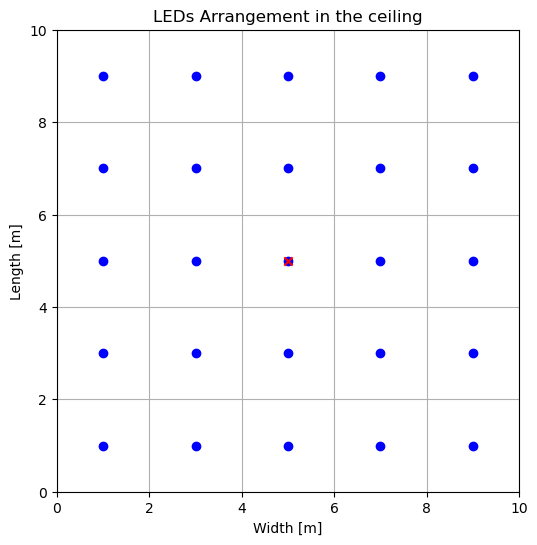

In [1]:
import numpy as np
from libow8 import sensor_net
import matplotlib.pyplot as plt
import owutils as ut
from design_handle import designs
from pyswarms.single.global_best import GlobalBestPSO


In this scenario a room of 10x10x3 m is considered.

ZigBee nodes equiped with solar panels gather data from 3 sensors (each) and transfer them to the central node (star topology).

1 window (2x2m)

25 LEDs on the ceiling (6W each) ~ 550 lumens avg

sensors: 
GAS SENSORS MQ-2 Voltage: (5V) Power Consumption: (0.8W)  I = (0.16 A) data = 3 bytes


DHT11: Voltage: (5V) Current: (0.2mA) data = 2 bytes

TSL2561 light sensor (broadband & IR): Voltage: (5V), Current: (0.5mA), data = 2 bytes

data = 7 bytes

6 Bytes PHY Header + 5 bytes MAC Header + 7 PAYLOAD + 2 MAC FOOTER (FCS) = 20 BYTES -> 40 SYMBOLS -> 2 TIMESLOTS



In [2]:
KEY = 'e_solar'
params_d = designs[KEY] 

In [3]:
h_ww = None
r_sens = None
n_particles = 20
def sensor_ar(x,params_d = None): 
    global h_ww
    global r_sens
    global n_particles
    r_sensor = np.tile(r_sens,(n_particles,1)) 
    nR =ut.spher_to_cart_ar(1, x[:,0], x[:,1]).T
    params_d['r_sensor'] = r_sensor
    params_d['nR_sensor'] = nR
    #params_d['nS_sensor'] = nR
    l = sensor_net( **params_d ) 
    l.calch(h_ww = h_ww)
    l.light_sim()
    h_ww = l.h_ww
    fitness = np.sum(np.sum(l.Pin_sm_diff,axis = 0),axis = 1) + np.sum(l.Pin_sm,axis = 0) #+ l.Pin_sa #LOS + Diffuse + Ambient
    return fitness 

In [4]:
def fit_function(x):
    f = sensor_ar(x,params_d=params_d)
    g = 1/f
    g = np.array(g)
    g = g.reshape(x.shape[0])
    print(g)
    return g

In [5]:
r_sen = designs[KEY]['r_sensor'] 
N = r_sen.shape[0]
pos_l = [0]*N #SN Position
pow_l = [0]*N #SN Optical Power
op_l = [0]*N #SN Orientation
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
lb = np.array([0, 0])
ub = np.array([np.pi/2,2*np.pi])
for i in range(0,N):
    r_sens = r_sen[i]
    optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=2, options=options, bounds=(lb, ub))
    best_cost, best_pos = optimizer.optimize(fit_function, iters=20) 
    pos_l[i] = r_sens
    pow_l[i] = 1/best_cost
    op_l[i] = best_pos


2024-12-27 18:48:57,643 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=440

[ 453.28468702 1118.64539446  482.11376814  525.82951631  440.31772347
  486.7669046   541.98985799  802.37187787 1265.09244683  720.00475037
  500.27115853  465.76016481  791.92276197  640.70950889  467.86727293
  512.14134263  490.9022703   468.209546    850.42895987 1338.55321767]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=440

[ 479.33545459 1110.96491861  600.68956942  881.0248008   533.27378047
  504.5326534   573.54873502 1017.8517527   563.09481689  447.49013961
  760.07079047  528.75138504 1339.18948755 1303.55372185  508.53816607
  614.0195184   581.71638604 1048.20427975 1008.03324025  495.08509438]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=440

[ 561.80287551  956.9740131   637.4703117  1017.40488817  613.89753725
  510.53926249  659.16465144 1106.61886146  937.61301783  601.4896726
  976.32597732  505.23876034 1631.04011531 1544.70041962  522.28823093
  673.68199394  665.83138394 1498.16509546  963.78715194  543.49804089]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=432

[ 500.28811927  495.05436946  537.52953244  604.55371488  579.17991987
  531.8222617   587.48618072 1025.688335   1576.26268392  449.54877018
  582.44696573  432.22474626 1224.42418595 1292.12175846  469.69058489
  555.8572295   684.32810409  783.05514198  753.98523867  483.05579327]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=421

[461.41389169 457.88485597 470.15235438 429.6016663  504.47331846
 527.67925647 477.60495945 634.50109283 927.20660961 429.0759532
 420.60080209 425.27169639 759.15905858 728.78679984 443.35299501
 459.87471462 546.58594286 602.56337663 493.94242327 460.81073458]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=413

[423.08863384 524.87388863 423.22329382 413.06423189 447.14914486
 469.07593228 423.8742715  425.55288007 552.48533887 470.61222745
 418.60469845 434.34946545 544.39705048 577.59521478 426.60943004
 417.42669444 455.9256209  742.85369182 419.33165219 486.16832652]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=411

[430.41123564 759.21378308 411.30615657 438.30377294 413.59847437
 444.41052236 441.09340756 425.41831507 443.93609771 516.48057789
 444.28960186 437.09384337 463.20249217 490.48085919 413.25762861
 411.06049613 441.24494972 446.5088948  448.74014896 515.56494231]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=411

[448.00459585 492.82700661 421.46334946 458.01619576 412.91058792
 434.32365061 466.05988695 465.92695013 628.705356   539.24571286
 456.2754294  420.8435547  751.19375004 467.38285927 410.59734274
 422.42142276 456.11079935 641.37862197 443.9901782  477.26129977]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=411

[ 437.42451288  553.04884424  434.44009756  456.18754667  429.35788228
  446.38535629  719.18095096  487.65499537  425.65473307  494.18059907
  474.48610878  413.50074356  444.54702022  946.9121878   415.56767123
  431.70339161  641.26969682 1184.6848622   650.0359252   421.8069105 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=411

[414.49504548 436.72303709 429.58489523 571.33669346 442.8063555
 452.39951664 439.49477042 504.6152862  432.60227652 428.78891764
 523.21523193 411.33620537 426.10560378 424.53442167 419.09469223
 428.63448516 431.15217816 678.60897656 417.95302877 417.94654262]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=411

[418.14688113 535.71771093 415.83578205 412.96553904 443.44207483
 434.97663377 685.30627775 414.38184274 788.30567532 412.96249148
 415.2185701  412.21056546 832.64847109 538.78900685 413.59496962
 418.40535433 519.52290134 450.95223654 699.82861441 426.51260078]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=411

[423.89989881 709.1799128  410.55571493 832.22331409 435.46546223
 414.83447126 458.39379937 664.69728634 500.99547281 434.81923821
 740.50488332 413.56382936 468.13168408 415.09424881 410.80838618
 410.65543766 533.47604698 465.86176788 415.90557684 427.82380658]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=411

[ 423.87199705  569.56235503  413.21853325  531.22861075  415.80922066
  410.73317583  570.66542635  499.78765051  419.24579468  442.11399215
  427.12785088  412.12374569  466.55327017  498.01757038  410.50400736
  412.58727913  450.38478475 1503.40654729  724.96080887  423.19819423]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=411

[ 415.67278582  451.75877555  416.46579052  447.82328666  410.77906197
  417.27392661  627.21590158  422.72637387  458.21406003  428.81136702
  808.73228508  410.87097255  456.10859492  419.9554993   411.63679413
  417.52884605  425.26646511 1470.73555487  413.98349795  415.55716401]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=411

[410.73458718 454.84698986 416.5923744  546.11243803 417.07970903
 419.94967232 548.9861862  678.75355925 598.36546337 413.19500739
 422.06933621 410.9046896  429.91575386 514.32231675 412.02314523
 415.48133759 647.50727154 756.53160516 701.46389499 412.88274367]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=411

[416.28424677 681.11402981 412.0222827  647.54609966 423.53812577
 415.39258594 443.29439228 423.26300634 473.84196129 412.22799822
 647.60086145 411.4272227  534.86062003 410.84714256 411.31891128
 411.12320428 455.25435779 471.86538077 419.91838792 414.51980012]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=410

[ 424.73314682  752.593761    410.41841682  444.88668286  418.97611822
  412.02067054  664.17934294  623.17750022  410.84119936  419.5599193
  437.22946793  411.03533616  431.95322454  459.31434336  410.80675008
  411.53126054  441.59554341 1233.1112758   692.70061651  416.07573591]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=410

[419.26362759 473.21477943 412.11073637 424.03202649 412.88782122
 410.37989341 787.10182533 421.28611432 438.08810499 424.02310727
 610.49954189 410.61095508 422.56414025 506.35029408 410.42620228
 415.85547441 454.60447196 733.18435555 514.7099417  414.63749444]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=410

[413.24384608 413.71674345 413.70261154 491.19069641 410.46720831
 411.32645046 470.62033116 605.76528916 607.44153992 416.41459201
 413.39991407 410.49684028 461.66779753 424.58447642 410.42041992
 416.05125151 649.89198574 467.60094169 418.32456094 411.78636992]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=410
2024-12-27 18:49:32,416 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 410.37989340689325, best pos: [0.55742138 0.78561387]
2024-12-27 18:49:32,425 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[410.59970098 414.00811406 411.30069401 604.87354225 411.0269691
 412.49736212 482.3708997  416.66072571 415.90534082 411.2027351
 629.50748262 410.59566421 694.65521094 419.21425657 410.63374804
 414.00506503 432.06461378 551.68769228 602.24817965 410.45774724]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=357

[ 356.9278961   453.53718095  754.0364579   456.13830834  382.69760777
  371.51639606  450.85770418  363.81895205  628.76937815  403.93886623
  525.80751182  374.42146438  444.52612529  502.85928557  578.3476325
  758.77623961  721.62548583 1466.60501685  526.61289306  359.14027422]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=348

[ 348.09573872  517.80050126  730.93834474  511.34053279  474.3800124
  374.73197344  440.69438597  465.71023743 1243.56517554  707.65292344
  379.10043569  669.85412229  421.61259404  669.40346003  788.44091399
  799.43244348  997.60912702  968.36505696  820.53848737  448.51718312]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=348

[ 372.12252002  502.65264754  834.09035478  492.7890646   520.08711049
  510.54021276  414.81999334  612.56851201  971.42100185  968.57159445
  438.55764412  886.31858182  416.4223485   786.29263281  711.29957312
  709.80380758 1557.30923209  691.71045529  831.98161337  566.27164348]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=348

[ 393.88108219  424.26292806  643.80483538  436.8426659   464.90261428
  381.71716309  380.81222727  586.09403256  524.44189334  628.61888852
  544.41288586  766.10959978  394.85295016  514.7688403   445.86646866
  598.373007   1060.59767408  497.49857465  510.87996837  453.03604074]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=348

[367.93054669 356.02520338 404.06258971 381.8922536  379.20571424
 366.42106345 359.8211998  439.65412429 385.74284785 408.19628485
 549.73447964 445.92195488 377.32864412 376.02150152 390.57995776
 479.53766399 483.43888807 369.66080337 376.65376646 353.71154059]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=346

[346.798091   379.51025044 369.45831004 361.37394124 352.36361242
 445.02778236 355.51568503 360.76598882 401.85357424 348.36851305
 363.08448478 360.63145453 358.39780939 348.13718345 387.21634557
 381.61912023 346.62384448 361.5057537  346.25171987 359.75144417]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[352.03481719 421.20013382 443.62959843 360.62588217 354.75509065
 358.47401947 357.72046687 365.38590173 436.57988765 366.2112903
 355.19933962 357.78617851 348.48871715 365.12677613 388.64282861
 347.44800781 377.6986447  387.13476353 356.67908629 601.31802647]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[358.83025243 500.22451849 364.58407329 361.53500614 357.71878109
 556.82053812 356.96495212 363.2296456  575.0277739  382.99264538
 544.17501725 372.719999   346.93165663 365.23548171 394.59855856
 353.1606722  427.04708921 423.48461376 363.50823912 365.25323114]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[348.06171581 428.46348764 486.69119436 357.8449542  356.93454579
 350.40995644 351.99168886 354.46134259 395.98389871 363.55610484
 360.90665311 374.09014964 348.54704602 359.63650001 394.29302251
 362.3927256  356.22006436 356.62928055 355.23975941 358.90828328]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[346.75687203 372.35135773 349.50314165 353.23307132 352.14210211
 481.95667644 348.69648235 348.47313667 415.11610688 346.9027866
 571.24729241 361.2261488  348.80386809 348.55897741 378.90143825
 357.70342069 462.508941   491.54976723 346.81727077 506.4898177 ]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[351.21811051 542.52391852 488.89451308 349.44938838 348.95714856
 346.38733456 347.00465645 347.17467451 725.78786271 351.11393099
 351.72769018 349.50387022 347.76546231 348.25233028 359.96035401
 347.43225469 349.20555064 349.8798567  348.5563948  350.79632234]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[356.86009119 381.50647094 388.5715808  347.72713717 346.82949278
 491.00685812 346.23457189 348.47800695 657.31518604 360.34101735
 388.23394785 349.39634886 346.65111121 353.78877831 354.81186927
 348.80658656 596.81146129 556.24190941 354.08331014 380.55005817]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[355.62637499 507.11659858 346.19586242 348.20027055 346.66593735
 356.07328681 346.15551698 349.0183431  476.36163756 363.94946345
 361.5276397  357.16848731 346.21961775 355.51590484 355.91249291
 351.02907473 380.61903148 363.88481997 351.22624589 472.77743327]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[347.41296927 443.89960272 478.59710437 348.65853295 348.00026002
 392.40074623 346.41714389 347.46977176 872.1217678  353.21028774
 436.24173179 359.37724765 346.19576457 352.03854357 354.87051206
 350.18150372 540.85500453 546.67015259 347.66892543 363.89978526]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[346.76352834 373.59195811 443.52724233 348.20641271 348.31936214
 375.98744344 346.58283411 346.37128903 367.86613485 349.90296011
 347.30428799 357.47183587 346.36214906 348.60486341 351.74645022
 347.30895829 375.17550605 350.57847553 346.39989204 353.92833942]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[351.79368618 614.45002299 461.42313551 347.19160347 347.5371236
 403.64184494 346.48717636 346.30233028 596.91236601 350.55173197
 381.95969526 348.66648019 346.36961231 346.70742202 349.2737096
 346.36197364 498.52861103 518.51094074 347.22331729 574.95144981]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[352.17775448 404.53257601 457.94201057 346.82988083 346.7020695
 347.64851729 346.28891263 346.85356506 414.66576965 351.41826392
 530.36724661 346.26630295 346.33169128 348.36051561 347.24860212
 346.59558603 354.22663415 350.18185282 348.10817319 347.67154037]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[347.35053289 347.43858278 507.09136575 346.84812738 346.23185687
 562.37513283 346.15489148 347.09638442 380.12396913 352.44356031
 404.63218324 347.34257627 346.17016274 348.84876873 346.42203584
 347.08227281 486.47002645 502.64337975 347.355121   531.01398377]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[346.23197179 449.70704404 506.09662399 346.57965136 346.13407669
 396.25951577 346.14231293 346.90709709 499.76404508 350.02424727
 352.31458037 348.99753352 346.14546354 348.36355042 346.3827823
 346.66966611 346.73919245 349.22217808 346.56684633 351.42104649]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 18:50:05,077 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.13407668678303, best pos: [0.46782402 1.14434218]
2024-12-27 18:50:05,084 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[347.97537745 470.61502116 471.0945282  346.33458673 346.26646028
 347.2234997  346.18569253 346.40804518 449.76327549 347.15042197
 353.84965102 348.72578205 346.25411123 346.62605661 346.73381122
 346.15366577 502.29580342 510.20663222 346.55206786 422.85105578]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=336

[ 359.03118884  676.38521232  523.76659965  975.66956603  335.51061601
  623.76128888  344.05073326  387.29079709  397.92144072  633.66729593
  352.61429603  349.68097502  360.93603599  611.62966075  359.18157611
  437.75358578  879.18619352  907.9349792  1424.49033881  344.83431046]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=336

[ 407.82793756  643.97108714  369.20122329 1143.958628    370.5229594
  894.71128099  367.48875134  806.31972523 1016.08458099 1355.11634278
  651.0447049   371.97854271  420.25518747  345.43111169  392.75100755
  353.1743038  1106.15804685  927.00672211 1597.73059872  391.06325391]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=335

[ 409.57108069  553.4148094   517.60650214 1026.52272891  444.08587292
  712.77260862  361.08468411 1247.54105158 1154.22056167 1209.51881925
  356.87189168  376.95590554  479.44601047  335.13640243  390.83896126
  400.13172507  808.63617658  690.64783946 1242.53174728  526.87870164]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=333

[359.98818821 405.09914565 606.66170149 723.1592126  364.75060524
 563.11859843 346.97018209 745.95465437 656.74203391 595.02600025
 369.00167449 375.75478785 414.04976982 332.80191664 344.58854579
 441.18424787 444.00900968 480.90470803 816.57166127 601.29674552]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=331

[342.01707009 341.14769284 466.17001795 460.60343399 331.46232116
 429.84681214 331.79293035 459.9130395  506.22142143 361.10381382
 380.98837849 372.06944711 364.32224669 334.43707681 332.39578219
 372.39256365 341.44366766 367.16294213 553.95286951 505.79445195]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=326

[341.10425442 327.59689915 364.6295184  355.09018953 660.54071981
 369.2243067  326.44629985 377.12200516 434.85071566 329.80345637
 376.89188605 355.19670252 343.45567644 336.39468203 338.60640734
 344.50195856 353.2664741  343.4764387  385.91005348 350.9574909 ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[339.99522984 332.96081131 342.11998311 333.74319721 349.74579711
 348.91590897 329.86153375 919.99833458 381.91924139 352.51541251
 364.66441585 337.01626174 355.79659993 332.13305202 345.27213326
 632.91996002 368.23580002 350.00609238 334.01753384 341.27082494]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[336.63006694 335.07381916 355.01836567 343.28229701 351.29432831
 352.08939291 331.96587925 425.74706369 367.63288719 708.01448292
 349.48898104 328.9759208  602.18491659 328.11274732 342.46320473
 444.01667756 339.82107371 347.20892997 336.2920838  462.86549564]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[334.54094826 329.6952151  356.68379956 347.06649768 410.96024191
 351.14206779 331.22938651 338.27625499 371.10879941 571.95635225
 332.45252304 325.94690361 407.34291396 326.26062339 330.08550765
 329.30158343 327.75220734 337.64873576 343.34467716 333.35438471]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[332.55920474 326.0201169  345.89388002 334.88501739 326.0325473
 344.56883058 328.29020352 451.53932857 359.47476616 331.38205764
 327.02599712 326.02486563 334.54510268 325.64745439 326.80477489
 459.03188307 326.89250047 330.79173091 336.4505355  460.20609654]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[333.40826926 332.5468778  333.54184651 327.07409323 571.49562284
 337.94003242 325.95204245 339.08756998 339.1082561  605.54130389
 329.888494   326.64349758 501.91241659 325.66903376 329.28127029
 329.95519193 331.85473722 326.16119093 328.19889246 329.68956207]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[334.49211382 340.72513285 331.84002658 335.55421556 325.7761922
 331.06345751 326.98533479 365.50230088 326.26265091 344.19723704
 335.48171218 326.88818284 329.47251721 325.88118847 329.09598964
 403.7048473  334.38773248 325.86364966 328.91719117 421.26161097]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[331.29280216 334.84936255 335.20443099 348.66240206 444.18102308
 328.01237252 327.81520192 336.76562861 331.95434603 368.31705571
 329.99471691 326.78777338 641.05503018 325.65652232 326.7114115
 325.66252218 332.00155549 327.99922459 333.43908779 325.61560374]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[327.41110682 326.70613455 334.99581029 345.04387289 326.01910777
 329.49088692 326.39740437 459.75303953 338.290001   357.26160938
 326.10498425 325.79416808 358.77440447 325.59348934 325.88840031
 616.33265952 328.12415074 327.86232439 330.76075135 535.51861736]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[325.73935257 325.9876406  330.46163771 335.51832778 562.06790163
 330.91257831 325.63579893 334.59708991 335.68865939 388.38398318
 327.21410923 325.59054577 332.77283736 325.69946121 326.1284335
 339.68037461 325.71150322 327.34157548 326.60989184 334.42914276]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[325.81012785 329.02352256 327.22398843 326.24339448 333.69560075
 330.07651946 326.63268939 662.39362316 327.5535831  333.03663681
 328.97723539 325.9039367  544.70366113 325.75306753 326.83312174
 648.24645425 326.5546284  326.03107809 325.59162864 354.32595419]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[326.63875765 330.79484043 325.79323024 327.7355256  585.62541807
 326.99668554 326.69096005 326.88948355 326.52108134 438.36764754
 329.13560893 325.9987029  343.09163954 325.70815502 326.66744055
 342.54781744 327.35450719 325.55715713 326.59624634 410.71882291]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[326.13074632 328.42529136 325.87978595 330.75461861 335.71544879
 326.44438891 326.1482952  416.37663539 330.43082894 332.13716919
 328.04103504 325.82465887 344.28025677 325.59155495 326.17319773
 344.27416637 326.43618829 325.78149822 327.44557919 329.02041095]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[325.73455951 325.90309413 326.3058039  331.80364512 353.52850781
 327.17177349 325.79494254 346.50725523 334.67266857 355.03941462
 326.37715915 325.68386018 549.84621193 325.56114264 325.76412805
 443.44490805 325.64740996 326.09817428 326.61568778 344.57809721]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 18:50:37,111 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.55715712978133, best pos: [0.44804642 1.38206656]
2024-12-27 18:50:37,117 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[325.58213007 325.90851723 326.11293712 327.69376319 559.64038073
 328.45538145 325.61271327 385.40656938 333.53955625 460.73308104
 326.46019882 325.58296331 330.30226073 325.58406258 325.7140991
 326.6879149  325.62189089 325.76943899 325.7214609  567.91825293]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=341

[ 380.61388515  888.86030569  447.73093256  368.70272317  341.44351565
  581.11910058  570.95217129  540.18474844  583.485411   1178.97265251
  504.89297021  347.85305553  560.79077163  521.44004664  600.07739208
  377.31187487 1090.22227908  432.5172003   541.74423593  358.88916067]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=326

[ 853.72027687 1359.45954057  325.53455201  414.3150784   399.93519814
  509.05422273  370.58915746  576.58210688  556.05201928 1107.36873122
  524.98046806  464.1044271   622.51052972 1190.65787536  660.48458875
  479.05444222 1663.01174089  486.26763232  532.288894    354.29362759]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=326

[1433.70065325  995.03822787  340.05488725  434.86222803  397.49788557
  394.39367507  502.29853922  427.20618654  449.93416307  706.49458913
  501.3691081   502.2956432   643.4438357   367.6459673   579.61459127
  516.62157527 1681.91489033  493.8520715   481.39385387  335.18855846]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=326

[1401.45577202  647.0748404   385.70822775  383.29590069  354.01807227
  351.29693077  503.34887682  358.9150833   342.82468715  479.70106079
  646.21750136  448.38404652  484.12607465  372.39298628  451.98495645
  469.76050173 1303.9634142   403.6167188   373.66506534  326.73272154]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=323

[475.49998743 451.5731844  366.09300656 339.49609927 323.94470577
 332.99160307 410.12766144 324.13138414 323.06510196 393.56781286
 444.1583906  357.3513416  388.45443664 352.79118649 412.40968515
 366.54825541 645.48059403 338.98212477 325.48086925 325.69500138]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=322

[349.50907815 368.18004077 333.66754022 324.35398237 322.56745996
 330.02923547 344.67767531 323.59390847 340.21094995 340.07993741
 423.07112767 322.28529645 336.05210368 336.57437116 377.68548499
 327.85852895 365.27237814 330.13707161 323.48693961 330.9608505 ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=321

[396.74287572 342.60727757 321.7169023  328.99026524 335.31610935
 333.4882287  321.66660158 335.85512079 354.1730195  328.05909757
 418.02617236 325.93454758 321.3774604  328.24109114 348.16816685
 322.45960159 325.30031778 339.08663293 334.26127155 335.25453586]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=321

[335.77383702 342.96512068 324.55877846 333.84521275 334.81831113
 334.81128347 324.90864656 337.61066272 349.76313239 329.69235342
 365.5773155  331.38142514 325.81995541 328.06197868 334.29917067
 328.24811178 339.49724382 344.54541405 336.78049741 330.09902467]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=321

[719.386689   340.51824638 326.31046383 325.0082603  330.26062313
 327.56314179 333.71475905 327.55782601 336.12363679 332.89026291
 334.81382359 333.74074527 330.9285155  332.00753214 329.50511433
 333.82951435 342.18483522 335.79496144 329.77291633 324.15116582]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=321

[365.31450167 331.57735897 324.60411884 322.45343451 322.06067522
 322.93232416 336.36636312 321.58170568 324.52884333 327.72292655
 327.82218499 326.35205795 330.58309698 330.48602711 329.53307169
 330.63292492 334.76807349 325.18192815 322.64876779 321.68649825]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=321

[646.31644955 323.53352345 320.98947518 327.7733739  321.35096844
 320.80053689 322.29338821 323.86119419 326.8969026  322.44678417
 343.44578489 321.46955483 323.4825205  328.22286964 325.39366959
 324.53623595 324.25096507 323.24337623 322.33312545 321.86201886]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=321

[326.05869991 321.20681232 321.98766092 330.18448376 325.20685712
 322.90631048 323.44456364 324.50790663 330.70224099 320.81809275
 382.78962039 332.72872542 322.15086827 324.58579496 323.46241818
 322.57266912 325.33000573 329.58879133 325.48430821 321.88731101]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=321

[394.1154549  323.08934183 323.76348701 324.51895834 327.07100689
 325.20071945 333.37046707 321.69549104 330.17622158 321.8247902
 404.31157832 336.42983007 328.74168387 322.46034307 323.22689403
 326.08857286 330.07930524 329.66833773 327.63526844 321.06956526]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=321

[349.47850667 324.21988387 323.85328378 321.12696192 324.54998308
 324.84526961 335.03324383 320.78599668 324.76722699 322.28494381
 380.92248429 328.24083205 331.9845674  321.0847203  322.92492747
 327.92100558 327.26296871 325.16738841 327.44605854 320.86373673]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=321

[344.69498835 322.5742055  323.00871966 321.10750114 321.05331725
 322.06439636 326.15759344 321.31669394 321.19472004 321.48857726
 326.91585443 321.473188   322.97615592 320.77747473 322.37599271
 322.85632995 321.77072068 321.85708696 323.70816346 321.01302424]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=321

[346.94849296 320.89388402 321.08241508 322.87146732 321.31501068
 320.96528548 321.64202266 321.79332536 322.65831739 320.82655676
 415.91738781 321.3828052  321.12047544 321.20098218 321.83511724
 320.92710412 321.84164234 322.25896628 321.68472752 321.07101184]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=321

[430.42362566 321.07351505 321.32118341 323.52161325 323.16621072
 322.09464058 322.1120169  321.17414478 324.04239751 320.93313755
 325.99148457 324.29149906 324.60003656 321.66653259 321.59105124
 323.81490792 323.70599671 322.45171516 322.28748768 320.9321236 ]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=321

[324.69728433 321.91498674 323.2585303  321.78174434 323.90163204
 322.50149619 324.15378358 320.77071205 322.06118731 321.1861076
 413.41488418 325.5364681  326.45944295 321.42863953 321.86278474
 325.50344788 323.58127027 321.66991486 323.12870619 320.83651538]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=321

[646.27370193 321.61391424 322.54324927 320.78127002 321.25681019
 321.53278609 322.48401351 321.07501391 320.77353235 321.21281857
 339.4090667  323.20680059 324.76124854 321.02473225 321.78636494
 324.56754924 321.79105668 321.07332767 323.66999375 320.79910985]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=321
2024-12-27 18:51:10,455 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 320.7707120536744, best pos: [0.44707599 1.58801482]
2024-12-27 18:51:10,461 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[354.286806   320.94946291 321.59804664 321.14034029 320.95508828
 320.91981857 320.79925323 321.38904582 321.4175765  320.94411546
 418.17018823 321.24464787 321.65027997 320.78872438 321.40768448
 322.24540988 321.04689657 320.81975087 321.98414307 320.81615861]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=336

[ 406.71637735  444.13253399  335.60764905  345.95395466  459.13548296
  375.66480791  478.7405836  1356.88122647  358.94932388  375.60591131
  439.80296323  460.32357957  362.89959713 1452.327542    472.49432578
  347.60652287  387.51746726  475.66636343  774.39080982  553.73212844]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=333

[ 362.21551836  333.26443203  395.55805129  401.14082597 1109.12397498
  511.1342117   375.9604416  1288.65589565  489.39434941  594.77004322
  525.49571282  504.29076482  393.40958281 1094.0484314   790.9345879
  355.4801107   561.02958331 1010.07309532 1194.93400946  342.80956545]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=330

[ 329.6877502   395.22262454  456.05474083  471.31603042  362.02171549
  592.93618684  388.0215631   803.14893334  638.83415644  354.44714623
  489.24075274  555.65375986  402.24229887  779.59438714  912.1467942
  404.59180022 1004.59078621 1575.62081342 1650.92460821  334.11131745]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=329

[329.14984259 495.59686866 368.42423558 435.73025762 375.40169806
 437.70224474 401.70927924 473.75054992 585.96443741 339.02450968
 383.35089039 600.01150129 418.51658557 597.20054888 506.59433652
 346.51213473 923.39556861 360.82778888 963.63440257 338.59420425]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=329

[343.13733439 485.59862249 329.3738552  351.0687796  366.72437547
 349.54152638 378.97081306 350.40215105 411.15001075 342.26016094
 336.40167591 512.17666819 360.86971635 489.48343008 364.66096596
 329.26680344 507.64097858 379.52952426 659.79278544 354.65932663]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=327

[351.87637421 435.62252743 329.46644729 329.34173851 371.4169365
 334.36816821 354.84053998 328.33283026 897.46919329 355.97040661
 327.09711228 379.34005544 332.14515174 409.90861121 338.02183454
 332.11928846 364.17116068 379.12133691 422.16435042 358.34561193]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=327

[345.13473731 346.71131634 341.03460964 340.78950512 366.40858025
 336.06501092 337.27220655 339.31252451 611.80569442 341.46978711
 335.92732466 333.55687434 327.3803674  356.3215575  357.19705574
 341.25008708 344.94803339 396.31362484 348.245908   335.69449801]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[332.01554165 326.40295469 328.6391875  661.89628598 361.44720499
 339.96764811 333.15388275 349.30404887 443.88699939 331.75806688
 347.40127439 337.92498431 337.20589791 353.18625596 622.16080584
 347.63183708 602.21914714 407.19941538 342.87235642 329.77622072]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[ 325.63915046  351.92339575  325.83573216  348.95038592  856.45041886
  333.84593205  334.71853251  347.47137574 1483.42063111  338.31437743
  346.78963013  345.33775778  349.27455979  694.98829246  390.3908073
  345.64694611  454.02110418  379.11193524  356.30595196  342.16713248]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[ 327.90507577  642.55052782  329.75674423  351.70538615  397.72692417
  328.72652056  335.4406155   332.58132173 1652.4719292   343.98355838
  336.05899891  346.02767841  355.32070874  373.21742756  326.25467766
  333.10901908  332.1903833   362.88962251  646.42994273  348.66735874]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[ 331.19059843  337.8402121   331.45020715  414.12319678  666.77152957
  326.6251264   333.12949758  326.44842377 1616.54082221  339.2261214
  326.71608219  336.99687329  349.69591827  606.43305529  346.68263567
  330.17662141  347.65225956  354.55709303  391.32042575  349.65750139]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[329.38158463 562.18656868 328.61766624 327.31734979 354.34003546
 327.88866601 329.11567441 335.48984714 363.05230123 330.21670985
 330.54940789 325.92935778 334.20949458 329.29470818 654.47760437
 336.58413725 581.29286722 346.91979818 343.71446867 340.78969261]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[326.34503673 326.41931318 326.20777043 351.60687743 453.01713285
 329.70454033 326.07807029 341.5563956  497.70637712 331.56608993
 333.39304863 330.94534002 326.33092575 403.41713209 368.83253526
 337.76407226 380.74529949 344.18985029 381.35925101 333.0913742 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[ 325.8585018   446.56819512  325.73317652  453.5714181   347.34774376
  329.57212631  326.16591188  333.8613197  1190.75737639  336.72317293
  328.13137197  334.72827918  326.68307746  344.23481333  333.19146793
  331.55855845  327.97542945  340.65217309  334.31932583  328.01013647]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[328.20716707 328.10062832 326.65775825 336.17235589 413.39347488
 328.50931338 326.90931529 328.28898679 388.4192091  341.53913253
 326.082629   333.00848216 330.62035778 520.33920366 552.85001769
 327.67689459 338.48279707 340.1867808  460.19686178 328.98320444]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[328.90048893 438.66736956 327.1071915  337.24538987 326.55138489
 327.2685753  326.37887596 327.16420295 602.79883015 338.84572603
 327.11139975 326.65726067 330.53301297 336.7644272  373.04891547
 326.202138   347.69545908 340.36119536 334.20421566 331.60457839]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[327.41527435 345.44002334 326.31921008 549.93985967 635.89143246
 326.0476936  325.63970046 328.36457657 371.46444231 330.54788179
 327.45754143 326.77863054 327.71561604 611.7214906  330.5449162
 326.38442772 335.38099922 341.07869453 493.66949699 331.35049484]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[325.76128523 358.04037533 325.59296999 363.80121561 326.57024894
 325.66478665 325.64617914 327.44446642 847.27236243 326.51513271
 326.40701172 329.76734564 325.70082981 335.55883211 571.37590403
 326.61880987 327.84640464 335.85180995 332.01083697 326.98040946]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[325.69845766 347.98493318 325.79595716 328.67571321 421.09209638
 325.8310266  325.94721976 326.42287911 452.65658085 329.30259595
 325.76086472 330.05148949 325.89269161 453.1520541  344.6858839
 326.38972381 325.60007087 328.82355886 357.45417013 325.88475838]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 18:51:43,404 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.59296998519636, best pos: [0.4626999  1.74778648]
2024-12-27 18:51:43,410 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 326.33693221  396.17228591  326.19440403  552.69982711  327.18432762
  325.95681331  325.91045307  325.96388615 1604.80828304  333.87341474
  325.66303344  327.41093735  326.38914363  339.47249051  344.82923061
  325.66429693  326.39914466  325.84932573  457.47249895  326.45603891]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=360

[ 856.92694963  384.86231911 1046.57285993  382.94572897  441.2701578
  491.98705724  364.01708606  388.33530955  387.95276078  557.79834507
  413.27744785  386.27479999  490.10706907  596.67309346  387.67483371
  475.30171748  359.84608607  552.23514352  625.17676647  729.43993473]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=351

[ 973.33372422  436.38962778  403.71899778  376.03887216  633.23879079
 1133.00628177  434.95081903  701.44143526  675.11495788  350.81573325
  641.21167769  362.08803978  380.02276595  382.63944041  574.63846002
  429.69629581  629.98993938  817.17962351 1555.27351858  698.64515112]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=351

[ 998.30487601  466.61457349  443.0123464   482.96729654  571.1089202
  384.25894459  474.89344989  929.99387416 1386.06148883  362.22701099
  362.00199083  387.51667151  360.29259196  382.73917618  725.07656032
  431.45182009  383.19559836  841.27717362 1489.23184706  586.71319005]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=351

[ 711.16052362  443.02991347  441.189576    525.00722117  439.26356849
  369.14573141  411.65289065  380.79010878 1495.70279397  406.51511802
  358.50426093  449.03686216  359.68071241  373.87442829  717.62972626
  500.77439941  371.43122149 1330.81649772  579.37319685  441.86785452]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=351

[425.7158278  379.83161952 366.11885751 495.80285386 368.93898619
 361.85998719 360.69574785 373.39910513 576.61651725 425.33339368
 407.50975318 522.16188023 361.08747263 364.0319111  515.84715961
 414.82785339 361.29084849 482.98453755 369.07911595 366.53476367]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=347

[ 349.91182215  355.25236097  347.30727437  385.14382193  352.73625067
  369.20634935  347.89912703  365.70792505 1678.2253856   394.97861262
  454.14893103  404.12838084  360.95821231  362.38898209  405.2591969
  361.52510902  365.89631745  521.62062038  361.61150294  348.33759007]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=347

[ 351.40084201  351.09958049  351.70776829  348.79750304  362.04636095
  374.5178964   353.15157542  353.90311716  398.54639423  358.81110291
  411.57771935  358.87950223  356.73342791  368.89605059 1418.47764639
  352.71369515  373.67325894  490.40405152  667.95006825  352.77315825]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=347

[359.80480026 356.08310443 356.94154627 359.80718079 364.20277468
 361.62652094 352.66988    346.56487268 473.62438722 347.59289986
 370.16462948 378.79279459 352.84829569 369.91443178 608.80390956
 364.83924486 363.1433877  459.8584608  392.27186139 356.10608626]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=347

[360.66680969 358.05516483 357.61525426 382.1353214  362.08396567
 357.78128583 349.0139255  348.08731293 651.12613336 368.54733482
 347.1671131  380.19845784 348.72801495 360.55524829 402.41807223
 382.07934774 351.7218824  385.83074356 573.11631431 347.41715317]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[350.57638441 352.12541567 352.58542112 580.78648621 349.15468779
 355.09829713 346.40586964 352.00029554 394.90532719 661.58395144
 355.83697591 368.9084544  346.60284197 354.26743209 541.41570159
 383.05716108 348.07626988 350.16718461 369.76317092 346.95505204]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[350.02584374 347.89391035 347.48555813 399.34350147 346.42865269
 351.6571937  346.6669206  350.07664564 810.19570623 450.17158889
 362.16156497 353.68660686 347.23731909 351.13255988 533.92788366
 364.26470517 348.56685279 353.46971555 360.09979347 351.04231529]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[ 359.3624964   348.04444883  346.39898382  350.13007219  350.41270796
  347.68434048  347.69995141  347.46718987 1191.26291535  347.27247392
  359.94623206  351.59065985  347.90095574  350.63611655  745.62947493
  347.86880279  350.57937982  366.09372036  652.75020665  355.63896751]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[ 372.26457484  349.75960671  348.8878868   361.46362676  353.82693538
  347.10110272  348.36669639  346.93035629 1502.98039631  500.85000038
  346.93647811  357.27230287  347.27086394  351.20264565  416.23168332
  350.08113251  348.42879771  355.81205888  364.44099771  352.54632112]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[ 359.75152112  349.07052788  351.25258915  605.6701226   354.07695249
  347.8046126   347.62397254  346.84843942 1629.06397717  348.63704099
  350.53961252  354.72625204  346.36830355  351.22643819 1059.06438528
  353.32161052  346.27844032  346.55749877  368.45919849  347.70769309]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[350.15419578 348.25375634 350.55191633 475.44690371 348.69187735
 348.139055   346.6461331  347.45556292 690.57580042 601.85532916
 357.63715587 350.97397515 346.15430661 350.81577331 378.90205388
 349.8845282  346.52281643 352.92931261 486.89658374 346.13286998]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[346.19392323 346.64552107 347.79842155 371.75409238 346.21260123
 348.04240169 346.62789518 347.27854528 387.94119016 349.74879463
 360.01019117 348.16874392 346.33799754 349.01088714 385.35607946
 347.10741406 347.8275989  363.12591886 366.16606623 347.26606589]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[347.44778314 346.99603934 346.20485862 347.47057547 347.14653485
 347.26519675 347.13709198 346.7485396  349.62840227 384.73259366
 352.12735461 347.20444061 346.48071271 347.3207035  382.97023554
 346.2314096  347.75737472 357.55868106 349.02966538 347.56481872]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[348.42708126 348.32938832 346.84376906 376.88621875 349.6506621
 346.61456165 347.42920472 346.41559638 362.97122509 538.31541405
 347.28140505 347.12897813 346.4110381  346.31319267 593.40328122
 347.05880891 346.4682789  348.08760807 381.28715221 346.32658359]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[348.57169197 348.84104375 347.8380594  627.56183179 348.66944718
 346.59652555 346.96343727 346.17528946 492.54882695 350.16335718
 346.54166306 347.48933975 346.16554512 346.24197386 368.57218869
 348.21912206 346.30506237 346.22262888 620.27585956 346.25018726]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 18:52:16,148 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1328699818803, best pos: [0.46714498 1.98692056]
2024-12-27 18:52:16,155 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[346.77010074 347.75003205 347.47216007 406.33332399 347.80174819
 347.07347528 346.35177161 346.1425255  374.16699243 407.17139897
 348.94044505 347.2806798  346.17084777 346.58930536 446.86803499
 346.92302146 347.21113471 349.02948109 430.85263006 346.67230257]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=446

[ 468.37688892  992.69223067  701.13428887  491.86869981  466.59604114
  575.06015865  446.24391166  545.38616193  965.26403825  455.95605373
 1016.54191144  922.70458531  939.13732454 1800.43894545  461.78046233
 1562.77337182  554.97198544  649.8869448  1499.2399383   456.38759594]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=418

[ 517.65196309  465.94996638  962.62221737  460.23746911  417.94510334
  586.61602154  453.57904366  501.28532101  992.16558132  430.23807666
 1381.27705569  877.64682893  746.11960641  467.53223579  464.10512522
 1544.45663765  824.6780538   571.76405384  484.5398436   649.16996489]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=413

[ 487.41647442  451.02361735 1074.65243577  429.29438526  412.87664263
  493.05188034  458.34480752  610.34482994  877.7223818   760.51096363
 1126.53980421  558.12850423  584.96866703  457.81665412  449.16066463
 1902.9700698  1064.28845258  480.35884605  479.61010311  465.93064505]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=413

[427.08588082 438.40033651 985.82821101 420.20988671 435.56912423
 454.00234485 666.00901264 647.06849794 785.17074971 459.15849595
 666.93658176 541.07785163 534.02166493 440.94778787 438.97728576
 674.27418028 781.59611791 432.38915283 553.43600168 425.19183432]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=411

[410.57999755 433.95180733 762.1269328  422.83603472 448.7690905
 443.20191952 461.41874218 519.05272051 617.63689638 452.7837065
 452.37059617 697.28811762 511.4443332  428.57975299 430.17359053
 530.53835619 437.71871809 411.89411674 693.18655862 421.39933953]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=411

[415.31965836 433.74497721 545.58525575 424.50175807 427.09141116
 434.32161718 440.59294107 439.41447462 518.48487142 516.89580265
 410.55952437 690.90664485 479.96510405 444.23593516 421.45840908
 591.21876024 419.8424702  426.37371032 565.32259995 443.60022007]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=411

[421.40355468 443.58598984 424.87897261 418.57044637 413.89469601
 435.62704536 427.1195409  424.24539226 431.37521963 590.24810018
 432.13449691 498.18716833 465.44723418 469.84379285 418.02640289
 515.15052177 456.9015632  426.18850647 445.28999847 466.43294305]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=411

[418.17298338 449.25146289 414.54490457 414.3607797  414.27942878
 433.61697439 420.22141389 425.94040283 410.93881633 517.99693097
 447.4931274  425.88068829 454.36088991 472.86614952 421.33513142
 462.128954   460.20689627 415.65242734 412.84789798 455.04552839]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=411

[412.15960341 433.94793141 437.21369401 411.38671416 415.10028467
 428.0651499  416.4559957  424.64120849 423.22584326 437.33186855
 435.83298373 415.18064737 454.25146745 446.0308999  422.61299524
 445.99662202 440.39792781 410.6008423  424.40453473 427.9638009 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=411

[411.19787029 423.09047672 446.22791209 410.60997726 413.09360435
 420.21499223 417.7670484  419.05886064 434.65279124 414.77104724
 424.7802695  431.25914766 458.09194806 412.73702204 416.97540446
 442.9692952  411.49927147 415.9674503  450.09640462 416.68072518]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=411

[416.18590211 416.74403975 435.57344529 411.22535839 411.00276163
 414.12509796 415.89411863 416.39581352 429.68673906 413.53364972
 415.414651   442.89045781 453.36853902 416.30957183 413.07510123
 439.84211708 426.98405958 418.92912322 451.84128429 413.1868643 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=411

[415.79419939 416.12546944 415.03636318 411.56697539 413.49913643
 411.40718777 412.56823049 414.17380805 418.22493171 423.07832598
 415.10815293 433.12836113 446.15443952 425.87752793 411.15109466
 428.70435561 463.99270326 418.6650836  435.70463974 415.33694984]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=410

[412.60680992 417.14042117 411.75922657 410.66550064 414.92901151
 411.93233029 410.89192806 414.31893948 411.42598813 428.81409034
 423.63003839 423.03874527 431.46664988 426.10081351 410.73945082
 421.13805821 466.43653435 411.98871205 410.41146276 421.29712853]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=410

[410.72721688 417.89018355 423.58357449 410.54833981 412.95245192
 412.73467233 411.05510622 414.61436145 420.97789814 421.50945573
 427.30777384 411.58212188 416.78971733 411.93528093 410.9594324
 421.95085182 434.18090805 410.5500417  424.88386764 426.2190338 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=410

[410.57614646 414.48919449 437.55915425 410.95713334 411.09400225
 412.43053565 411.15900804 412.29702802 427.70138192 414.62651428
 421.68967166 412.0988891  411.94219281 413.41123042 410.93925446
 424.2484339  410.75595796 413.30886537 450.10125672 413.33915483]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=410

[411.19234092 411.76713675 437.41511138 411.19718529 410.77562116
 412.01136005 411.09613547 411.01593978 421.03799473 413.68153123
 414.6576649  417.91109961 411.88393007 421.35088124 410.49770702
 417.5207555  419.99903591 415.37080909 429.81298077 412.25492793]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=410

[411.42248606 410.66532489 420.14068763 410.83668154 411.55128683
 411.60732652 410.48452389 410.60082373 419.81065474 412.91099118
 411.6893839  418.15964916 413.36857678 421.1328761  410.38943568
 413.72960668 430.85136838 413.27105449 416.07558295 417.05432609]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=410

[411.08883111 410.90826012 412.70958289 410.51061845 411.8632791
 411.34818145 410.45503411 410.88248108 419.57274874 412.15874215
 411.92879636 412.44302851 413.04519788 415.10054559 410.51980699
 411.04654849 430.99143397 410.5123358  410.41639659 419.22546462]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=410

[410.55890991 411.05768932 411.52346266 410.38543953 411.25269211
 411.20001108 410.67414642 411.26811184 419.21944792 412.24802229
 414.16682056 410.87059548 412.51682125 410.87131885 410.66148796
 410.47459258 418.56949222 410.8651476  415.71156525 417.01436671]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=410
2024-12-27 18:52:49,415 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 410.379694716423, best pos: [0.55180777 2.35391428]
2024-12-27 18:52:49,421 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[410.37969472 411.16653473 413.90385266 410.39797932 410.63325977
 411.35541807 410.63046331 410.88799913 415.92128949 412.17728224
 413.53671321 415.0931329  411.25469461 411.33409076 410.57853257
 410.98981397 410.43084358 411.65126861 418.68903622 413.90608308]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=352

[ 400.49348126  772.12867394  417.19363668  756.85889517  533.29367097
  498.23065648  419.08417477  414.79324802  453.20725775  392.82262388
  500.42827514  689.3771033   382.58261094  934.74849299  663.1340365
  352.12764847  691.08743831  414.94443119 1377.3836681   380.45964793]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=352

[ 418.73008703 1486.43958804  500.00522585 1166.8298115   611.16588774
  921.95912193  518.83792411  611.97218392  523.3223515   450.14385682
  365.07962131 1501.39920819  371.1114028   421.96123325 1590.07535831
  485.13075594  927.52106515  742.17225598  416.38052926  508.61544375]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=352

[ 433.57414437  384.04924212  445.04026307 1434.30117637  529.26849329
  386.2430782   691.5540248   662.30590779  574.77612082  513.86148685
  357.91593877  413.96879779  406.89510748  618.07760628 1652.69333438
  695.85531251  788.64171035  387.14281976  514.52173405  752.90317401]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=352

[ 394.22404715  397.54264825  382.79517257  897.8729326   452.57018156
  428.36581324  628.96505972  415.18671815  561.75644974  530.49145847
  409.31463323  452.14517859  412.89612104  605.57994766 1182.69171935
  519.50587925  554.74103911  474.62650547  473.14860689  722.11700261]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=352

[370.93094923 397.16684273 359.24857114 533.95619745 382.36660647
 544.39460623 486.14627051 370.2372828  471.99878339 467.40758305
 461.70306172 439.00181    391.3766359  424.3831756  585.58778874
 352.5742666  403.25352143 448.08185604 389.61680785 440.95342646]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=351

[358.47738504 377.32023414 352.30123734 399.04454426 352.60609698
 409.15940798 426.49182941 727.86086029 431.03352654 431.23105413
 449.40248089 423.75378984 365.12090012 369.66108935 393.42926798
 512.17460168 362.16091049 415.02489799 351.20257217 350.67721936]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=347

[353.21395595 358.15184512 361.10821606 363.26730237 346.61515336
 396.00844105 400.19384452 435.88708602 405.6396628  413.47474318
 382.49059003 389.48600114 352.41526473 371.04394345 707.29346047
 352.65844211 373.23594317 404.24408846 348.17522407 373.59535812]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=347

[350.58831336 349.33892889 365.12653773 367.193939   353.22552755
 402.35036347 387.42306339 355.18715123 382.89003151 414.11001645
 353.25571672 364.53677132 348.40449533 671.20539817 416.99671817
 391.94372416 374.51126552 392.20896916 357.44795471 382.43490117]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[ 349.45189958  346.4660688   355.82513453  371.03561178  354.89360472
  409.61897017 1077.62948438  584.64847669  373.28689707  414.81492662
  357.33031725  354.77842134  348.88878909  375.02933764  354.61579216
  378.85322691  359.90419173 1488.3647402   452.97295886  371.8343433 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[349.08745959 348.76440069 347.80989986 360.86330103 349.63971523
 399.36879717 493.54040593 350.30689622 358.75600618 475.27834095
 365.68940506 353.31357636 350.18210953 371.14639645 507.40471107
 377.22844813 349.69458874 804.37889135 371.63407544 358.60530274]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[ 349.41938165  349.62273496  346.85312678  350.83407542  346.98352974
  406.660593    371.08508164  616.47930833  351.70946939  510.30893062
  360.15702566  354.48880074  349.93945214  487.12520781  348.17107538
  372.9410411   347.52903211 1535.09338325  360.19660542  348.61483116]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[ 349.32095066  347.84979919  349.22217457  346.94904489  346.13675209
  393.76624837  424.60943818  347.20685982  351.83603936  523.17805057
  475.05613437  355.1258766   347.68139045  352.00376978  497.13492787
  448.91595688  348.79465236 1672.62427443  358.11796248  358.39674448]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[ 348.63930107  346.31286837  349.56932913  347.41781142  346.76454738
  379.96861215  347.22350724  453.25617175  351.66894393  523.24118595
  362.93446263  398.60684272  346.25099504  599.3717087   346.85217708
  355.21475949  349.16309972 1041.76771175  477.25783142  363.8372124 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[348.0281553  346.6163407  348.18254944 348.14431399 347.09266225
 394.13999591 601.88088878 362.4504974  351.26306028 479.39821446
 445.0047395  390.47222027 346.3955456  352.68404296 453.26779745
 365.18578894 347.53348987 615.72455533 438.11236307 355.77714698]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[347.06876876 346.975729   346.61972359 348.74988646 346.43308073
 453.44458744 346.98465797 397.79067059 350.79641786 465.00929844
 518.97633549 449.23977074 347.21123806 598.15701121 354.24633332
 571.38992228 346.19323911 398.90393858 367.13053652 347.86159991]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[346.43551032 346.76425193 346.24203751 347.41319834 346.17793988
 463.49246134 447.93657901 355.59739836 348.57287705 458.32611119
 346.84046645 351.79468706 347.54263662 349.80009014 417.03163122
 383.92477219 346.74451613 351.89205734 366.19898213 346.1636928 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[346.48543314 346.56691497 346.73518124 346.30294441 346.28916657
 482.17218918 349.12443458 482.0186259  347.2795159  450.46902025
 462.72850997 493.68989946 346.7396038  542.51898515 349.82959106
 346.57306801 347.19073471 347.54909893 435.37384252 347.53951346]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[346.5021773  346.21471711 347.14702394 346.84547912 346.45905178
 435.16828783 561.88249542 346.4404408  346.91678061 464.27844905
 397.08395378 374.64215711 346.24864318 348.20341393 483.75182867
 365.02061774 346.47157615 402.67799479 475.88997102 348.58619587]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[ 346.53395263  346.17715534  346.69749329  347.37834714  346.32964659
  372.34332451  348.72612658  519.250207    346.76382726  482.07666941
  392.63335932  349.07742867  346.96497527  526.87739732  346.3149135
  581.4683091   346.14665758 1328.31139241  479.45802057  348.21748255]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 18:53:22,833 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1367520900893, best pos: [0.47224319 0.43324869]
2024-12-27 18:53:22,839 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[346.41577366 346.27650799 346.31502848 346.59883475 346.21606688
 386.18320738 411.42795963 347.04076614 346.86248434 479.14329618
 409.25529657 492.88609956 347.50077316 350.19349815 523.32154392
 368.23951188 346.50023301 396.28290404 463.96507022 346.69552031]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=307

[ 441.59045457 1122.01095276  537.56188617  622.65068464  306.81154698
  515.93487763  376.96610743  778.61881419  611.1969525   342.49804567
  636.83099543  341.48217994  349.40848739  314.95146513  679.0604447
  489.35449492  665.55364569  328.3440166   831.76134346  540.59538612]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=307

[587.36492608 967.63456359 315.80461674 312.57976237 397.86976178
 675.6840997  683.14418204 319.78065412 506.05490796 580.96792174
 798.02703491 494.27965021 375.70469342 367.54467313 309.05791394
 597.52955075 309.4650874  374.84667011 308.80861471 686.41126584]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=304

[ 635.09608477  641.30488146  477.18762988  407.57809785  557.69043094
  744.59976397 1059.30932158  398.48528458  422.50122883  304.25938565
  740.84612408  518.09585244  379.13459084  405.1766427   335.08681402
  676.74389801  333.24392964  378.95265614  329.74447893  674.96305533]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=304

[456.67034262 374.21819585 715.08810861 427.90589383 529.95455468
 693.1904902  309.19299343 475.90453393 383.93516246 323.69491718
 486.21825315 407.30848328 341.35964272 365.09449204 367.45131845
 464.18480197 345.02447017 349.114308   329.8729189  543.950296  ]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=302

[320.57048525 303.55482196 771.01695106 371.01343887 371.69103578
 558.42141036 302.48016235 477.04855966 356.70671062 357.93317858
 357.64584593 324.77281808 311.47836559 332.77911563 372.36244196
 321.34424412 311.890913   317.81862467 319.22197848 415.74118874]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=296

[295.91335092 642.18051229 516.05621134 322.78995053 307.28216396
 434.62664398 295.65256103 366.25282495 331.42674014 362.00757874
 314.59050663 303.8784005  302.19364552 324.03522231 340.12505995
 307.0471016  305.37302774 300.2341565  311.12338263 331.98359927]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=296

[552.00329592 313.93435772 329.71779575 935.3108076  295.91153013
 363.53073704 296.14057448 309.92911339 311.34143715 326.42747954
 307.69104513 599.23496412 303.99074737 318.53854102 303.08226176
 475.89739148 679.89970564 297.16130144 985.41923725 307.90628743]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=296

[327.86881442 572.32563704 725.6195463  350.58068888 617.2601593
 324.25275606 298.04348091 571.33931644 783.41361831 305.73101599
 626.7107149  317.44648335 303.46150365 317.37889922 305.65050696
 303.60085928 400.74542899 301.13611676 379.26534222 574.77870558]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=295

[297.12350153 295.19871457 308.53036247 570.85221696 355.89051037
 308.68918649 296.35797927 304.80214164 457.89653845 308.27526637
 321.28530367 502.33143432 299.74873788 317.0307354  650.41331005
 370.67775776 300.06768913 303.9939796  833.15462552 324.84629638]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=295

[457.06028235 354.02435853 335.27752696 747.78836183 295.42086136
 895.29720821 295.98889758 567.04964748 297.0540437  620.48000667
 473.99851103 571.95162665 297.09392025 344.14762906 369.15992556
 638.70494578 517.79021871 302.96512723 326.65975961 544.13989867]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=295

[295.44461085 299.16850696 518.07159087 651.5893345  582.09703717
 347.94248473 296.18430998 328.44654665 468.07333668 426.59383062
 560.85178462 613.972276   295.51349681 366.84073177 295.30557516
 300.36887517 295.24373412 299.85744797 465.04456759 296.1070342 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=295

[433.25354713 411.10006815 295.58512414 555.84432186 317.8157659
 618.37935818 296.55439023 305.82326926 310.36802111 310.26155238
 301.44971192 362.00775791 294.96891172 362.91449227 535.77703877
 309.80482097 390.54502592 295.57358125 628.2888728  409.51112148]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=295

[295.57570647 295.28054186 347.80544288 451.10412717 606.2374059
 314.35092614 296.36078008 843.99653591 593.90224904 628.2667386
 317.39769745 307.98697244 295.36941726 348.17804403 319.32618786
 391.5308762  601.76599644 294.96189077 667.58150527 298.90945981]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=295

[458.80518152 426.93104917 303.16189022 384.81236098 295.83254519
 491.94582452 295.84343771 320.55167612 306.58707667 300.22631166
 447.61038835 302.3424478  295.62052193 342.7374376  607.94078594
 642.44421096 301.82774921 296.55409713 597.6851472  362.88294252]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=295

[296.84285266 294.8583926  392.76130484 388.707636   329.30604041
 303.53661778 295.32738558 333.54393613 505.87546641 454.65845157
 301.31682633 300.87270956 295.33687653 336.15546706 313.74970727
 296.75456128 303.80306632 298.02653083 408.07704129 299.81675245]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=295

[350.91491438 426.99435217 298.51441124 375.26954857 551.75354998
 344.64469474 294.99510065 560.13704189 297.48825098 710.72365213
 332.37713982 336.32591748 295.02572351 333.89293065 522.9030708
 322.79317672 451.40760679 298.85331285 320.33342421 391.38880072]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=295

[308.17199639 299.53594255 593.69812081 405.60089218 303.36608663
 572.1951601  295.17888159 558.50769003 415.92159079 302.99928791
 450.57920502 562.13118911 294.83416696 334.76497445 298.39150348
 415.37983527 303.48823767 297.56055356 314.59880687 295.87265529]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=295

[364.28892124 551.16271303 298.4596018  462.44895816 473.74582962
 296.76154302 295.47380288 296.15107403 603.04403135 318.95064231
 305.46897972 306.64701321 294.84270965 338.43694235 332.51103051
 595.09233798 333.75030121 295.50026756 333.81513557 404.75402366]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=295

[296.28307531 301.80222762 395.32165987 647.85015281 295.68944511
 337.86044213 295.28934784 854.65881303 304.91802923 502.49297567
 315.02756997 511.87720418 294.89756857 339.29454137 602.04846593
 484.70134307 639.76370316 294.82563463 370.12883586 295.75506134]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=295
2024-12-27 18:53:56,325 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 294.8256346297579, best pos: [0.30463567 0.79459548]
2024-12-27 18:53:56,331 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[582.56856338 444.44531702 555.97419101 802.40582767 358.99594199
 603.68444253 294.97117602 305.92344923 300.57453356 295.82199058
 515.83230937 302.45494986 294.92261777 346.71320498 301.74216535
 424.77327064 295.07521015 295.45630457 431.56677447 392.76341792]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=281

[547.52796691 300.44522349 292.74642834 701.36936697 396.71364547
 280.7508667  516.28420284 320.79517709 390.76291684 351.90653559
 329.33097681 282.5097779  411.89224029 620.00389301 527.90139735
 495.26837465 285.20521958 436.00969379 545.95590675 539.55450427]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=280

[664.78446078 373.3357969  450.56110076 679.1760431  559.90920746
 299.42173882 285.64990144 566.70018288 602.75493    349.11555978
 376.78228414 374.18588588 286.75193607 287.03359081 942.2929938
 279.55387355 294.16682826 367.86379821 288.96107452 299.45326978]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=280

[729.13351557 489.19895657 616.91826288 608.91846916 617.16739878
 338.83128265 351.26667169 287.81344316 563.59753375 338.64525098
 374.83477183 518.39958161 327.51817753 327.98327227 293.08032157
 292.79402072 311.26758376 322.47609982 311.31288224 372.51267539]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=280

[564.30451267 427.02491739 552.43930089 490.00029629 419.80409997
 316.19604849 394.91163512 307.81333423 371.0140842  315.86543333
 323.43115422 608.18595793 393.47261894 343.2931044  299.55118131
 310.82810249 289.21553426 292.3709361  330.27773199 404.84352786]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=280

[358.28770113 329.39257006 387.31019415 349.06285417 305.73909093
 280.72450742 372.83041223 330.69467576 297.48780506 289.38957168
 292.89693356 459.98669913 313.65527687 298.38056683 298.17330329
 295.39439582 280.2401207  285.09368237 317.62411081 394.5145674 ]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[283.70994454 286.82619394 291.67397735 288.95773387 285.92401704
 285.82990603 302.41779798 299.21890633 279.6209002  285.87816777
 279.5944197  280.35320891 282.6200488  279.39320959 288.43496823
 279.62564244 550.98601332 607.64698909 294.21747619 302.65560469]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[594.29467838 598.26310023 744.88401999 285.78734165 505.0196976
 501.93998989 280.56940038 281.41441457 281.9367986  648.37312619
 280.92025902 432.31765205 540.70683818 284.6474675  281.22042346
 651.64191235 286.45051408 302.91511072 283.77249057 283.72970574]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[295.44592905 386.769191   340.16670103 568.01899255 303.86801137
 363.25975234 598.75931689 541.57507288 629.82290359 473.85279043
 286.20036691 647.47559026 290.86370263 614.36757672 278.81508274
 401.8899102  415.42144096 536.41376089 643.73531241 606.5793766 ]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[505.92322358 286.87419092 586.23040428 299.00220555 556.00571455
 280.68852151 356.5458562  289.0306229  344.13209167 292.30333942
 623.93100645 278.97193524 429.76795637 320.37665975 280.56555397
 280.86212299 280.01104049 295.86068803 322.37004691 376.06776023]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[279.07914036 644.03136398 288.45167863 432.02208583 294.99826828
 537.1432791  280.11380878 429.08116494 280.23477864 384.6066319
 409.32073874 315.27241691 279.44235915 282.03765907 281.60254406
 443.69672243 459.8346221  605.27414161 524.81596956 282.40746531]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[ 368.55005222  291.32955945  347.82998407  626.00288152  455.15831776
  284.24933067  513.91435532  279.16281423  424.76013909 1009.57861449
  312.16580504  558.1163572   362.70555577  432.58459946  280.6957968
  282.11691912  279.51025186  297.84217759  281.23610369  495.81881687]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[280.82903584 454.65630221 603.31515179 393.35283371 283.91561206
 445.15101751 280.23085233 390.71469343 278.82318982 282.79486563
 279.61069889 290.04263777 632.57595822 285.85809834 279.09604648
 329.29185817 345.19643487 511.68778666 306.94310651 279.67228462]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[388.75620132 286.26274354 279.30037381 328.73426923 345.70658328
 281.00335882 368.58615434 279.5708807  393.86601243 341.24417051
 560.16357967 455.45543376 530.96714665 532.04418698 278.94053268
 546.89310197 632.70016654 286.78998332 445.5897835  337.05298632]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[611.8806955  337.59260038 335.69398128 311.73124656 463.10020176
 323.97684657 653.1500721  375.69646927 283.34132009 848.41196552
 320.7716872  284.33135804 428.5387415  300.46922608 279.6486877
 632.20690326 279.13936223 404.40640465 282.34588799 501.60745249]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[285.1512571  690.63397508 498.25628802 305.74373591 595.59224333
 285.57245121 280.04127961 281.74750977 354.50413768 286.73581318
 284.25928388 483.55192593 334.40609614 630.9266301  279.77118146
 452.73680685 306.01203939 745.1327749  311.29614496 419.67772243]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[411.30735998 285.82289916 500.21943701 330.14401904 458.63309957
 400.63241124 294.7573754  527.57469812 582.8187841  311.51844738
 431.11761213 304.13711791 324.15899741 285.38597999 279.28617211
 341.04746092 394.23474271 301.48897897 572.38663687 355.03032769]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[280.86062    334.16089249 400.29097762 330.22174437 365.76923387
 281.5668138  383.20568358 315.83297252 280.31062662 478.60568521
 278.87865469 573.07814549 320.42989852 387.4652422  278.84575049
 307.44145506 284.11059682 401.54538516 280.71576297 288.66873275]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[ 357.04318127  542.75629042  339.71640395  315.421229    308.38524065
  523.709718    435.07698562  579.53558462  305.89256733 1043.96844605
  404.08114034  279.30390435  355.22378026  565.57846197  278.91448082
  327.81421663  323.69846522  479.96365148  368.80491595  281.07960074]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[285.43400655 612.38187446 347.16380786 355.98498618 297.06114277
 311.49641793 435.15761039 284.28608367 432.49383153 518.78223905
 653.80383954 342.66559698 353.4445178  279.89182471 279.2321005
 383.1780797  284.12593653 473.84352765 286.77155061 286.6414329 ]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 18:54:30,756 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.81508274471724, best pos: [0.24756882 1.10714641]
2024-12-27 18:54:30,763 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[367.71907344 608.12041641 387.25560253 421.13567108 302.35728138
 282.25850341 420.05015711 410.84606958 613.55015726 910.62900713
 515.59471302 598.81021108 339.28312906 361.29131892 279.22275219
 563.63071496 397.29410069 346.21727261 350.04538939 326.50168898]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=277

[607.72098132 413.3252965  277.10257656 580.60401463 403.28401394
 636.72994511 595.2173801  373.7544809  451.62817669 363.82497932
 287.56168137 314.93531312 543.20376963 282.78338388 284.40444396
 278.89419042 414.30478707 720.55785898 558.26193182 966.10344685]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=275

[997.26982157 275.19816833 287.36203699 304.3136187  443.36234057
 698.04719497 636.4644067  426.52725527 726.18974888 490.62113122
 376.24388526 335.37020105 643.50813598 320.28642768 392.853083
 292.05199161 383.41050214 310.95485989 990.33176304 320.14552995]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=275

[830.86961774 331.86298073 329.25874937 411.75897658 421.92259869
 634.23536759 617.12139701 433.40622338 892.6837056  427.9756913
 400.67022756 341.8216217  608.17668052 330.19270285 468.51825735
 305.20381569 324.68022166 408.92659767 891.8005996  379.93630267]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=275

[645.11518757 448.95457221 299.70321743 410.99161544 376.55930373
 415.0742899  556.01236056 406.17999151 575.93528756 349.88425387
 356.9877666  316.91706924 504.91895054 294.09143889 433.46259445
 285.7340865  285.44815402 453.24419739 477.41209548 388.56239149]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=275

[393.22406266 421.60535    276.97048421 346.26866965 346.69089073
 303.0687849  413.59256848 371.40492271 443.01736768 290.25616887
 287.06560953 299.93938935 433.35404242 279.94443624 330.32143743
 277.04921592 275.80278934 399.0705795  289.54413664 347.14482875]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=275

[282.75051882 288.06161895 278.47950667 283.31659142 311.47812771
 277.16922862 317.83173826 324.89032271 361.38189236 275.27049954
 276.20869919 283.60439049 339.03306253 604.99055628 280.34006098
 278.75249446 280.41529739 317.09474275 279.31731735 304.91387721]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=275

[569.77152835 627.1507731  280.60958581 635.79806319 284.15145896
 281.12534427 308.24846685 286.32243997 291.67515852 571.71010808
 550.58207975 276.75989338 297.54971137 305.44066646 279.02416036
 280.11991081 638.52447493 285.72127139 585.1085098  284.56183016]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=275

[317.48004345 286.75646298 280.20584509 281.93137404 276.75790343
 672.64118134 302.0263455  275.91106189 275.27789733 332.32879358
 329.48743396 275.2124959  280.11319891 544.67297968 518.78923191
 276.67602418 316.29994683 276.20919216 474.60290756 796.28433893]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=275

[556.5714525  400.22406722 278.21670158 408.67401653 277.85117868
 321.72093789 287.0203112  279.77031996 639.6148017  581.40600401
 277.13212736 276.4240133  276.15185809 280.06999341 278.05663742
 275.25379058 547.60087247 278.98255396 338.04112549 385.55086101]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=275

[282.90341732 660.83774605 275.5801587  281.55536645 279.57695104
 585.47788581 284.55554706 282.16253223 379.33698806 288.22285789
 412.21259426 277.11306656 280.99495531 389.94528368 420.14866063
 275.24684237 275.58305881 655.1020558  285.2310872  281.31324334]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=275

[479.35820307 495.59949454 275.59981596 307.01184611 278.63601512
 281.45774704 893.41476246 278.30031979 285.19413225 496.30609675
 279.94004773 276.43155614 657.80015419 538.17085037 583.93836463
 276.17431038 357.18809731 344.74366873 472.23305933 461.39976536]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=275

[300.75831987 346.11842937 276.53904118 478.21341565 275.86187887
 295.67145188 348.42472161 275.58551103 558.03480383 279.31653652
 314.59775871 275.35316885 406.69787325 279.26778592 275.21639973
 276.99071953 576.69033325 275.4245655  301.39902511 286.02915147]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=275

[595.30130419 301.74816713 276.04511948 661.06714892 275.27017581
 460.58334341 535.6556858  276.3557275  276.28497306 440.50048846
 548.84526425 275.13867301 283.74996867 374.43784971 323.66030484
 276.24046294 275.11735946 447.17233394 917.06507374 541.16471129]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=275

[298.2615107  297.52499539 275.2111083  640.92466084 276.91735517
 276.06193127 689.20136927 278.90974295 373.85645955 275.36884751
 277.87235156 275.72722458 575.78400717 280.5413279  543.74603423
 275.18544275 319.37385041 278.56914691 295.50818955 281.76309268]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=275

[440.47739605 307.89802837 275.1113627  477.04686813 277.75718992
 421.0704638  282.620345   278.85749565 277.67454515 399.80767539
 384.66272725 276.28956499 280.7436546  360.9373045  642.90913693
 275.20590855 512.10902577 456.87041053 405.26702789 288.78061327]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=275

[644.19619141 341.39632161 275.37325783 408.52862791 276.70878444
 276.83884498 327.68252304 275.88380866 389.33916435 275.09578406
 280.92078794 275.88315512 381.019487   278.8503143  277.0068621
 275.47038033 278.871694   276.77906955 502.23815206 437.45598946]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=275

[598.67498654 446.58605275 275.48084601 360.59057631 275.4489882
 433.34389018 421.01390701 275.54178671 276.31190957 398.76186442
 321.09959348 275.12192676 632.92533656 547.57377139 289.45665288
 275.43799924 411.91058159 322.84251868 282.60772474 711.3393572 ]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=275

[565.73176795 632.30126573 275.2548646  303.38293745 275.17206505
 275.89585927 602.89417755 277.03419042 437.00465238 275.55844863
 593.25131165 275.20735296 283.08573279 318.95107518 403.16675087
 275.14855097 275.70462328 281.79098959 418.42950685 543.67166778]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=275

[567.25755205 278.7074045  275.10449601 280.79630349 275.47534043
 344.77135523 280.87825497 277.86611068 275.65167092 437.72134047
 275.36714593 275.45025071 399.62622499 276.89477883 281.55013002
 275.11932481 431.37809351 363.60787306 744.09181235 491.29431205]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=275
2024-12-27 18:55:03,246 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 275.09268935430515, best pos: [0.23323027 1.62165646]
2024-12-27 18:55:03,252 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[531.28064046 360.14417472 275.09268935 284.51734399 275.56987045
 278.13310864 292.78239414 276.71129328 353.50366676 276.17463388
 336.17740185 275.38079964 541.80203945 422.35258976 308.68665002
 275.21659785 281.69280508 278.94349089 896.59192997 380.8079612 ]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=283

[334.96030956 374.00986893 439.92005827 781.47262847 457.67195188
 543.73614806 348.45597013 560.23004515 318.41875622 430.46547644
 314.16572959 388.74692189 284.12682823 536.89892978 297.59874551
 756.14676343 696.67174861 293.00789695 331.53425455 283.46722989]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=282

[586.26778276 366.69423714 425.09598662 325.68199707 283.32357508
 542.59645221 721.53012846 580.82309869 412.9526157  282.30973429
 419.08305026 402.00338637 378.75384592 300.8224449  309.39334636
 808.71561202 287.06309689 327.12180509 444.18658645 374.78498587]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=282

[745.99206904 334.02665898 388.5777481  432.3500418  285.90600827
 484.92257966 302.91269466 573.77934771 487.55558956 326.12843535
 457.74377615 405.91583834 430.17931709 390.88568392 315.56753698
 763.33199689 325.49247013 370.95023664 509.82812831 512.11697695]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=282

[438.67760551 293.87395956 426.18208949 461.06149447 319.4137569
 392.40330242 359.46537894 458.09054071 433.31671838 368.06325299
 350.28722053 352.49474554 361.54020863 468.42114034 313.29474995
 486.63397478 339.97621495 377.195165   434.93072938 386.10661789]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=280

[343.2071839  280.27884522 429.5081268  366.22957156 303.86437353
 338.91715045 360.64186431 376.37439318 356.33365672 331.21756561
 287.22156227 294.36067511 293.6277221  387.10305046 304.20150763
 312.59513363 309.35746734 332.39070411 331.39835639 285.16229582]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[296.31183646 280.91966124 379.28430874 307.1980376  285.47316768
 296.53689418 320.3522163  311.13699094 295.44247552 292.53159519
 640.21898866 278.90086413 683.69102305 325.01334659 292.73408963
 278.81902521 291.79625656 285.84153737 286.23971163 511.87500309]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[837.25384343 286.16539118 339.4987106  287.63526648 281.6581122
 720.29039248 284.54801645 282.38363852 283.41166075 282.25176815
 294.44362325 282.08967893 318.64883592 289.46446979 281.45966399
 657.99771794 917.14685018 283.63546814 280.6390664  292.43710774]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[322.94030451 283.37997037 303.39075993 715.50648075 610.40174169
 293.60013147 282.99710988 281.05629364 581.39827889 569.45570956
 454.23968453 283.70022647 503.45846097 284.72690978 282.47759872
 299.2533744  468.38326163 556.71665718 637.4167467  574.72742302]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[552.13216479 278.86652308 287.74170402 469.49952232 292.93783328
 514.25005339 585.10317026 285.16615438 317.90853197 368.34042159
 282.36914823 281.47787521 280.29315786 562.86191689 287.63643382
 446.59670944 313.39795944 285.32508274 454.13329952 280.25168551]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[285.19830414 281.36372375 283.69677664 302.32643711 468.06577468
 288.92844577 299.26686082 728.13408995 284.4329766  279.43372459
 312.64992465 278.9964083  404.80420254 336.59327739 284.84661148
 280.0169996  703.89127234 395.33522294 290.59063454 304.35077043]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[331.91934089 285.14027278 285.69761894 625.33855553 629.40058473
 446.46524896 452.82873708 335.43992836 379.322393   435.44562568
 554.16815564 279.87213406 623.69904833 565.04003871 279.32658608
 362.05967755 306.85486465 608.59255438 566.47375796 431.34054802]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[543.14880208 284.13882222 284.56185031 313.83016173 557.36478894
 282.62167869 278.83342466 590.37096928 281.00896614 282.12134939
 645.06163911 282.40627415 279.86766808 285.55036039 280.01895674
 283.12770309 474.62801128 527.68851058 286.9079177  562.85754677]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[282.15390881 281.57867864 280.56070507 483.33493786 360.1579949
 361.23987013 377.92159477 286.01479119 405.03195842 442.59765745
 285.3049313  282.19516403 301.05095196 395.44376369 284.30702668
 470.65203486 706.27693735 603.80222392 406.19440282 283.7235819 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[296.60144188 279.22052854 279.08051264 667.74195108 282.96078464
 286.16661572 286.22835604 285.97438262 282.87032408 279.43797853
 282.84331156 279.78439368 456.38857744 283.68174164 283.2685995
 306.79548812 293.91422568 395.07964745 282.33041065 291.71672604]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[393.47732712 279.0962212  279.69468422 281.84368427 285.1285925
 337.96327827 337.12672699 383.05557325 421.92888963 362.64816575
 372.03772516 278.80196935 461.65685359 334.26055349 279.08508296
 281.68951671 422.95448559 304.57649046 344.93597105 403.58294644]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[546.91544788 280.09736875 280.50407016 293.68981338 279.65134992
 633.29951542 279.26888059 517.7010582  284.90350334 279.73136686
 545.72132464 279.35039064 431.35255781 620.34376445 279.29303301
 454.46838354 766.5486035  279.95276194 284.30119603 582.47806205]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[285.51873424 280.46037555 279.50622234 350.91759759 299.82166379
 289.57337353 447.53896888 444.55543381 505.99394573 500.67472485
 281.4314265  279.77775545 367.78190183 281.5408279  280.20516638
 281.5789578  697.19608659 281.47623099 377.73450207 502.13653838]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[287.19519569 279.30568847 278.89070766 415.17095801 431.57217535
 426.01562683 282.80370979 432.70549047 297.4977418  285.5021211
 299.11627266 279.44762896 300.15940114 292.09329648 279.13168719
 433.428474   558.12897771 307.21484787 285.54640532 337.28355042]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[366.9395396  278.91776471 279.43163611 368.96424326 586.93546512
 281.49835612 467.76588772 518.63934307 552.40080959 445.86610575
 373.99399777 278.86936677 292.78136138 409.92070728 279.02345261
 278.81611769 638.14411318 372.23951666 617.49422123 314.73436782]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 18:55:36,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8019693543003, best pos: [0.24677047 1.98281607]
2024-12-27 18:55:36,086 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[437.79218929 279.02890899 279.70082409 434.85788456 552.09049797
 354.33312862 281.67490018 528.40775662 282.53855936 282.71208473
 474.28613085 278.92858539 306.21375324 566.23860177 280.1852154
 385.34049968 610.84731222 390.70255216 310.09042476 290.99416275]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=297

[ 401.48503045 1119.24882482  675.29018213  728.11973495  357.84162965
  444.23923109  297.48201331  328.55351165  828.3460182   385.68930428
  414.34753449  586.47589531  456.01452512  493.58759332  408.3730167
  855.81830454  373.81623624 1057.96910505  468.01091009  651.16456854]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=296

[447.60315575 338.16702676 319.06978754 308.92154794 416.42196648
 559.63346419 295.77941303 428.20937052 713.69379503 675.43815577
 300.53791962 508.5107974  778.62300818 309.51199201 595.69627888
 363.19733648 535.64001615 306.68637352 534.6795518  311.58716257]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=296

[486.94710739 400.0953093  393.29660889 353.74267232 370.22232966
 459.55184584 303.87795163 461.64314949 497.63575324 411.99565175
 334.49388705 403.38737348 918.81636919 431.71046604 621.77892591
 502.35796232 613.13766011 297.72100135 577.4373395  384.98324594]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=296

[425.07922755 444.25502476 494.92718285 342.41038243 338.0016281
 475.23463131 311.57342146 443.12486557 407.79992713 502.90693523
 405.79303318 340.07491739 607.80889505 464.85228298 508.94447839
 504.82473601 307.0403836  303.85196515 579.77291196 431.40106342]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=296

[321.66813788 390.62164196 403.1110114  309.38704791 313.15720092
 444.32245752 317.36392141 348.92281963 333.24984698 302.32776152
 359.08392605 332.79769947 365.3269515  401.93561725 377.44389982
 369.14083695 299.967342   314.24072914 452.81775957 371.76627954]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=295

[ 295.29458883  340.3865091   323.75201445  295.12868078  299.09101844
  309.90657472  310.60143573  312.21647469 1079.94611009  308.15269343
  308.98792705  339.77575157  301.03763429  343.45255917  312.54863556
  311.22042077  296.47603406  322.73365659  337.24214785  300.42857568]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=295

[302.54166908 311.45155566 808.87708733 306.13699595 295.33965664
 304.19404571 301.96216907 791.46231832 389.60275483 310.1686949
 305.80907592 319.39318512 305.00941466 308.29419557 294.91053809
 701.56266633 295.69366742 306.40290446 297.01321816 304.10091237]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=295

[664.72358863 302.48714869 480.84143612 602.29086001 297.55274675
 802.75929864 295.23746776 377.7134384  304.16253752 320.63623393
 500.63485286 308.1661565  604.62675558 591.91047284 306.63773238
 378.60561132 296.51809253 295.05866675 301.43074937 547.06938109]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=295

[347.43959173 303.56172226 305.70424589 358.48271832 298.89052293
 395.46150893 297.20063262 664.26986082 419.9262446  302.31897941
 305.60897036 302.37093382 397.95220708 313.8583138  646.88316301
 299.83976958 297.18602793 300.37771349 554.25093837 342.2962651 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=295

[294.97414815 302.20299429 403.81674247 297.72119518 296.95331628
 662.6633007  300.81916582 309.17941421 307.69661727 317.12613347
 527.50807801 300.85759014 298.04128613 480.64162594 354.44023092
 522.05550045 296.76754704 306.61208534 301.12697113 295.38299704]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=295

[550.69979437 301.53753287 638.75277761 413.30064255 295.10837892
 304.1614468  298.14902693 419.96772409 335.92458849 371.5875252
 301.03883872 299.90044449 596.14824782 299.15101964 298.37488721
 323.93884527 295.83034647 300.08229805 476.43323157 486.37676078]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=295

[331.28480506 299.81012278 296.30771028 296.54517845 295.42027595
 552.25665456 294.86131083 298.03926974 546.52634261 365.52174874
 435.60703986 297.83669819 312.04190085 387.80302949 407.73966465
 304.3269283  295.22623478 294.98986879 296.40049239 295.9924071 ]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=295

[300.81333113 298.21602892 322.45472074 397.06606637 295.77681042
 302.01740906 297.46275359 375.64475499 295.97313275 315.94432936
 564.61864377 296.16164863 557.95289455 303.14118426 308.50229646
 428.94634903 294.87917346 297.06791616 447.40897118 418.39620921]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=295

[472.88160077 296.50932396 491.47821099 298.50795469 295.19528275
 393.05875675 299.52501664 307.25812465 345.73048546 299.40766349
 308.25330156 295.27089371 309.74698786 356.3357418  298.751503
 305.36040106 294.93289042 300.62729588 295.93114845 296.84104351]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=295

[297.7376722  295.52816461 300.28956326 612.47083009 294.96558298
 305.67871047 300.07931814 370.56101735 307.59514089 304.67377043
 313.71662928 295.26564985 556.82342037 296.72120574 507.81322371
 615.93527745 295.09356503 300.31964925 366.4823208  516.55831389]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=295

[484.45797886 295.09960713 323.56286104 359.20855264 295.32301508
 384.84688481 295.41310903 307.64991646 360.24481425 669.13769985
 438.43065356 295.72435522 300.74067545 423.92285282 299.19375725
 298.70869054 295.0970708  295.93854704 639.38811876 297.3217936 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=295

[296.81512118 295.22425266 474.65912654 304.12429998 295.77852909
 301.7140194  295.16464725 358.99986893 300.33325556 337.50503449
 301.0195949  295.59752385 491.00265314 295.65076137 470.79835238
 314.42658764 294.89606466 295.40476029 295.8209369  444.35797232]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=295

[354.75214148 295.49429051 532.39191952 357.82000876 295.46995652
 366.02665459 296.93701853 301.47421539 384.18975976 552.5081293
 342.6866765  295.04248696 314.75107863 382.87246236 295.01166326
 406.47363782 294.94642163 297.71267602 372.05803253 297.48330385]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=295

[565.29152442 295.22669652 564.49702282 301.97909574 295.0677939
 307.46791014 296.13565467 403.02933041 299.92868392 297.9899248
 511.86152659 294.87506801 304.469708   624.21078109 375.30656753
 539.97136899 295.10215059 298.42099198 304.53306629 487.94684028]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=295
2024-12-27 18:56:09,866 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 294.8613108290167, best pos: [0.29397333 2.38125325]
2024-12-27 18:56:09,872 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[296.54841017 294.9536567  300.35330664 387.67490263 294.88008662
 342.92925555 295.19579012 306.50949603 376.50488733 466.2182278
 296.12617945 295.05014329 469.86459814 635.17461881 605.59259236
 298.73145244 295.04172043 297.19681193 349.89656561 304.70701624]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=353

[ 378.65684247  353.33433634  401.854474    559.6653756   756.43809992
  706.55355221  653.25932964  521.42985684  584.52203303  792.40239175
  651.82685921  420.16552745  368.16627233  388.05264512  463.73192943
 1192.45476362  470.02329521  868.35448182  369.29498849  986.91548146]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=352

[ 352.12958223  424.85252836  375.42066861  480.82433417  823.75870741
 1247.32821821  775.76688475  507.47327368  846.90607993  583.24995185
  587.55890471  430.15625662  386.15216094  376.69637225  543.28086973
  403.73775246  493.06309668 1000.54099813  471.01001527 1563.05272367]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=349

[ 349.44247512  539.49826904  352.52246155  613.81642211  495.93644729
 1236.10458377  671.28896743  415.59950681  675.47358244  385.38406153
  486.7441161   414.67395215  453.17503578  400.0745042   509.0360943
  461.02642993  495.07602802  812.20426026  630.50426982 1359.74120112]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=349

[ 363.54153049  586.43279027  360.32462339  851.16223394  388.39827494
 1027.98255223  506.25718076  456.51966122  489.74651906  377.81887611
  413.82609803  384.86705714  392.04160595  412.29964421  457.55524769
  399.06562755  458.15750727  499.98995047  649.82806749  727.98477296]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=349

[376.58484546 408.34500616 367.54974845 545.17685167 376.68896597
 503.21911689 376.00339154 442.08066049 371.59838732 412.84541481
 374.64372748 357.0108801  351.86650044 370.55493335 405.82367096
 358.88213132 407.72231447 366.53155378 434.91581049 441.61909058]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=346

[364.03037282 348.24074916 368.40208058 372.19196579 380.82431026
 355.5441845  348.05156904 392.24547423 346.14379107 393.96875894
 362.61371709 346.56616796 353.79716675 348.62990234 364.38738316
 375.97196686 362.45886969 355.75246806 354.59429178 353.46162731]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[351.13054492 373.52512029 354.05611709 369.93077124 378.11985291
 352.96835824 364.27369816 358.39609528 356.49660625 371.7361259
 370.85114595 348.75799231 359.42424034 352.29491959 349.4504428
 386.7947631  349.20603155 378.35202838 635.76374981 370.37123981]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[346.72036148 609.39860545 347.17867265 376.62594784 382.64574207
 376.68512787 372.20530756 346.70025724 365.51650916 358.63023592
 374.32136566 352.28415648 353.54991384 363.48847815 352.23328449
 359.49988756 356.31244891 380.38871157 360.12623572 570.83365942]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[350.39590204 352.15072642 349.05263749 381.37707306 357.09651544
 380.9897298  361.39483806 349.2480704  360.85892542 352.91641166
 370.91289531 348.18513067 347.44324593 355.59442164 353.89442149
 347.67239971 358.33983949 365.81911041 536.7644637  373.83427168]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[353.98382055 605.92649773 351.77640502 387.55753851 348.05821237
 380.43552531 348.61104562 350.46759612 349.55498088 350.22928036
 351.97431967 346.22447079 355.70743768 346.21045208 351.24461098
 349.2097736  349.96808658 350.94214684 350.85177027 352.47244287]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[353.06681335 350.49265562 350.21861396 370.72048159 358.80631071
 373.240672   347.32311419 348.68780243 347.32540875 349.22392689
 346.49948977 346.55326856 358.53616793 349.11696348 347.36994117
 352.75034772 346.91153005 347.31041682 477.73926829 541.86091435]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[348.65668219 551.68760273 349.17809468 357.02677917 379.10175812
 351.59600407 355.94186011 346.56439126 356.13710091 349.80929929
 350.6224896  348.11966258 351.21659339 353.16450392 346.16013266
 352.61260254 351.39914744 354.37984614 346.29891538 356.05646666]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[346.35255528 348.04440613 347.30546178 373.56722694 390.58662125
 350.71298906 362.42613413 347.10441531 357.44955289 349.46253388
 359.08834013 347.1040989  346.70501613 350.3267581  346.721206
 349.39919423 354.76338953 355.85614565 510.03202434 569.5072736 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[346.95410927 455.16224575 346.9448564  388.73198706 355.04606088
 375.13910762 351.94352482 348.03120292 349.81745512 347.10457204
 355.18568477 346.27711916 346.45879415 347.10937671 347.49139058
 346.3211662  350.43049738 350.30723653 346.35613119 358.6429777 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[347.69180148 352.99127945 348.81465325 370.36046378 346.19490621
 402.06227062 346.96058596 347.99064485 347.6185072  346.1365744
 350.17485274 346.20182888 348.90494052 346.27684237 346.67313435
 346.78841135 346.38550039 346.34545909 483.5602809  604.98342875]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[347.36378011 453.57375654 349.54633056 349.77548036 353.51694519
 389.60930698 346.22594983 346.5058432  347.91402422 346.66748228
 347.02548542 346.73754965 350.88030109 348.38553597 346.21716869
 348.20907148 346.95313276 346.67454548 349.48272436 346.78253155]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[346.78430752 349.56209371 349.71061161 346.61253959 357.95660028
 356.29518472 347.55411794 346.20481994 348.30135287 346.82794312
 346.68442687 347.06186816 349.31167048 349.37987541 346.57790597
 348.02601616 348.1636956  347.26861482 444.450511   439.60143697]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[346.32814146 467.41324256 347.7171078  351.30250498 356.05019236
 346.79608698 348.19518766 346.76401848 348.62039322 346.46818298
 348.4648651  346.4300882  346.7994409  347.44336342 346.7984681
 347.05165682 346.77339453 346.63550538 360.9801063  366.19676461]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[346.25668184 347.67328944 346.31745605 354.60946251 347.99469579
 350.54133391 347.24293946 347.26692436 347.52273064 346.22130059
 347.55867972 346.14650521 346.15431008 346.17375263 346.50243278
 346.53796601 346.52053692 346.17556536 397.61528236 391.88297396]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 18:56:43,042 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1365744043851, best pos: [0.46575753 2.71634214]
2024-12-27 18:56:43,049 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[346.37011278 459.49213494 346.22286005 353.84893087 346.42464279
 355.14839326 346.22834202 346.64913087 347.02180908 346.14905769
 346.96612322 346.17412398 346.86481487 346.40291379 346.19510109
 346.67806757 348.37266442 347.07194726 346.93754998 357.24855584]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=350

[ 597.74142553  799.21645215  370.55595025  393.4774598  1137.6459783
  400.52333062  955.76953561  784.40899113  390.05878521  349.99145715
  350.13584061  665.27571861  802.74015303  439.63075863  676.51468772
  459.59592621  793.04929764  355.99157571  488.00529915  965.91141689]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=345

[ 858.204771    607.88569276  702.35054178  350.22170002  376.99087402
  607.45745316  478.12233301  644.33210926  428.5264966   373.14022526
  344.76964038  356.43711325  533.38507893  438.40726919 1005.62361932
  451.33054602  986.28661176  556.09118838  362.67397127  358.06519575]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=341

[ 343.84573645  425.64070706 1066.27474341  414.02842582  368.8786838
  802.87516857  683.8482461   470.00341224  401.84256538 1202.2918048
  340.53211529  343.54019982  373.77158386  394.57563039  910.93821528
  395.1158839  1090.25031516  707.27694968  598.75191743  375.94339005]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=329

[333.27224729 335.88876244 531.19374234 567.97788741 356.97537577
 748.21594817 517.84204331 370.84725155 372.37344151 486.47083147
 337.65443811 356.81438705 328.89663666 363.63097168 462.90768979
 342.24281223 844.12720706 646.93645274 778.68517455 365.33304924]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=326

[389.85206931 329.32428213 411.35133329 574.12414203 406.6659995
 703.39448757 511.60570718 366.99720857 360.31359932 434.22872326
 369.51837819 426.39437002 343.23319555 379.03732421 368.67149614
 326.34337959 651.18492878 436.00218776 778.94756253 399.76778866]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=326

[ 531.64826715  340.051401   1213.55116697  404.69486915  439.08829969
  348.97013642  524.85486051  433.88305142  368.29065845  560.83345429
  429.34943257  531.05120046  346.81842716  404.61153574  378.47102514
  328.54315852  530.22244013  335.08710365  677.79561848  402.90889078]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[690.49867761 344.97113838 335.1362975  325.7590815  612.10271317
 469.1706347  334.9277423  393.55788458 414.96785032 337.66535194
 483.952762   548.31476953 337.516687   401.94445491 369.02470245
 331.41433467 426.62405179 337.25612549 354.61669329 340.57545327]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[434.27204014 336.0411452  545.57879989 341.61439768 600.04906012
 341.46446449 348.4109151  355.02904688 434.22985824 350.20714431
 393.67053755 462.52474256 328.29681761 382.34395489 379.57994949
 327.85086086 352.22588094 378.56982254 337.40222489 329.90568872]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[ 344.69206719  327.11801102  446.48441928  350.29881061  435.66589429
  490.80649078  335.82494059  328.59480426  400.95118657 1616.82829653
  342.25853931  416.65539222  326.12367457  340.10701504  442.48794837
  325.56120038  333.94657611  373.51729953  362.18603444  426.42033417]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[336.63787621 327.50767856 443.68721097 390.58635842 507.65586
 330.29238179 426.82130729 328.88915408 396.13743523 576.46236939
 356.46316363 397.68803588 329.55604284 326.36796343 495.43730243
 326.89360741 337.82947239 334.54862298 367.3736866  481.33641735]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[378.19317228 331.55392334 423.94661495 326.99925754 530.24915654
 398.67824656 330.99219297 479.71500332 513.3432567  357.40525701
 397.86487915 398.1504105  488.00366402 328.65362905 526.49947729
 328.6183471  406.78319352 458.19749784 356.96239735 456.0070252 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[414.90975151 333.39903572 550.10798753 517.99065    449.13231163
 369.79765268 448.34618843 332.13547168 432.04852613 465.9935236
 345.73772381 413.87045865 343.65173056 431.60769008 430.87431349
 328.73596444 329.75046742 411.06393589 347.12465303 468.76454683]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[362.48206297 331.55756537 497.89696766 332.57562535 379.1821102
 350.94468475 345.20956361 419.4375239  339.02185135 397.86597331
 339.21897893 472.03761216 326.47892417 383.57850444 376.08337408
 327.59618138 415.42853612 370.05247226 402.42192574 433.20875273]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[335.45769469 328.35512451 350.92154932 507.65964421 354.08214551
 327.00586015 494.3894938  333.52051702 328.0560051  392.49324414
 369.21705753 511.74222833 431.27036847 326.09395392 464.15979163
 325.90853197 327.30852486 389.46801767 463.96173952 415.86743727]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[ 648.04265885  328.91895949 1057.67495154  349.33835914  357.99527837
  414.41380661  339.18866582  433.58555434  330.12128058 1613.96493122
  439.28961944  526.75512293  451.17519427  455.01914287  459.54943295
  325.88908298  363.40393774  453.66822144  429.82840827  432.98383082]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[349.8723887  331.50392794 398.71276739 328.89264431 364.35284228
 400.39609133 327.51115611 328.51640578 334.94306902 579.95287087
 466.17364245 553.18409534 395.75496223 340.46142598 438.32198521
 326.33267492 344.12627606 431.23625455 357.49845746 442.95263541]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[ 343.49912389  334.20703662  344.56985989  348.03151004  348.04856609
  334.17645562  398.07201067  435.57667809  328.45282953 1440.09250763
  464.81648614  555.97581131  371.21934544  408.99944181  411.19257252
  326.39990857  478.82284341  407.29610262  350.78277911  454.29003591]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[510.73377899 332.97065692 593.65609235 422.60738105 335.73322883
 450.51243226 432.36060557 330.36556225 326.04372596 481.68741413
 452.85450482 452.86755921 356.0840044  386.3465343  439.34039453
 326.05123013 442.92875381 374.04312196 353.52524715 434.31553932]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[ 383.38459139  329.38573348  747.72015735  454.12028101  327.2563859
  333.73086111  380.40388974  350.89292573  326.00787487 1350.72270923
  433.77796924  405.41126001  362.59673154  326.66163459  438.70166783
  325.57623779  456.69645375  352.91104103  396.81664146  361.17213012]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 18:57:18,099 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.561200379335, best pos: [0.45009863 0.21355036]
2024-12-27 18:57:18,106 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[326.20281722 325.61123364 401.77245231 427.21776864 326.08035664
 341.20794222 460.72339305 456.28928517 326.81687204 438.32168266
 432.92513617 391.74771299 425.08998803 429.67302794 405.8541565
 325.68078072 451.61358624 348.1648565  414.78602402 355.81696258]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=284

[498.14745923 754.21154009 284.45955357 368.1919604  284.90588097
 341.98072398 401.94827835 568.49337225 445.91397817 360.45346735
 555.24460184 448.18013363 297.20740366 283.84992339 425.51004107
 696.73579425 343.46662363 449.4554128  499.10992126 630.63277708]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=282

[289.83222228 291.86567342 323.89685308 473.33461443 281.58131509
 452.98653018 746.40013443 674.77600598 634.4780559  701.03952534
 620.02764317 862.25729101 451.58141566 379.66630856 622.28215155
 549.70105775 450.85064123 476.32539583 285.62204553 295.51938787]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=282

[415.83963419 335.30433053 418.58050123 454.97598703 285.299147
 429.39368392 288.69360344 624.44101006 284.84198423 588.47461819
 539.33651495 837.55081331 645.44947291 474.06952997 653.79115983
 437.0840655  624.45636558 473.56578661 328.6854232  343.91656526]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=282

[461.27247016 348.32920638 382.30732794 411.57238739 289.53155595
 328.45403258 312.75439914 508.6944271  282.99119082 420.98385237
 427.30132935 472.60566759 490.80908328 553.05512494 410.14015655
 322.92600096 490.16009376 380.66600881 412.84033071 369.57622743]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=282

[375.86469072 311.54902085 302.83076489 320.96828605 286.29338299
 286.56244739 323.47697436 351.26522002 284.31638748 324.78621168
 291.23325802 328.14660066 369.12850613 526.07120523 315.57642105
 284.97269049 411.13929444 318.44105948 455.73210881 328.71875608]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=281

[ 300.86631441  282.60191727 1116.57856347  282.35589582  282.59660691
  282.94167925  346.45835926  285.63125368  285.18128228  282.640034
  587.67435035  282.54612171  282.61403225  409.88196793  280.86902145
  563.99541989  344.59798405  287.88327043  306.01907689  290.94394734]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[306.34102209 283.42922705 523.3171439  661.98509423 281.57916107
 577.44091008 335.18981158 593.87863891 285.12577504 284.75669566
 379.44151556 589.12604905 485.30035561 288.78973174 630.85789692
 281.66464512 302.34361267 278.99568425 921.81180463 881.53846353]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[290.70104616 284.01510134 332.91311665 304.90017753 282.22037819
 409.15773331 307.48893101 287.47220687 283.02685167 517.07519326
 355.49519628 301.41775238 280.11736616 557.86372473 311.43762612
 362.9589671  287.82529758 280.45571298 544.41204349 385.81712858]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[ 286.4122825   280.58080968  775.32800391  498.7739722   282.34626366
  281.63503601 1057.86109541  439.45983229  282.02660334  378.01020175
  283.1880576   551.04943991  324.11114083  280.11209365  284.49803295
  284.82199729  287.5672597   281.95111417  298.75496794  769.72022709]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[284.9716266  279.01547858 292.64072787 281.08833477 280.60725003
 351.78462229 496.8083725  280.79508325 281.2100636  289.65117357
 671.87132762 284.20230568 615.4642799  330.14937592 410.20821554
 346.41185949 287.08761481 295.71929232 523.25235763 291.62679779]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[288.5904084  280.06170157 406.82445339 312.00647176 279.17987707
 282.82614969 304.08573726 418.19154661 280.13344506 280.65641673
 295.06097048 299.28369447 286.47585139 585.35873837 286.42296493
 281.42200626 289.6425907  298.7281145  918.84412688 349.76026369]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[ 296.57103833  282.09781641  700.71338045  416.9699426   278.93121882
  358.24126667  564.67261464  285.64826551  279.33729782  533.51708801
 1013.71611175  454.78791602  371.18577544  280.87187302  539.86912286
  390.43370494  290.10501681  283.9019821   289.96144542  609.61026854]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[296.16172605 280.62587878 284.22308716 496.22059862 279.6526966
 279.37662292 292.45157604 481.81925268 278.93399702 315.77069731
 315.22973383 287.95178079 618.69927943 378.55548923 291.65170635
 284.59100079 287.53815831 284.70614121 367.88047444 681.94284237]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[301.05515142 279.15240138 426.9641014  466.18706614 280.33252079
 492.33413549 482.20987761 284.51367169 278.87991195 618.59434702
 488.80250548 483.2870375  525.27155446 285.05152814 479.16553563
 336.77724294 290.56649302 281.9485204  625.25058449 286.82404339]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[295.8014341  278.99650476 918.40203759 363.12746884 279.34016723
 287.61799061 284.19417522 419.51217517 279.1246777  282.33344071
 357.15240167 282.0438753  445.16920809 331.66698601 281.05104887
 596.8314319  294.10286733 313.41872672 968.98463924 315.01695956]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[286.67839961 279.81887488 301.77439719 310.45355919 278.81967026
 513.98493603 323.57386627 279.92710218 279.30012266 288.33845826
 575.87540329 367.96358938 365.43441997 626.17729456 329.26978286
 528.61972589 293.9446013  289.69465147 821.76786566 405.00082024]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[287.52921309 280.36957729 440.51360107 303.20337889 279.43660805
 279.31407036 490.74937667 352.43413131 279.16422442 408.32716326
 309.88225497 568.34438153 324.60730852 280.76915286 606.64294282
 505.21994531 289.63250528 279.01396683 589.29298622 508.10124862]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[288.73668755 280.10291372 875.59496825 323.07421074 279.5883284
 374.21499215 453.7454136  578.40381648 278.92279047 279.34635584
 990.42416405 282.05208485 322.26888473 302.1340477  279.91207708
 444.23811039 289.1674489  280.67114923 482.17346573 282.7211312 ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[289.60858188 279.13398292 292.02991876 419.50001151 279.39373996
 280.1049486  396.29995771 283.22697119 278.81055693 370.89532697
 294.99548837 377.6533918  375.92139456 415.0402456  352.47983393
 412.61017167 287.51630088 299.34104871 384.03361556 336.12401014]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 18:57:50,976 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8105569265756, best pos: [0.24270189 0.3911437 ]
2024-12-27 18:57:50,982 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[294.33398068 278.81683279 386.85608132 285.28685697 278.96688715
 381.84395704 341.29369798 395.91382633 278.83802761 286.08570439
 362.26902895 281.29762771 559.26250401 536.24525008 634.75063069
 369.72285239 287.27904946 314.25830171 394.28111197 587.45695415]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=265

[471.64929338 291.52383926 284.66789987 614.2369626  267.72188824
 337.96288975 569.74400917 265.31496998 617.00469832 276.71168403
 299.71531515 277.69407822 386.57060614 278.12256368 266.51945557
 665.84035028 409.41690083 742.85154437 451.79535011 645.31278864]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=264

[575.14095592 340.37828531 370.11282376 276.43189239 377.24060929
 543.14062019 556.94902727 264.09377274 292.40192028 384.04500227
 292.79284762 344.21815943 266.95222929 283.19100376 265.22323339
 468.05285354 570.03630088 661.89835786 271.48376361 297.24838893]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=264

[593.75052696 349.64280614 395.27690935 324.29855748 427.57136078
 721.25850224 376.17689964 265.51202089 374.91278862 469.73425938
 282.48650518 353.51111501 326.42742395 282.19856083 266.55807454
 389.49780965 592.54131085 496.47068324 328.76410525 392.31135011]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=264

[505.49302839 314.55982348 305.59867946 345.25948155 327.9136047
 575.53125906 304.12986304 267.34902335 401.65057624 378.26280007
 268.03366594 308.7566822  351.42094323 272.47749147 266.52398485
 327.93380542 384.32630022 357.45859621 373.45007333 480.48618135]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=264

[384.13966394 288.77883365 264.49726663 312.37362748 274.82490373
 360.58432637 275.74964937 265.44938764 332.99064319 290.29336548
 264.11593299 271.04722785 321.54879712 267.21642434 265.94508576
 282.35346619 287.75397849 273.91037146 356.23196687 387.08634461]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=264

[302.09152503 269.11155091 525.12568924 274.89892292 264.32903991
 287.95401178 266.35710359 264.04780374 277.64521664 764.49803236
 265.37416697 266.25332763 296.48582098 264.75085283 264.88007593
 801.07940518 267.29291576 265.77044636 290.30946021 280.88472273]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=264

[269.43653249 264.78911025 302.28796877 264.08180585 590.69648501
 266.76249985 753.72753447 264.41918467 266.37986361 394.73119641
 266.25169115 556.70636799 269.32795973 264.08948293 264.18020937
 318.21140748 789.73677948 542.26897886 266.72147834 636.00966631]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=264

[264.57297669 676.19502619 670.79490639 668.73361731 277.96672282
 521.87168239 424.40236177 264.79791169 500.43118558 270.94806337
 269.97691817 324.06508512 698.64295518 264.7411122  264.182317
 266.25136764 290.15820694 305.98864902 573.53024727 293.72894474]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=264

[638.15446709 298.83293073 266.84996361 290.75658995 421.38071446
 300.78102534 297.71247642 264.53107251 330.58059701 474.26778321
 264.3275722  264.91762611 448.41129971 265.20594495 264.32154864
 391.99443066 433.54063204 557.22963982 277.63859395 524.01795246]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=264

[365.54266198 458.38031583 328.42214364 467.20476794 674.73867451
 591.29903321 832.23817013 264.20036695 266.07638188 270.00344462
 273.63588671 391.67274928 282.83238427 264.44806466 264.17950894
 264.06762284 565.69295185 266.43905598 388.7525198  270.38011191]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=264

[580.4944961  267.56373358 457.52026887 264.45116314 264.54663093
 278.89501539 315.289351   264.05249331 358.00222588 403.835983
 265.30509099 264.23105638 504.26511674 264.06705383 264.07388771
 362.12747672 758.49536447 433.56709582 559.58523258 391.66910176]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=264

[319.83379403 401.64181321 515.39860512 326.4374555  279.39003907
 395.43433237 479.8188218  264.25115217 652.24562325 645.71345717
 276.26429859 368.23301564 815.45785299 264.16679065 264.03654486
 664.12328945 720.54955752 686.36078456 265.15838977 265.27403396]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=264

[438.25424409 265.6580016  432.29775337 554.2631019  386.86429139
 412.11833081 568.45368931 264.50143421 264.04961253 499.47579039
 267.90451007 264.32433911 279.12866785 264.40142337 264.05726326
 281.64090259 917.07314487 829.97424967 292.7167964  400.72867531]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=264

[924.00851222 370.35461435 470.05680935 265.19532661 541.66538892
 370.09225012 509.72076868 264.45136563 294.39724718 361.57759665
 265.48358059 386.54348852 340.82151277 264.32711613 264.09792202
 395.12654895 397.44126684 265.7224113  406.18378439 265.51586856]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=264

[621.45061758 487.13464629 516.11406226 293.40478705 654.6112299
 314.85895717 449.93388752 264.13651564 397.66708497 304.17940362
 273.55949994 265.23322194 557.84922681 264.2032662  264.10081877
 265.02302698 286.66740008 307.38925182 564.78238322 407.80202439]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=264

[622.06745067 590.42352254 421.40365067 487.71939884 542.12802628
 279.2961687  418.3664008  264.04277712 495.44137497 309.46109824
 264.19406623 426.32773867 269.30237689 264.06062177 264.0503564
 399.50225949 279.09859394 429.11072254 409.91686887 264.11307814]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=264

[490.1021382  384.89988067 377.64704995 266.75237022 363.66033163
 285.42716311 408.73777495 264.16056187 568.44351769 356.01927459
 271.65113147 264.50467676 359.49334926 264.04253451 264.04068419
 267.48817554 285.50352925 676.55571787 296.58718216 356.15087519]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=264

[457.35786017 270.72095849 354.33804168 293.34631736 289.1965985
 294.75093384 398.41781836 264.21664145 264.62392349 359.57196741
 265.34355583 369.67535735 699.16757584 264.09936954 264.06940735
 421.67796919 314.73364716 600.89586156 267.62864056 264.04617506]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=264

[531.96739264 265.8957735  303.28996452 551.641417   269.6403133
 325.20122511 373.98728477 264.16579868 293.4014353  393.90750183
 270.53596433 264.12603817 267.70865725 264.10389257 264.08128168
 269.60878147 454.04878101 666.23380328 265.57580684 395.85734905]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=264
2024-12-27 18:58:24,336 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 264.03654485655653, best pos: [0.15571863 0.78625342]
2024-12-27 18:58:24,341 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[652.62889269 264.34849356 277.43440704 264.38738728 272.45452903
 329.53416814 377.24924258 264.06015878 464.05022362 340.93664239
 264.19591387 378.82665277 329.7701817  264.07678036 264.0670355
 441.02904685 715.78483969 367.04318193 274.77224917 265.34209351]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=267

[293.86403922 432.72748123 589.21456933 329.2393757  294.63300555
 346.27249495 740.2588066  322.79605915 317.02280973 267.34763753
 378.82575102 364.75798581 457.46966058 575.82514996 691.81517665
 268.79956463 815.38863571 298.24023343 507.5545367  707.96698138]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=261

[341.18249092 262.83104178 261.02933224 376.22008279 330.71519819
 326.69233569 262.55882979 618.51403363 489.46374536 380.23569325
 551.9292718  720.02465699 473.90007565 627.33599698 706.16359972
 281.66059906 323.40171669 516.9322316  458.66915012 262.28572209]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=261

[361.78100822 296.1341058  262.21663407 416.63041041 330.42863415
 294.39166581 267.86702916 695.24897861 555.54068318 500.72746386
 611.36023547 262.34092459 407.82296105 422.46597758 595.76170719
 284.60563576 428.90061213 262.93801518 365.75164422 271.17500012]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=261

[322.12295693 294.73802473 263.62373109 406.54709394 285.94833121
 266.5716875  273.51486109 651.51005209 332.78422998 563.83988451
 379.69286393 263.54442359 307.01497956 294.8281596  446.14273367
 279.8624301  460.93684504 281.46764254 300.92748731 279.95921784]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=261

[267.77005894 271.694038   262.35758639 330.80510946 262.26250521
 261.63489585 266.99841013 502.23511628 261.46168735 328.38677803
 285.53131696 261.33903652 262.91139795 261.36885886 333.66689423
 267.94753462 407.22550804 306.15155539 264.05031044 275.60418155]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=261

[671.72732786 262.07653839 260.81326023 283.7304591  646.55485702
 578.87127008 261.74863713 295.37089983 476.63150666 260.85106326
 260.82892967 261.50868958 602.03858624 450.71787487 280.1818179
 261.01842241 315.87994751 275.55288724 686.52551038 264.93248209]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=261

[312.68233844 630.25426485 260.94746087 263.46344869 393.3848858
 351.64325141 260.78568455 696.86193982 260.98189081 426.41248527
 544.67408309 262.93636656 303.13060975 300.61703175 261.71434431
 261.34384806 267.30265454 261.59844019 377.5165265  260.79525593]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=261

[608.41061809 337.46775656 261.52785515 261.36550262 277.73649877
 634.38990626 262.09663607 306.20551736 312.62730279 264.07813731
 308.18470514 263.33739852 614.20898552 261.24277266 655.77229313
 721.14261194 664.64213488 679.64132881 264.20685929 261.8923264 ]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=261

[279.81618862 661.99668765 261.20392997 640.84697629 600.04332367
 550.03747103 654.58009364 583.57868732 505.30920559 402.15357213
 489.70132497 260.94224801 261.68163282 443.93436699 302.93660748
 335.783195   380.89329728 277.19840816 476.44603559 677.38268825]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=261

[456.1830453  261.04921053 260.75382907 335.94915649 303.10353658
 389.66996339 323.06755002 287.75694587 262.56322227 261.36312403
 260.98562234 260.98964734 277.8936049  261.99772111 604.75179733
 552.42113663 267.52705144 431.94098662 266.06674544 283.94348569]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=261

[549.73684387 292.95368191 260.88005486 669.12046819 502.32682631
 309.17332931 684.17139448 529.14521461 352.46317008 330.138142
 330.59006552 261.71763052 366.92587112 367.07213364 275.2685192
 264.85566872 521.82363885 652.96767519 421.5861054  438.04499583]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=261

[514.96940122 372.07710159 260.95069079 301.80436219 599.20926475
 266.42892556 263.07663735 261.66339553 625.4278452  593.98801456
 544.74582206 261.30149969 680.46079044 261.52513555 407.27775218
 350.12072415 284.1963556  506.3292228  262.92855789 645.67709493]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=261

[357.38543866 425.56687527 260.8150249  546.62274635 659.07507613
 261.89301492 305.73424068 340.20321542 260.82687728 261.09101311
 655.08429497 260.7439427  261.07571785 343.27385562 552.40965791
 569.78147394 504.15142174 347.50812822 407.21281898 260.99811556]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=261

[288.39449587 398.93545576 260.7424545  610.20378136 261.66899516
 270.79476168 389.54672217 606.13152402 287.13570805 305.76821498
 263.26739178 261.47716637 295.36218386 492.48420974 260.99511819
 684.12071906 283.16932199 311.71165194 269.7365505  297.90554024]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=261

[285.63462615 373.37675478 260.82564163 612.32204358 273.16010336
 329.72416761 514.45655473 274.98335701 391.14925888 399.47116313
 325.68109287 261.63339453 438.59744283 562.26781256 293.26946078
 436.45071503 527.85707905 300.10135566 544.84673886 383.34088454]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=261

[304.18915389 306.28517586 260.8729375  622.15543753 349.64720289
 569.47828023 382.39352313 431.38537222 546.29886446 554.78138788
 415.60088672 260.90658775 574.12058059 335.69428505 501.64253347
 321.50473815 261.24360959 302.55639502 270.3134898  477.64633122]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=261

[367.54225942 289.60371125 260.82087577 509.96958139 461.5571304
 260.91700749 329.24480923 261.91396469 466.38951003 260.87090428
 597.460434   260.7644732  423.82063837 267.14679108 585.82563563
 295.60577771 326.50004276 329.37824307 385.46305418 577.67488066]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=261

[548.47288022 296.60209104 260.75795391 377.57767194 444.14317969
 303.17755488 323.18931104 303.23939225 429.0682722  301.02212994
 449.66054099 260.99185109 320.6690395  262.19772641 604.28274912
 300.54616403 524.14284067 384.00638714 550.5604725  499.767118  ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=261

[561.80877951 338.10751889 260.73836519 283.18660716 382.41912847
 417.41345905 333.31111372 533.74322654 369.38223003 417.613069
 387.53609906 261.14977757 290.59336084 268.41407861 375.83406573
 319.80674329 260.83568574 515.81204089 608.75667009 328.04103178]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=261
2024-12-27 18:58:57,070 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 260.7366481829793, best pos: [0.11685353 1.66286857]
2024-12-27 18:58:57,075 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[351.48076744 443.88611908 260.76843048 260.82134026 312.7561237
 260.76597997 347.84294207 261.94655339 329.26114462 495.7194321
 424.37503422 260.79682995 306.93730196 311.62543311 268.07513588
 344.42697407 303.69470809 260.73664818 260.97716755 266.21041049]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=267

[272.32737359 289.39452801 296.89550548 491.39588673 469.55053473
 391.90059829 860.66489608 270.51942292 508.87315343 345.49017556
 269.83630394 392.23453774 322.06925201 301.30278131 311.41276647
 276.75314386 808.93652911 309.40316051 268.67980177 267.32002515]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=267

[286.26969935 378.54956244 296.63451998 269.77588206 541.17056444
 720.18273565 602.74160999 305.12484494 494.6781653  308.81979993
 296.05310058 394.86355627 348.92075494 447.32436951 397.57761101
 336.36971418 270.68147194 304.64889955 268.26520592 345.08269805]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=266

[305.81090222 369.26046506 295.1133739  310.55412698 433.26871722
 271.028807   383.19184911 368.38514011 519.86167759 279.20799373
 313.26366008 334.51555557 359.58128498 424.49031053 384.05654272
 395.22153027 279.51303365 294.80954203 266.03718865 479.06429949]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=265

[310.0205614  310.47387281 288.04926656 328.36035269 336.69209874
 277.13798698 275.47370985 351.8125     468.39394592 268.28963523
 288.83778512 296.16922621 302.79736183 340.64345887 287.21870079
 320.56154397 280.24544844 273.16293801 264.65161563 388.32927819]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=264

[290.48869607 271.29884411 270.12657375 335.24270835 281.33646608
 282.53736154 560.72705549 323.98749341 365.81653977 265.26938647
 267.69774527 271.08990381 269.60299067 279.87885519 264.09506543
 266.66755133 271.15410533 264.19964659 264.67173344 289.7868752 ]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=264

[270.71312447 264.16203836 264.10649301 296.93197079 266.69218664
 276.52822055 276.9808577  300.80804451 283.05470559 265.54463282
 264.53385705 265.58600818 264.3274447  265.73101707 557.46890898
 533.17623052 266.27331099 267.04413834 265.35799229 633.61687886]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=264

[265.56617677 633.16434414 265.32000854 266.6509293  552.37170308
 271.591229   448.73977546 277.04118116 264.39123691 266.04008868
 645.4245096  592.70110764 681.63273099 573.85347814 351.17668134
 346.15861217 264.38935564 267.77903467 264.65518614 278.46236474]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=264

[678.3426752  365.09369771 266.89964691 544.3143909  313.33361669
 268.11493476 264.41501031 815.3297691  529.86791712 265.01164974
 288.60329253 295.26725679 320.41132054 340.2365667  264.11203548
 265.15092266 264.75719895 267.29935882 264.05490491 368.73459852]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=264

[458.36063427 617.76918376 267.1250442  319.39476343 264.19395104
 266.64348904 328.16068216 364.17445353 277.93766605 264.37614881
 483.04745816 469.16454299 666.63741076 695.24428276 406.70731593
 368.83291001 265.04875064 264.5909645  264.24471834 482.06329531]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=264

[271.71217362 266.65303383 265.07909172 265.1943141  450.09843255
 266.36193723 581.22016603 752.96856294 473.20388277 264.14496776
 266.10700178 494.51299956 276.81336399 282.86125522 264.0575834
 570.80796704 264.35682393 265.34740777 264.46084638 541.56118947]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=264

[448.72301132 330.7587292  264.50989606 489.79963539 264.34345489
 266.55834999 267.89541406 266.47946069 264.13558511 264.16243765
 361.93647054 421.70148714 370.68781448 429.62597517 355.54641949
 265.41634351 264.13989029 269.60122152 264.116942   475.38418727]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=264

[669.85778271 543.43068682 267.31157247 277.99249902 330.53900945
 755.17318424 339.02219116 297.11894719 326.69027756 264.25196307
 562.30314931 369.68055637 451.07849287 520.56442207 535.79445678
 284.9603151  264.47603834 270.25386446 264.10356359 320.86430189]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=264

[279.29526897 265.2808229  269.48289337 448.85351258 551.42353849
 294.36690807 594.39603286 412.1492454  464.70198845 264.13863449
 461.63501293 300.46903386 505.09748841 578.20901347 565.25571198
 382.62156783 264.86964772 265.93157616 264.298462   268.44677252]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=264

[382.7661106  330.65544784 267.18397791 503.58719918 597.46265148
 401.11092304 264.35352913 632.22889985 531.28734163 264.04460788
 313.72068448 275.22112182 511.98306904 648.42836329 453.97195214
 500.51119916 264.70423086 264.21752124 264.33690596 264.2994626 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=264

[553.23587072 450.49887766 264.38262211 364.75001591 264.08748009
 458.13104848 303.64486644 598.91893396 407.52618907 264.04085394
 273.45676819 275.84233687 459.26800377 266.55927855 333.9138442
 373.77367674 264.28339377 265.36767762 264.19034677 275.13266124]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=264

[264.92377355 266.17961546 264.79768906 337.97451453 304.85387761
 417.62095881 414.24161446 387.71027993 339.60892295 264.08092112
 274.81355841 292.32503585 387.04393764 276.83314637 298.003525
 299.86971785 264.05464837 266.27842467 264.05514773 334.0480618 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=264

[332.26750309 299.29721386 265.65252207 344.30632687 412.92457614
 401.21332159 634.29928325 299.93440967 354.26995203 264.11731898
 292.91077403 358.61415441 289.00776678 372.84862271 297.35023408
 267.50560764 264.0877877  265.47144264 264.04919374 401.20411064]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=264

[574.47783021 505.98766555 264.98376995 350.35279792 264.30115693
 333.08074341 439.17540206 279.35353062 346.37136916 264.13808913
 339.70569025 395.82005323 266.81915513 491.58647396 317.1195904
 266.67568009 264.15239429 264.46306903 264.09842131 479.39347134]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=264

[274.52027164 264.76236186 264.23445258 370.48195033 337.75376163
 295.61659831 329.84777599 283.46265922 373.01462114 264.08002051
 415.88972232 374.32810602 267.97296226 535.32361926 310.60812657
 276.05680965 264.12202432 264.27043493 264.07802781 422.89727685]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=264
2024-12-27 18:59:30,445 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 264.04081075208796, best pos: [0.15366109 2.40376503]
2024-12-27 18:59:30,451 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[391.65836212 343.93700878 264.13077708 367.30721181 561.61617358
 288.9016501  313.53581537 321.46122154 341.92530892 264.04081075
 421.04813108 326.08132879 291.23303155 376.20532025 343.87743328
 309.88442397 264.08235586 264.87531132 264.05119952 301.86811161]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=279

[280.82838105 722.47294002 580.86962457 538.09429013 723.29372423
 282.47183986 293.73877381 278.81958457 413.12741383 400.78195497
 284.38120148 354.11799534 641.93161401 366.70947067 516.10628194
 328.8641207  286.7114178  673.0554532  296.57950357 300.31471663]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=279

[358.76833532 681.04856606 708.31551542 711.02714945 292.83275642
 282.55424067 343.89602269 283.65194285 469.9450454  453.75177364
 280.40319506 394.42675245 516.5326431  387.37158377 704.04280567
 413.63552998 353.32446765 289.32024322 461.23673906 309.83919264]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=279

[395.70540136 566.87084024 639.1823628  696.43609682 318.4057724
 296.73628957 343.68137427 292.0051154  418.16125119 376.16483966
 279.75735644 352.12290352 430.7466744  368.22571512 935.48720856
 429.54483813 453.53619719 308.07291011 611.87124467 310.91717727]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[315.03413416 463.36791215 392.032572   553.67441961 330.78815517
 292.00974937 301.56988122 293.62823144 338.18192576 320.78756574
 282.89228772 305.19969014 334.78458005 319.83490476 860.25790899
 377.26810841 500.2163643  310.72285501 575.97101919 300.7712748 ]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=279

[286.44681356 400.49873322 286.93682359 374.00085143 318.94988202
 282.28423831 285.03235659 281.14610224 289.802559   284.08617292
 283.40924314 283.08782198 294.82271931 287.7974465  471.73963651
 308.86946218 475.0958218  312.40702784 343.85906459 290.21668514]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[279.64945893 346.18899788 285.89368474 298.9753132  310.87978496
 279.30385615 279.60507299 279.56443339 283.59862345 279.45459384
 280.31291631 279.65526644 787.30854052 278.94873653 307.63024334
 284.52587507 320.56619311 291.47702904 704.94690983 285.27273954]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[595.89076647 315.0792012  457.74535817 281.21088941 289.34291831
 280.214514   280.4417283  282.73780704 285.46936574 283.28652758
 278.87030148 282.41901164 345.01757277 280.93565234 665.78988738
 281.35489491 285.50975849 279.82437722 310.75885457 284.68454733]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[296.12365471 291.45928463 293.56162117 640.95267205 285.78674091
 280.51255217 281.79883552 284.59656126 285.97643219 284.68994618
 279.27570307 284.46799349 644.26083258 283.6116936  296.45318145
 590.36448302 472.86306621 638.93626561 564.95683992 283.26374073]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[517.75779816 282.78273488 549.56489315 314.60251814 666.70749135
 279.53311252 281.4353671  283.65908837 283.50515367 283.20439271
 279.53881654 282.63983389 290.80252106 283.62712528 526.39710509
 299.16407099 295.18920893 372.91530239 296.61559423 280.97186651]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[281.63402587 286.26917938 291.30215228 566.6796925  324.82718525
 278.96348077 282.6420087  280.28704339 280.99810943 279.98939774
 279.49495603 279.84605292 427.46760022 280.53541103 286.99364438
 528.28438956 536.40286831 285.90704459 439.03808728 279.6369395 ]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[385.05847926 286.70282328 521.81632929 285.52601722 585.48566859
 278.99981486 283.54896061 278.96462274 279.3382475  279.30341926
 279.21770497 279.24776817 281.38856851 280.08981944 467.62668439
 523.16723668 287.67078859 591.43080349 288.86659213 280.64908103]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[284.29524746 282.0334186  280.31074078 406.75772552 281.21248839
 279.33586363 282.85775717 282.08996834 279.22299615 281.3418665
 278.96249746 281.74051998 419.53769612 282.69420336 281.10839999
 365.74447256 478.08309465 346.11388013 503.76150543 281.86682901]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[335.4841898  279.31672671 390.27074896 595.36814596 353.52383655
 279.25133441 279.89439604 283.09342603 280.21083472 282.71696702
 279.1510073  282.20202814 283.21751487 284.86072721 373.44668935
 295.26372902 280.20149928 281.61350272 288.36083089 281.63642125]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[284.35154138 279.08867873 286.50175643 599.95327481 285.63147669
 278.8390684  278.91658798 282.34888391 280.77506678 280.7544705
 279.41748406 280.03766233 321.20084949 282.98317127 538.46194055
 284.89503012 333.70819917 585.41798628 520.06933796 279.7599731 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[375.76806918 280.31028275 340.92012565 431.10063314 346.06000538
 278.84134049 279.62898394 280.42650491 280.3404206  279.40690593
 279.17745718 278.9787711  560.39654763 280.27559213 583.66293587
 291.10389692 646.47247501 303.18399823 294.70931727 278.89516766]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[281.47020585 280.37731231 279.92241186 356.56669926 281.90488007
 279.0430826  280.33985926 279.90279751 279.29066697 278.89299541
 278.93658232 278.86216098 280.01186295 278.81172312 471.32346799
 309.13278199 289.71398382 530.01737048 582.70227723 279.01374874]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[523.87308972 279.99461266 417.27761639 302.56213251 404.62663416
 279.11968926 279.58260879 279.85840004 279.0115167  279.16821435
 278.8655654  279.21708027 308.35638945 279.37229196 407.69486237
 343.00599928 384.39984434 283.69569577 304.96627465 279.11182642]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[280.14650466 279.29439758 279.48772944 286.98289388 281.63256523
 278.84349261 278.88579918 279.70026889 279.1254597  279.23781384
 278.91639251 279.43181863 444.78319911 279.73154591 316.68022178
 399.69219318 285.8806304  416.71157291 623.29236035 278.93972767]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[315.74141986 278.92172464 356.35717808 292.59057784 431.00867604
 278.83981536 278.95627592 279.23828501 279.24373667 278.93447674
 278.98460851 279.10667581 504.5917965  279.40950686 284.87095889
 487.66061633 330.36554579 509.29590556 280.32571156 278.81175428]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 19:00:02,337 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8107338135474, best pos: [0.24130557 2.74588077]
2024-12-27 19:00:02,344 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[482.37976924 279.06633645 595.5823417  320.68484816 281.70776684
 279.0462974  279.13423687 279.22920661 279.34346583 278.81073381
 279.03943145 278.83649072 454.84155096 278.83467399 289.11552255
 390.13553374 284.09554692 500.77617315 325.56547403 278.94230962]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=335

[579.04255498 353.35055715 556.9748305  434.23698471 357.1311028
 559.64829607 826.38828941 344.42183441 334.70298326 399.31861291
 347.88988276 357.81662626 390.61666133 468.90649603 634.70874098
 816.07346051 438.55453179 456.46389096 792.2771201  528.5384048 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=335

[569.27552032 409.42878299 512.18205624 384.81128027 370.65664649
 520.7369103  375.46397122 357.13990559 431.78024484 546.80090644
 661.62929029 345.94898521 424.34959404 487.73840934 561.98632833
 387.24904749 360.68168281 354.51817036 439.61762906 513.29156462]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=332

[511.51978227 507.43401078 410.37542015 360.91249505 366.95246477
 455.14292876 556.76682495 389.82617255 457.96178731 547.12881261
 355.96732989 350.42997319 355.98605719 547.34173903 553.91402601
 595.96773099 332.04328329 367.58607225 348.18101686 583.54704618]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=332

[404.36301703 522.69359538 344.44289978 373.2527996  355.57564584
 393.65389413 696.95822425 359.04865541 390.2396538  468.88782079
 354.71020057 381.03713377 350.97574747 615.11651767 502.60109103
 763.03750191 334.4976135  444.38659038 355.07889636 346.87934725]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=330

[350.50295267 369.70399665 347.57806199 381.95032881 342.36622236
 360.38915275 644.6183007  330.30175442 333.65862188 358.22989872
 384.56619655 367.84117571 404.88681036 465.97037425 459.24232121
 795.5987597  338.66687622 421.57094941 358.79926918 342.33706001]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=330

[351.75568227 331.75064799 344.9378483  359.839112   330.25051961
 351.81081401 479.31505343 338.83990431 330.36747027 335.19532811
 399.15484482 345.01178977 417.92855855 399.84432771 388.54829774
 425.57439616 332.15583348 332.45578243 355.62995472 368.66799285]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[359.29466732 342.17196274 331.25118409 343.67460685 326.00948116
 350.10215058 360.06560232 339.67636922 342.37950368 346.140074
 366.76744348 332.95665495 377.94949041 368.450623   360.95091968
 354.24397732 328.90054311 354.92106281 349.27807865 385.01269877]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[339.13946495 674.96787673 328.38585743 332.7484751  326.11434993
 343.43995742 605.54855704 339.26490351 350.22523042 351.66036412
 334.9143794  328.68504716 344.42776556 351.26121577 346.32924864
 519.83884589 328.17983806 504.11446079 347.40103682 370.64783386]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[328.51162693 355.54123577 331.60112346 327.85515818 327.81374932
 337.68552942 364.61111303 328.91434902 344.07544411 340.8677084
 327.79054786 331.43334375 328.97589415 352.22510155 341.20526192
 325.58873193 328.42135073 360.17513445 364.27367397 343.05525131]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[328.55108262 351.99779205 332.08005028 327.50177898 327.73491791
 334.24706645 489.89487083 325.99678884 335.43018314 327.8562067
 336.6645956  334.06302409 329.30496665 704.34857189 333.4233375
 502.5823582  327.99606155 332.23675969 371.61986077 328.52111773]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[329.62662309 450.9432276  328.62827003 328.61349338 326.66154341
 332.4521537  353.02373569 329.41754272 327.11935528 325.96018215
 344.43279416 331.19858604 332.85653476 435.1605035  332.37730559
 338.13829484 327.12467226 485.51859694 357.01535294 327.86076078]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[327.68196221 326.91038255 326.2943542  328.83462136 325.71928021
 330.87029268 332.71455157 330.3492941  327.85573286 330.74326783
 339.76568218 328.11740829 330.34298199 341.9050788  336.90091421
 461.43050436 326.07505079 336.94675308 343.20265946 334.40666738]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[326.54855149 613.88794237 326.22293234 328.13964515 326.88271075
 328.49074429 566.8323495  327.61561897 329.73677431 335.43481773
 331.2452998  326.38916137 325.90574206 330.44160998 341.31652418
 328.63668037 325.63923684 355.60022401 337.12981954 335.89164615]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[325.92712585 326.49193393 327.22145063 326.62583678 328.43104179
 327.47081831 338.80494225 325.72019615 327.41050476 338.46113589
 326.96636457 325.58378569 326.64589738 353.70267685 336.93087251
 495.80039118 325.56439403 405.05483162 334.34564261 329.75159186]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[325.59754236 428.36095132 327.87316979 326.26756012 326.87773246
 326.89227091 342.21468519 326.00548376 327.51866162 330.11489602
 328.32931645 325.92074117 328.05846954 354.80098055 331.38873815
 333.90558977 325.66626801 328.28840299 334.95163836 325.84643585]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[325.62022587 351.16084203 326.63689549 326.83929822 325.9968761
 326.87001635 539.31848098 326.96774564 330.70457839 325.79762932
 330.34816293 326.51716246 327.9385294  331.28543601 327.92915935
 414.81517379 325.75739436 448.38608561 335.79574616 326.17774479]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[325.68700306 350.40948566 325.67116965 326.73179445 325.59876601
 326.97724617 325.89806931 327.62288303 334.87181433 330.64241106
 328.31832703 326.50988241 327.0864447  326.65933204 325.85442644
 341.39221251 325.66331018 332.33429191 334.50362695 327.1078946 ]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[325.63475738 340.64066078 325.6309295  326.39771644 325.78642687
 326.84095808 444.00438606 326.63783349 337.33895106 332.6445082
 326.47746089 325.73544596 325.90183677 336.36826159 325.76502771
 415.36840487 325.56625945 380.06124098 330.4084831  326.70223896]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[325.56598676 447.55184657 326.07247973 325.74443293 326.02778548
 326.24587222 327.10119958 325.61269916 337.03640769 331.16372391
 325.93265549 325.65248241 325.84079549 337.23377214 326.76793562
 335.94592345 325.57263813 335.54901474 327.05091771 326.06211455]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 19:00:35,493 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.5643940289966, best pos: [0.44231421 2.94660239]
2024-12-27 19:00:35,499 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[325.57894295 333.73943381 326.51300086 325.5848097  325.97949796
 325.84985777 481.60695675 325.73355818 334.69693938 326.68460831
 326.27407707 326.20760353 326.31585965 329.13632642 327.14747557
 397.76180208 325.59538163 425.32668473 325.88957146 325.71917157]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=327

[ 715.50396156  538.02107721  505.64700194 1151.08209074  340.24422928
 1004.98390321 1040.58130877  358.28847174  334.460617   1608.51067719
  408.55362086  412.74222905  426.69945638  512.67483126  326.73977634
  337.28670576  657.51671419  541.27506482  685.28066768  370.24542817]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=327

[ 350.98320633 1373.28491962  613.41617529 1484.10355897  427.00597463
  375.67825754 1380.7094826   502.29183489  545.81236955  359.88049392
  569.35799482  351.94293625 1236.57468659  652.73260888  369.0833678
  361.29972306  684.23351832  343.64213978 1043.49526433  640.1335186 ]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=327

[ 470.56684751 1523.14666504  732.86949239  365.16566047  888.79689774
  468.81990887 1541.82252163  763.46315956 1024.0238059   389.85952113
  697.80056857  358.22736028  388.31803688 1259.9900655   411.65974592
  751.23942791 1185.91031847  468.56530202  825.52806297  827.28167511]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=327

[ 566.92972933  599.88440049  815.87208814  392.6163601   705.61004385
  425.59983086 1317.00876595  864.32026606 1140.33446473  430.93780966
  526.88434164  360.06084654  436.3506762   918.5743067   427.001064
  382.98368515  700.49750818  450.55828761  478.25287545  654.12677593]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=327

[562.22820021 378.27616419 628.03381112 356.27417281 573.02012941
 407.73210559 826.169977   713.65548759 464.8454833  433.56225362
 363.85411307 354.86760639 464.34136833 447.46769604 351.50055718
 445.761871   613.01229539 376.97412464 336.64691814 443.23582861]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=321

[ 472.35876133  791.88427794  451.50130284  321.0820921   478.2782167
  452.4935267   514.64871603  563.21574679 1113.69551973  406.22141993
  351.51978208  342.60896408  447.64717311  325.17991029  326.76785251
  484.1619187   503.33646283  442.29226027  324.57811294  333.34515943]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=321

[408.81370734 375.78523465 356.48396636 356.55475034 345.91472617
 545.34373881 353.97841488 416.13919939 728.72069663 412.01430784
 539.72138917 332.11391903 398.62311845 334.68329957 331.77036652
 459.24219134 395.50924847 396.56904522 361.58891677 614.55179907]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=321

[379.29570944 326.38365664 335.33512613 358.78225831 347.70611541
 410.35845562 320.90913213 352.9366021  377.19350121 376.03588928
 355.37526779 330.0548169  356.77957985 370.07158588 342.11180699
 463.18151188 338.44361709 351.7995345  364.42852092 339.61816   ]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=321

[ 367.94920686  486.69137166  366.47538716  499.42753602  353.55760604
 1741.67793486  332.51561199  778.85433731  839.60128402  354.26215717
  346.1389737   331.43870665  340.72241033  325.79594603  328.92415792
  423.25606928  329.14960455  569.46203187  377.6959936   331.30934401]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=321

[362.8532438  409.35104863 407.18581995 375.98407841 411.55816134
 546.87054341 382.6937048  376.24734318 400.61854288 806.80307513
 389.18522349 330.58924984 344.76818393 441.33504617 321.78645223
 372.68954389 336.24098906 934.24567021 435.64515881 465.41742796]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=321

[ 369.09949077  453.76419774  388.09105583  341.37526059  538.68805711
 1131.27893418  349.78726058  729.05255012  750.43440056  462.45817679
  339.89884694  327.21013211  339.16974339  395.99181568  331.44715644
  355.79192948  372.93327346  328.99148729  433.74225571  330.17020938]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=321

[391.21356146 359.31710882 373.20449168 336.78364267 618.19723751
 381.88260691 339.67651277 354.19290135 355.71323422 340.861649
 357.44508566 323.30753693 332.15478943 368.98021754 334.47429787
 353.6378154  329.69403215 456.67379464 367.34724293 333.60571084]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=321

[414.60216156 489.44623082 462.88473291 393.49813446 558.10281784
 524.04454888 392.20741412 651.437263   858.67262366 602.23589842
 353.19819374 321.24141057 331.94477379 411.6279307  333.27729323
 367.22392586 416.88209339 399.76836649 336.76751436 498.53183276]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=321

[429.49313464 370.39787724 521.98316401 459.99354532 427.20496507
 676.8877655  346.66903277 336.88061115 446.37345284 362.55779619
 427.1725466  320.87266521 394.83308896 373.98171327 323.8654429
 382.5369261  324.51601346 514.20494447 351.03394488 343.23952774]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=321

[ 420.18814181  443.96301341  331.26967544  417.82697087  332.71528928
 1611.8258871   409.34260112  621.52192963 1313.56915333  388.34855892
  328.32679404  321.64402651  413.98039024  358.06874571  353.72740292
  359.23538136  474.1911498   344.53793819  333.98780783  326.11272126]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=321

[ 333.12488498  587.24188536  469.55072062  356.37471793  325.76548966
  539.50174119  343.64784113  362.82999538  508.01769952 1501.05270626
  571.70061252  321.99231959  351.8990285   391.82154181  404.27017825
  332.7303958   473.11770251  859.08744331  327.28742514  642.65129711]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=321

[330.68732856 420.43340953 550.68624155 351.51977183 410.98971831
 374.44001902 503.39357588 634.12225584 647.67046071 363.16057365
 381.96079556 321.66072578 322.1760499  353.63098312 421.29732739
 426.18870753 485.69053937 332.11546506 329.02855367 415.92757522]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=321

[476.56383546 370.90686961 341.35849133 382.09454413 374.92154431
 576.0451046  367.66370619 372.22549622 339.64084864 580.13453778
 725.23791615 320.9719731  344.28740328 324.28592215 425.58243981
 417.33756542 348.93498028 968.49381904 392.10216305 811.7306547 ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=321

[444.91814057 349.34113845 391.22151508 355.92852356 325.26127235
 956.41068102 359.63703026 972.54753591 677.9972631  444.20432797
 364.17221989 320.79214805 426.78933289 389.87041058 441.21942694
 342.62567822 341.72124928 367.31742318 347.57496861 370.17901552]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=321
2024-12-27 19:01:07,537 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 320.7921480519127, best pos: [0.43800183 6.25372458]
2024-12-27 19:01:07,543 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 452.87411287  726.33301618  504.03880009  346.00949107  423.12029306
  355.06598615  423.87431975  399.18625894  721.31005579 1268.06852098
  424.32629771  320.90641436  392.21756621  347.91709984  442.07298923
  345.19634903  363.75691199  454.21704056  372.9673591   582.36420196]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=281

[ 648.04517299  335.47341867  287.53882413  360.70260674  336.13027574
  395.57165246  604.83805317 1127.52974991  284.78636579  322.45025505
  359.20905217  580.37078698  336.79931825  308.88922197  309.14306689
  487.56583354  373.08857929  281.49895917  671.19337045  573.91417068]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=281

[ 729.35278283  625.14920982  311.76694618  586.65072108  312.20107898
  368.22645572  284.76784404 1011.45644186  325.60255615  409.75018968
  656.78735678  282.66364267  404.34155405  310.71131356  293.98190591
  896.48891166  442.18218429  325.01519419  307.48913237  857.08020589]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=279

[548.52255167 735.95518514 332.40399857 278.86976165 329.35098361
 327.62343132 310.82455723 847.2074883  372.38417859 392.39244885
 666.96845581 308.86404661 409.29474348 379.92375668 282.27142476
 624.98120729 434.33536427 336.53716336 406.1395841  705.73214662]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[497.3377414  469.27620463 326.6046745  297.47291014 337.24615684
 315.39580813 340.87099227 734.63718555 383.47489758 369.55473902
 606.69509091 337.38209354 394.45020194 285.86224544 286.35575337
 477.06451686 367.78768812 349.43252946 493.32848965 426.76236693]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=279

[397.38315694 402.51648499 303.04828478 316.27761566 327.70023888
 325.51904053 372.85989472 487.10286211 348.18322436 294.12996524
 461.18570498 359.13577668 342.92572291 319.32818666 292.83513068
 391.0681187  323.29113822 335.80695379 421.07326971 336.73010456]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[291.96673127 299.12164544 286.156221   324.29815872 292.49223361
 335.81266323 300.96544268 343.64735475 286.52796458 279.20138921
 353.59591201 329.50840608 302.80690481 292.62869028 297.49693477
 320.56100175 296.40186115 283.50629151 315.66400304 288.56697625]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=278

[ 579.69755905  643.51276324 1038.18073319  297.84833612  278.44054017
  316.3457064   702.2543572   285.98376369  668.82482182  646.97738976
  296.21254777  282.34888637  279.76463213  293.56122536  301.86171901
  282.54765294  283.46365199  603.00858689  284.66183307  720.58058035]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=275

[346.4620119  404.78422495 351.85894456 278.30139706 283.07538834
 299.82235053 306.83056249 278.24702797 304.71562584 369.05850991
 277.24875719 592.92816745 275.17233839 294.31529068 297.2785273
 587.79802646 281.34547553 307.19752509 742.3113423  326.27022132]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=275

[333.69363876 349.91823375 576.26532063 276.71560209 300.40796273
 282.30574508 458.12761447 590.51452643 499.74953637 540.15115837
 279.5052456  299.70352489 276.75148044 284.80594483 301.61613637
 312.45447768 640.13824585 958.90690201 486.36942352 276.64983505]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=275

[281.17249455 281.80100345 282.01157273 650.25044776 287.55641343
 279.70107794 289.65336069 500.59153684 294.42347426 275.15042253
 281.87659762 621.32548684 292.80418137 325.13296834 311.5936244
 929.22101892 345.3443078  318.45924389 280.36838124 449.94556578]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=275

[526.04434103 488.06884582 345.92605467 493.16255025 287.53584046
 298.01444368 471.708809   285.08382599 512.21322915 364.74326645
 280.36438019 285.08943591 276.37075456 292.65947909 308.55268671
 307.08095676 275.22358225 393.44986587 478.54484547 339.78939116]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=275

[292.66802081 288.20981135 603.58723135 282.53394506 276.79381285
 316.41943817 866.28257608 357.97907546 928.30579475 287.4469868
 290.10990895 391.10458408 291.18361524 283.67411761 299.34992512
 490.01934313 464.75377328 278.62116857 299.72184915 532.62063298]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=275

[358.74930914 701.1142522  287.87401656 440.21354043 309.85377177
 312.40891928 282.15710875 574.78108234 572.87865692 362.60812383
 276.07050975 283.5181994  284.74916252 277.18191138 296.62561936
 278.9830853  311.52826572 352.49978937 380.05194048 277.17216095]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=275

[279.65805781 279.35077183 434.21533782 286.07686334 285.32218047
 307.87223279 292.2674383  776.74685628 521.45016968 297.50785538
 318.0191677  353.52991983 282.2315509  275.14743215 310.65906736
 417.39560346 593.66946774 640.18658969 276.8775608  476.07117772]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=275

[450.65758119 734.81670312 735.72066621 593.83635681 276.54983222
 296.29665485 472.07797464 509.97760512 471.25449088 426.89231273
 276.46577585 733.94922784 295.44443568 276.00322914 309.52833874
 279.36664222 851.1774747  278.42496454 455.49124503 598.71155061]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=275

[281.54627918 328.07299995 773.90933747 878.24945566 289.92549118
 284.6055307  840.4992475  370.64477792 368.70427406 329.66325794
 286.88981907 307.00884721 275.22919682 276.62589835 293.96337124
 415.9166149  284.49407433 312.59137023 280.25635003 873.07265989]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=275

[348.55025363 760.87946928 411.26506177 767.48173007 284.17717112
 280.03148867 287.69762424 286.66099491 301.07046308 572.57754348
 300.16959658 399.69354817 306.13052226 276.75150194 278.7642302
 287.76204109 310.03460027 544.06276577 468.99582202 504.29339428]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=275

[813.27685745 282.95147573 320.10197246 333.12459467 300.27727876
 318.85470644 385.85122521 282.92018505 294.26846392 277.17066017
 275.18906499 490.09399418 279.61020497 275.47975851 275.43539745
 477.86798053 407.91601477 649.00442843 900.00378156 489.45189462]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=275

[312.84310415 546.1600981  323.73487238 303.71901453 287.00832459
 305.98915732 493.66194169 418.78355442 316.95460284 495.3992242
 291.13908503 605.50461001 289.16364879 275.44720876 294.06956866
 281.58302904 808.9497511  614.77496953 310.97430875 303.38455853]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=275
2024-12-27 19:01:39,446 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 275.14743215334676, best pos: [0.25851062 6.24687156]
2024-12-27 19:01:39,452 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[448.4675576  305.93770718 337.61194622 284.94187299 285.44519465
 288.04809608 619.10030932 439.855493   384.34291166 279.14988531
 296.1238787  627.26017525 299.43575333 310.55045226 307.13012592
 430.46825728 699.71400945 556.00134763 405.46746439 295.63030519]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=263

[302.61125839 413.39873735 322.17133151 555.09416432 287.82617481
 314.38139528 331.94024238 571.26844523 486.01251627 277.45458957
 317.14769765 511.77302972 396.5130604  330.58608414 283.23401816
 336.42843048 265.54359553 294.50829958 384.94529729 262.55973757]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=263

[328.21611096 368.51991106 407.19919352 264.4409008  407.87799406
 506.09232102 411.00192103 269.14971504 620.48533805 302.45181009
 361.74631021 533.71424859 383.82495655 514.92114499 290.55068682
 411.48192031 273.68379727 448.57508248 662.68616705 280.0718164 ]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=263

[324.0644012  300.84612785 497.78135045 296.05804046 424.95322161
 528.90843282 421.42073922 321.90987421 681.93137605 307.02561315
 336.23622967 450.46012201 347.35449467 732.9794746  290.40457164
 406.54982991 279.30806981 502.43009568 787.10950357 293.21781835]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=263

[292.39092486 273.98260969 543.32537715 330.93589331 309.92157207
 378.73352588 372.69095832 322.92988705 485.26967882 282.44483001
 314.92309398 342.1805772  314.23634792 676.48858646 285.21797228
 373.45301658 270.41530183 354.94849754 458.07703072 295.63660349]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=263

[269.36966703 263.81989686 444.07140401 308.09663729 264.28270641
 278.22626603 304.88283022 302.51618832 349.00990888 269.70574645
 286.22904605 280.20812482 287.16005649 409.00899636 279.7209159
 315.90127283 263.76192026 270.35411454 306.31092607 267.79314452]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=262

[262.00617106 611.03094036 324.9512109  279.5373844  565.37335736
 634.15206888 272.75711094 273.6286345  301.31346857 263.05621793
 267.28809572 796.53290485 267.94699103 286.43015805 270.72705272
 278.16849892 261.56385921 629.90369094 262.64529482 713.16146055]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=261

[648.42688757 278.11911561 264.68278786 263.49211359 285.9387716
 306.25294921 261.15385619 261.20644565 276.31857809 777.28378501
 261.42811589 299.8523867  260.90213544 703.50522975 263.69063478
 263.3779301  261.84612186 280.47835658 497.89767231 305.18374309]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=261

[278.09674756 420.44951195 585.26967221 725.18536824 449.22741427
 654.42105736 649.88548781 629.85259192 262.34137609 330.9475247
 677.35584421 514.60560853 261.93977275 296.54389522 261.17733821
 706.46329298 261.89158964 455.7735528  324.74961946 497.07328314]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=261

[368.36517944 654.56295455 300.31961467 321.30576928 701.9412195
 285.7995574  273.4526152  371.99884133 261.8606152  642.18561429
 329.68708458 272.78445876 838.55827385 485.92355327 260.9331962
 391.35471691 261.05200079 262.34863857 261.18451681 262.78343311]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=261

[429.03407582 508.95924918 515.52041084 604.15046527 583.30192637
 433.57305202 425.88868093 282.65462402 606.16504989 275.40320373
 261.70900468 434.57974967 276.43062013 262.04026778 261.54637651
 276.30046868 260.7820345  369.02662378 468.73985835 355.78903277]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=261

[434.58093756 435.7132923  261.22556585 266.21275547 390.43240151
 619.53056335 753.39553866 261.53223697 294.99946934 402.54816221
 384.14991768 262.08832241 429.81141355 336.23507589 262.86607951
 586.24419185 261.22992155 625.64813745 263.10274257 565.72359791]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=261

[601.33649297 333.11055352 295.4944107  351.01817627 337.33891532
 708.67963129 565.15142224 465.50550992 617.19269487 701.67446574
 260.91978642 324.32432181 262.28024586 567.44440751 264.27315298
 261.4849786  265.80571067 260.79649986 380.23330494 718.93505306]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=261

[534.95684629 317.36471236 453.05652688 645.47378562 344.14994863
 491.7203653  409.4120617  280.41868656 260.88526228 262.20776796
 363.47339919 616.20136878 331.38462562 640.56024392 264.69675262
 302.30772235 269.5026778  290.13905646 545.59505937 534.47964238]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=261

[384.52364122 352.71024056 504.83758489 766.23992329 325.27852878
 325.11595883 347.63102799 570.0737269  291.9587508  289.97529793
 261.18758291 478.15169591 616.98219448 440.37029017 264.05329512
 475.47219463 263.69400429 432.59659167 265.93756315 333.77666344]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=261

[286.75775521 396.6072847  390.74429063 576.02596265 363.89838123
 345.40722103 285.38794281 278.1394892  416.44931812 410.87790046
 382.9952476  413.06729626 260.77367936 307.88164375 263.33818021
 567.7331751  260.73239735 512.7415324  362.54846443 280.43988491]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=261

[271.07017032 404.8184388  297.67024756 383.59986043 446.99040298
 308.69487867 285.43473918 466.88177884 686.23228937 791.64780194
 261.1648212  400.98155257 295.71586029 289.02215932 261.81184598
 593.34617591 264.50619502 420.10198197 546.12460716 284.53771275]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=261

[285.1633034  563.79280308 270.34110531 320.52709355 584.46231073
 320.89523666 353.35648006 792.03058752 664.58799588 264.60225444
 383.4857472  312.3531577  417.52385871 297.92248671 260.93854724
 667.01750717 261.98308699 338.18017586 735.12728859 312.87527529]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=261

[322.83722024 641.68587287 264.35534842 320.16626997 405.41397406
 393.38893187 378.33473813 513.72036027 358.91158385 296.8472775
 696.83607386 271.14774315 614.21725973 319.26668482 260.88943659
 442.64127033 261.37770832 310.13617993 677.51935908 316.04271883]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=261

[456.79765354 262.31898057 280.40513982 353.67158296 316.97056467
 467.76903299 382.36350519 346.81189932 261.45497777 357.38405171
 273.65270139 281.2730333  618.02123146 402.51948089 262.85172208
 353.59230288 264.69373821 294.90826493 679.17785412 354.42874738]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=261
2024-12-27 19:02:12,178 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 260.727285034163, best pos: [0.11092206 0.05634521]
2024-12-27 19:02:12,186 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[474.35946161 309.1300482  377.2056308  355.51869908 282.99418005
 561.44487305 363.08143685 319.7382529  710.06786642 453.18663088
 390.58427594 284.00594097 426.06438617 533.18406034 265.46368207
 337.51741445 260.72728503 301.16646995 799.60156939 504.23425389]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=258

[374.25196936 259.88701994 373.13219981 435.41713338 262.9924524
 424.41592611 266.0457691  490.65505601 468.94973206 442.89254226
 363.04749055 272.66962709 282.7791022  720.13799986 387.27179606
 275.76676797 266.77163317 257.76086719 529.36675557 296.03615031]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=258

[498.1181743  297.94430539 387.18250373 504.84549055 295.56480594
 436.8069317  278.45386918 485.67556328 400.12225442 257.97395392
 417.43641127 284.43093118 378.64928791 701.66172257 622.26332954
 429.41729342 319.41144055 262.74783117 553.41757464 357.65977067]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=257

[593.55728832 344.95838045 329.39331503 496.64591674 328.0518984
 360.56374172 280.41298562 402.87022693 305.63642977 287.35101039
 384.74181652 280.87328492 397.22504383 423.11780013 257.02144789
 470.68407614 314.95498521 263.94852819 503.87765013 361.39308508]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=257

[476.9497812  339.75048651 288.87833358 358.21430552 303.31623707
 305.76392416 275.15283359 304.35476396 262.73383028 295.75500304
 314.9823564  274.90299714 383.11720311 293.7859006  259.29465933
 341.49469924 291.27186632 259.60470324 417.20222874 305.06028374]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=257

[328.74316188 276.29712254 260.90718137 281.00946068 267.71813732
 268.85435766 267.93998024 265.57440824 633.91891097 276.20734253
 263.78977265 267.10281057 319.26531368 761.81645304 259.93044317
 272.14404661 265.44147221 257.573912   342.96573437 263.15211946]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=257

[263.02308105 257.05009587 677.81793097 257.29448165 257.13294703
 767.93556024 260.15518786 736.15632687 266.98925928 264.81067492
 656.63546888 260.01377911 271.44495074 285.99290236 258.28361305
 701.73297229 257.25329865 733.30641995 277.43272342 672.36495   ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=257

[568.82011972 508.11482745 303.60722073 510.85322282 571.58648132
 424.58134912 257.30482713 270.68308479 372.91943447 257.7172214
 321.78036239 257.24412918 257.03777205 455.80004208 257.2444054
 418.912005   606.89337083 287.93112085 258.03957228 277.08686428]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=257

[304.31278615 265.64570119 615.02977129 287.73221612 331.76689635
 285.01078907 707.27142518 367.46396725 577.88972639 655.96580328
 715.09061797 690.3761662  533.94614062 265.61903109 746.74587976
 277.70202182 269.54351422 452.72099499 591.31239115 408.0214426 ]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=257

[523.44797438 360.47068105 309.98623575 553.69486586 257.03660792
 670.80263439 325.04153619 609.73100242 666.2353959  338.95528037
 257.60184689 501.6213429  326.93514417 452.42027195 405.46050365
 598.73558114 355.95678104 767.70756934 346.50548193 694.86925481]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=257

[261.10727674 467.96245182 645.1865847  275.67784633 389.72177144
 301.27008992 755.71618574 261.20240214 768.90907292 259.49795513
 281.64926191 285.27372468 257.23602011 259.52864227 612.48741643
 257.52185958 463.42678618 610.08048724 257.85081308 258.39606086]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=257

[347.79804186 257.59622395 264.88562    417.13267278 259.5018859
 561.3142203  297.37963452 337.1443066  729.61486986 450.29565931
 390.21089152 471.27764337 405.79803606 363.3726127  596.33533428
 291.92770313 371.61364501 291.65734725 407.24695509 293.95646299]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=257

[509.30888358 320.82516763 352.46029359 536.35346272 396.27991385
 270.24646008 492.443313   560.31504453 552.4343646  259.93085031
 476.08586799 264.99430615 260.65076057 741.98753902 306.16199097
 420.6057853  308.96551583 741.28343548 260.41199693 397.37841175]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=257

[560.21074872 448.29461604 474.43215174 428.28478436 258.58279487
 407.92738125 261.89560726 281.6144729  375.04415885 367.65042715
 546.86358251 394.62012594 383.04133937 538.1823814  705.61451726
 492.2079975  297.03382488 500.11406846 405.93672012 624.7409505 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=257

[555.34143127 257.09926457 717.18791982 348.11011132 379.81602897
 645.67227311 374.5841266  443.09555771 276.38547296 683.72783361
 439.17423706 257.41782729 257.15002611 379.92948001 281.75637015
 772.29123656 303.32054979 402.90138761 259.03050448 620.1390971 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=257

[560.19299127 317.17454242 268.69851672 308.27616693 257.22169813
 257.24076748 487.64599814 575.35700945 261.77994328 638.24345947
 342.35407225 353.05230579 349.98865126 299.26486254 512.24233793
 637.93963111 338.45197298 384.03380728 376.01274674 500.15601361]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=257

[396.74247747 644.735339   360.44523395 290.41306327 353.75947263
 281.99626088 604.90940566 258.01599815 270.22095511 447.95987011
 300.06206838 751.77412403 610.43271172 273.65535968 290.11702595
 690.60351029 322.167298   342.0689257  257.57970436 558.8703427 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=257

[381.98149858 739.14914318 502.14913357 295.36994822 664.526639
 368.53028916 666.87602976 303.46286412 319.17910134 318.38666523
 317.24642073 258.53740667 577.75959658 284.80718967 260.04299114
 485.79320333 347.7751238  311.72758014 368.58713883 701.53032133]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=257

[323.8843632  497.37405571 489.59812943 345.61667698 577.1820489
 517.6468058  333.17147139 498.88932685 460.74660267 286.16913413
 404.26150577 281.47131873 608.4582297  321.45081212 258.72322047
 354.04772528 439.63738537 296.37635696 580.94082521 725.70902011]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=257

[331.74356636 321.12470814 373.72070869 434.0711725  464.78900503
 481.42049567 262.72564218 260.08063742 688.45055613 283.60379519
 456.42605145 378.65671282 546.40679264 359.91212611 270.64392147
 301.51838448 397.54698503 300.64555462 483.10932135 405.36744178]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=257
2024-12-27 19:02:45,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 257.0214478912717, best pos: [0.0034221  0.23019274]
2024-12-27 19:02:45,354 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[393.46537338 257.88460813 303.78027535 533.67355991 317.94014574
 393.79915274 257.18718334 351.4358386  274.26581503 299.10127425
 574.11816456 388.15078261 439.64696025 371.29134078 317.34883278
 292.77920428 322.07226888 313.09009353 433.67808559 267.58586576]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=262

[265.31830845 461.85439052 785.73844447 331.26638741 292.2833666
 274.79001072 261.85565658 585.03508118 447.02113794 522.95441581
 282.53455391 681.32597247 265.15015134 265.13240677 272.48851006
 269.59454239 264.17237668 509.02423902 412.02154338 456.22085097]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=262

[362.35161401 263.79711069 274.35538349 547.8600182  382.79932799
 336.81183549 343.12959614 262.12136647 456.99814942 640.33384333
 314.10533392 268.06503187 270.44902428 335.89557736 271.0863098
 281.54581141 324.54708213 268.05140116 657.20692066 637.00069657]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=261

[403.10495137 297.17471419 294.83169149 623.18491134 376.13650787
 394.18037694 368.87035814 273.67547623 369.57797825 671.0993373
 310.92593781 286.10856158 273.20610467 419.89333188 269.33397394
 293.67933772 383.5469982  334.27423978 261.26508758 583.97602144]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=261

[319.73535338 340.87807319 299.10295039 351.93494603 354.45206691
 401.58164579 328.55186097 283.65018378 323.33537084 412.50130377
 289.31523029 289.08199054 270.36246828 303.33842988 269.207126
 274.94778343 326.38152202 399.28708236 266.77256537 469.78761727]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=261

[270.10436438 302.01633841 278.36006842 263.73855086 302.96081141
 295.62748251 277.12503891 286.09441994 278.82602726 336.79542619
 273.74457302 272.19847366 264.21091948 679.26547191 267.6195918
 260.83831012 268.96774339 325.1809096  271.8385002  335.94525537]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=261

[659.95274464 261.96002385 265.62024414 504.90768545 262.30978902
 262.56871842 261.62482113 276.41075252 262.65256218 271.4575126
 264.40830601 262.2223178  261.06519398 278.28252438 265.33961604
 666.81950442 665.35132842 263.74655819 270.87024115 273.11117448]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=261

[315.39024043 476.39804564 261.38727424 271.15816471 737.05171112
 535.94664488 494.5651663  263.60326943 656.06049919 265.82319431
 261.05439019 261.17263741 261.1787011  389.14638426 262.76057841
 385.08079136 293.99956683 585.41185239 263.04105012 706.85744199]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=261

[638.6209492  266.58118466 673.94677131 446.93949862 304.05010147
 367.65966554 303.98173482 261.15114002 300.68873505 741.11458439
 260.95745661 665.46641826 261.48608479 640.29320821 261.45247363
 261.12210955 478.46288838 340.73161866 260.79645042 300.10498234]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=261

[261.91001346 399.8307004  292.86696059 600.21849926 506.2617707
 263.92142076 260.75462055 637.25849704 483.79607522 278.66198969
 700.14668805 396.15553983 261.28661885 611.49074126 261.36060502
 354.9312651  647.30960951 262.18474747 685.59878976 476.13912104]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=261

[276.11558809 539.63692727 435.01630035 502.4436834  728.00385251
 430.18841718 481.26389536 317.75088386 260.76528605 395.42001055
 308.73383243 271.68046723 260.74947245 476.2178662  261.69093195
 261.16109307 624.87834686 491.62990187 408.63769409 671.4874601 ]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=261

[375.70620163 554.40755481 261.30685396 529.13809723 692.20608808
 265.66114063 271.52063011 577.36926651 320.19589799 547.9093695
 455.27121421 495.23779954 261.07811935 381.13477271 261.68864397
 379.58332707 409.45021417 324.26989197 277.96929583 605.06157176]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=261

[585.4879106  461.22532772 361.27438291 634.93572983 456.67207124
 418.78650112 423.89163569 624.09587331 497.43321303 395.69378191
 491.46833674 277.16187551 261.58065682 310.94380405 261.36204588
 698.63322381 319.73336752 260.88193301 664.33814634 363.16016326]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=261

[527.15820383 382.3278173  579.42427105 535.40739943 377.77724384
 261.14720113 260.88833167 461.23622442 654.75945782 327.04057192
 390.82038697 535.61529093 261.19748994 276.93376189 260.97000286
 563.0876742  293.8003912  457.82380169 282.4788385  300.1137997 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=261

[387.4111756  376.64178121 596.17442272 485.85314198 317.26377589
 334.41772754 352.0721098  336.36485085 260.965521   307.21095293
 381.651709   265.39847559 260.76109488 283.08352401 260.76572768
 461.84635618 297.39026177 262.90408558 402.18632816 311.06328163]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=261

[369.08738366 342.03563921 593.00502204 358.01302512 306.84564158
 659.89167933 260.91693588 277.67787648 279.89110034 298.26280321
 322.88800283 358.55632694 260.81694385 315.4087695  260.76032865
 313.45552805 348.69401681 377.5771616  504.85184    344.33164273]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=261

[305.1046304  341.14169391 419.98104838 288.30147556 304.76211083
 260.80590744 409.35095332 269.09355679 352.61439946 313.39984916
 279.64379006 261.93166139 261.09485712 347.18991848 260.84664624
 276.22702532 369.58771536 261.49298892 491.03584213 396.2047299 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=261

[298.4043955  371.08622154 422.18142039 272.88318924 353.57072779
 284.39497283 609.53729275 272.79714304 444.35340921 337.49378848
 270.18523559 344.39143342 261.29996806 362.73807862 260.96107252
 274.74213786 441.08133023 343.24756854 363.82782085 428.19463807]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=261

[290.12747195 381.42210286 362.49966708 277.84388685 426.79420436
 382.28206163 272.04503072 289.00844485 465.21550094 372.96192934
 272.40330699 612.64362506 261.11015993 381.33654294 260.87777906
 285.19290569 445.08046674 261.36853861 281.70927538 384.62403683]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=261

[307.23299428 368.17377688 311.15690523 313.60968973 440.4432563
 582.56279384 394.40987225 340.16468752 564.71478716 379.33382876
 287.35010603 265.67510723 260.79126814 360.13674193 260.72922626
 316.58177146 509.23934435 372.75902919 269.73086913 358.04143331]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=261
2024-12-27 19:03:17,633 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 260.7292262560158, best pos: [0.11520349 3.20507235]
2024-12-27 19:03:17,638 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[385.21702472 390.42895084 291.08636798 375.40115355 400.33652271
 398.50810527 261.12230161 379.18157742 507.06502902 398.44550066
 330.81025434 337.44972729 260.78264492 375.92482253 260.78501428
 375.31015624 380.51843883 671.01875142 274.73743816 383.44342447]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=285

[287.4074611  343.83678613 408.91005543 578.20372746 390.85115822
 454.60731625 563.91823201 518.27631891 411.84460486 576.22819393
 415.99165079 292.51158355 294.34414025 655.39465687 384.96892245
 285.21190882 708.00467155 636.6323277  327.84553042 313.66410351]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=280

[341.01479298 425.98487879 453.24369784 287.6068359  513.55309587
 502.78547421 281.53316793 279.6499121  515.09854948 280.28035262
 281.33303013 425.43066431 284.65977165 293.99008306 360.32786482
 382.68693008 603.24993116 722.83668475 337.14854492 507.8727898 ]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=278

[349.12999725 428.84326036 458.33311974 331.11578418 416.69303282
 448.5262464  277.59703917 283.25983596 502.98127114 286.28815299
 299.14297014 458.07857229 281.33509821 341.70102557 315.19199505
 437.17403694 474.69415572 607.0862883  367.77651967 591.79515238]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=278

[321.90685858 363.60589446 432.34017225 402.85508803 341.93699519
 336.94711672 314.04485977 328.07248616 422.91131754 343.5492155
 372.48987309 374.39708975 280.23439516 356.91247274 296.42873662
 326.0813689  380.58310575 415.05907108 339.04662325 455.62029572]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=276

[295.30164083 322.30618023 329.01484534 365.44337146 293.95505602
 292.03424606 342.86141562 324.12274771 368.79603919 359.6151986
 353.57736158 294.78722797 279.74710968 302.76636231 283.90996717
 276.36716927 327.91836972 304.43381466 297.08922599 336.52958284]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=275

[279.02896425 296.69046769 286.86408082 297.76232951 276.73419279
 288.18693555 308.72039038 275.46021474 306.08390882 283.16420148
 299.3509045  276.45674077 278.78397151 277.97276402 281.44761954
 472.28996153 285.43078598 281.4055154  281.19252933 280.8673749 ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=275

[275.96426703 278.67561897 276.66908351 275.63800387 276.90970143
 289.30824098 281.68228956 569.21055219 279.30903797 597.13375112
 278.89779386 556.9520377  278.4354197  673.12574072 728.41514423
 285.71104428 279.80213671 579.21346641 279.12103138 277.2441151 ]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=275

[279.11540323 275.86024512 624.22210713 525.25174597 277.70977609
 288.46824247 279.91263438 279.06360415 276.61328649 290.30624195
 558.20842601 317.37785378 278.87631999 317.12537219 393.6722383
 509.17837146 559.98798648 315.26442111 597.72518498 605.14440105]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=275

[279.94647377 281.03168574 376.89555137 333.47973885 276.75393331
 283.93118909 278.28288075 339.16210392 635.58507965 420.87258379
 371.32742988 593.23662355 278.17422285 281.18912926 281.62250403
 276.18899706 286.21522357 623.0085308  366.60183182 411.43025102]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=275

[278.46958006 598.84015421 275.79658563 277.20074204 276.07198401
 279.01406219 277.32764769 465.89293768 342.22790105 561.71346156
 279.4881499  278.78889185 277.16330558 404.38861885 426.86922627
 390.28060495 422.82854583 332.26230671 276.8556021  294.12483445]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=275

[276.24386225 331.23451319 482.28681712 409.54715845 276.45561817
 276.11993579 277.59212269 277.26208951 276.91927779 514.53987308
 464.2786107  384.51648488 276.21074821 278.56719639 284.69461754
 277.96560343 278.70252034 615.54533401 527.74032404 618.08569723]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=275

[276.14722531 275.96447809 275.94962467 277.35856155 276.14537549
 275.78698538 277.43463874 390.23674819 385.19717572 349.98933051
 284.3218103  277.03531186 275.48884131 521.7182225  456.88738246
 385.5860149  319.98197955 310.66208834 293.08977609 303.34597554]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=275

[276.89497603 425.72500102 396.94721324 471.14368582 275.85877069
 277.29606903 276.40505853 620.26489888 277.52534705 299.68481029
 581.55432724 412.46491884 275.28772301 296.36184028 291.7843382
 276.08753516 656.26533435 539.3355371  555.75852255 620.5028747 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=275

[276.42583829 280.41572863 275.21762856 280.36906807 275.56426519
 277.67197223 275.30048221 511.19593512 460.09527375 288.01071105
 276.38014876 276.53710927 275.37951828 599.4954938  658.60957899
 403.69399846 279.31795588 278.17629272 275.44750775 300.4906177 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=275

[275.46480407 307.83208904 392.98985213 476.72092103 275.52311111
 276.58148616 275.12605689 327.0662714  649.92390114 280.08887069
 308.87155854 395.49160689 275.37418506 284.90525667 389.63278022
 275.92715912 359.58778081 334.86318835 349.4795097  477.63326451]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=275

[275.31436594 461.08926772 277.88567287 285.98399821 275.56146244
 275.34969357 275.73378695 296.1067771  280.37913955 298.28504542
 459.30661951 280.7551758  275.18263619 437.01898767 280.19723309
 459.19216282 452.35087706 494.412327   275.43539547 277.18222196]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=275

[275.56886766 278.58137562 346.77890132 559.73605553 275.58928332
 275.25868702 276.03926097 302.50755515 281.22172486 376.45826304
 281.58123684 514.32528533 275.13342176 283.26354736 509.6580671
 276.11009968 391.10413786 279.19545206 422.30247328 427.29789589]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=275

[275.50698704 312.47137591 522.61870663 285.66450821 275.48042768
 275.71557695 275.75431398 335.82447077 359.8913563  497.41508141
 297.35810537 283.59811055 275.17393162 501.1378764  296.53221609
 341.6748052  380.54187053 316.27960564 280.61672163 630.94857563]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=275

[275.27361034 557.92082482 511.82143902 450.93493154 275.41792062
 275.7349807  275.53491392 454.78299047 572.21704505 644.69353509
 452.57724239 432.52267305 275.21483866 298.97458962 545.80676092
 280.71176762 381.59648699 518.11682691 308.64076911 276.6846281 ]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=275
2024-12-27 19:03:49,673 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 275.12605689400664, best pos: [0.23699292 3.22931754]
2024-12-27 19:03:49,679 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[275.18797613 282.02734891 516.89965858 275.18738087 275.34430283
 275.45297518 275.26931086 486.48479804 281.24675664 490.52281358
 276.06539889 277.81046791 275.21961282 279.56161431 282.24781567
 371.4894744  369.86806304 601.83011685 513.47000426 357.61618665]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=331

[ 864.65238428  407.35061652 1523.05153032  523.92697634  739.57051607
  430.54485987  839.04573979  388.98799265  331.97476758  421.89957113
  337.89106998  408.76023054  470.71613088  543.52300217  356.51164135
  330.98703053  624.98402812  561.19233725  551.25025395 1461.97397744]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=324

[1031.03147092  386.70665293  462.25923368  411.19833089  351.00685352
  447.39977152  670.11774263  451.1589454   350.55339525  878.23829377
  343.19165388  363.76576939  356.66551364  534.16603337  357.6376841
  323.53606488  360.11111521  726.89684168  644.0918824   413.76501662]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=324

[804.49823699 338.39571673 501.93572609 366.7851352  375.83984653
 486.93535714 535.68523695 503.08418187 384.72327159 809.60824782
 368.64617397 334.37003106 323.95733634 488.41806215 348.31358636
 325.26223972 426.26552017 609.18454521 547.32573099 544.08213509]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=321

[510.7404245  321.35533643 498.1229261  341.23867385 385.3302847
 437.49400509 466.25738164 419.01223454 349.94656267 436.81885592
 359.63353646 381.50150403 336.19754588 421.17660454 334.68205741
 328.20581224 433.06601504 537.56415338 452.59558406 424.84317889]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=321

[372.56592532 329.39776229 375.77929178 334.40390241 382.0922821
 362.61097031 462.80207246 340.79551939 323.44458209 337.99523973
 339.08544247 390.40843168 361.42004586 368.33069187 325.71164217
 327.95463844 347.14376236 444.22787873 386.73339759 374.1006267 ]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=321

[324.8824201  338.88828532 329.96783202 341.05207701 337.01544255
 329.68479011 430.19682184 323.97104426 345.54934501 347.22396495
 324.48704298 342.09094763 346.44018108 348.12718082 321.43434167
 325.6478479  321.82161179 371.3782203  376.23592196 337.86323158]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=321

[324.14318578 331.14495182 328.29993727 340.48450041 325.88003813
 323.08085591 380.53973583 330.80070856 585.16299862 346.95802364
 325.3203262  323.95450017 323.79565284 342.68100578 321.71533907
 322.62918735 324.17927357 331.35722271 380.46480072 327.90441703]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=321

[335.79754164 322.7375556  343.21350353 329.8288344  335.55579387
 330.84418065 358.39492427 331.17658238 371.1412725  335.21261695
 329.89782866 330.63289916 325.98206389 346.96717783 323.18078544
 321.06720163 326.5208177  324.07535553 365.87648679 326.59152355]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=321

[ 339.60769148  321.5640248   592.56117518  323.61535903  343.83479269
  338.13191979 1040.3318706   326.20593387  333.18762005  323.8372367
  328.55873704  336.65155396  335.40973478  346.11860531  322.6804818
  320.78531253  321.39442424  333.72685672  338.77189808  327.91682984]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=321

[328.91308226 324.37172536 371.86293279 323.05624404 333.2900824
 329.59005167 363.21584691 322.91349103 447.69202259 322.45559309
 322.76157133 335.54985123 337.17548364 334.75660229 321.00487952
 321.15256033 321.40243166 339.07227095 324.90186755 326.78829096]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=321

[321.4222379  327.89469029 332.48575071 325.62378522 323.21209949
 322.77639779 489.19818149 326.45802036 341.04019007 326.38250219
 321.85752241 332.62384844 324.17579711 323.529453   321.19086673
 321.46481868 323.12556119 330.55275665 322.26552765 323.93476301]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=321

[322.19340034 323.5903367  405.6433786  327.26594711 321.08073269
 322.72743603 336.83593483 328.28403551 339.7629638  326.21869926
 323.72201434 326.91668218 321.0649093  321.14694726 321.6459361
 321.29683109 323.7399687  324.44314778 324.94257614 321.7886473 ]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=321

[326.28719122 321.12850059 339.38602514 325.23365357 323.6433321
 326.47451492 471.68625429 327.06354246 480.63363403 324.15571914
 323.02530809 324.32265371 323.84203788 324.71376432 321.25605652
 321.01342409 321.00057957 320.95219206 327.77223258 321.17395493]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=321

[323.57633143 322.45775743 379.0919958  322.03898072 325.81439763
 327.80315395 334.5275312  324.12681827 325.8982017  321.1196959
 321.64591592 324.63937555 324.59531247 326.09450298 320.83767385
 320.76817825 321.55380534 321.55195737 325.55842358 321.90825555]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=321

[320.89328068 325.28618254 342.11639992 320.87326049 325.84793571
 324.34135566 391.46358782 321.84082287 625.42260447 320.98833176
 320.91628497 324.96048158 322.12073987 323.43084791 321.41098429
 320.84753955 322.46090396 323.94474399 322.75247187 321.95501299]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=321

[322.04634543 325.63506021 370.12270324 321.64435965 322.77295803
 321.81134034 347.05245472 322.45186342 324.80280268 322.23434968
 320.80076079 325.15169354 320.88769679 321.78465378 321.91115245
 320.95395756 322.06698905 322.20971005 321.59988228 321.6817534 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=321

[322.63939713 324.24409962 324.6704339  321.91960853 320.98456697
 320.79650767 356.25623388 323.47486018 465.01193968 323.43906903
 321.05631298 323.44367727 321.52055338 321.30808467 322.02305846
 320.91033763 321.31052886 320.89441591 322.24236595 321.10536852]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=321

[322.73714146 322.13963981 486.34151189 321.5362169  320.97018342
 321.46951968 326.55988128 323.72233057 321.18749696 322.43843075
 321.12289379 322.14183859 322.35453381 321.33035161 321.18252702
 320.77147112 320.81199542 320.95265486 322.71704678 320.84490557]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=321

[322.28159396 320.83964189 323.82118658 320.94943925 321.92103972
 322.58280527 477.47507022 321.64036537 496.80459077 321.12308261
 320.94042717 321.04243028 321.51538518 321.05927689 320.80892068
 320.8108794  320.98028629 321.44045759 322.31624318 320.89058125]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=321
2024-12-27 19:04:21,270 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 320.7657100785426, best pos: [0.44437374 3.13113962]
2024-12-27 19:04:21,276 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[321.35603341 322.14061596 598.95764345 320.80280441 322.48035981
 321.48173722 330.80461368 321.16469114 330.09080107 320.76571008
 320.79372966 320.765909   320.82320769 320.84066035 320.98779757
 320.9608342  321.42154805 321.09992652 321.27330303 320.99279206]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=331

[398.94762042 353.35278617 452.05040347 375.99465946 330.70994079
 415.83001932 410.22933508 730.84685546 451.11449525 615.65693474
 392.70575182 433.3319428  356.44443413 578.11485044 362.61267521
 797.8148638  452.00444208 612.6391056  449.29706499 683.9749864 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=331

[ 649.16138442  428.23412856  948.10144588  492.61897238  372.12931714
  742.96469805  551.27225806  726.8273312   385.85875253  353.07327855
  355.13731174  537.82946824  573.42114266  430.07477871  382.15553328
  751.85386848 1641.04962663  995.24406709  629.82323159 1104.12418291]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=331

[684.4721806  592.42341747 767.14683968 572.86279832 978.30413769
 677.6513341  559.82251644 475.96119942 503.77571006 338.24644183
 345.7368144  528.65240037 411.13948869 357.67680543 377.78194017
 452.1115443  357.55842401 790.8979733  578.94487239 441.36098303]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=329

[519.52008815 515.47910518 557.15233897 457.24392747 437.3451169
 466.49366815 410.21179139 372.35120533 356.51774202 344.2863797
 355.84208249 487.28711384 329.34049836 333.15593861 354.68090482
 329.68684172 338.29246297 601.44139179 456.55829984 339.72459899]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=329

[500.01379853 497.24599363 592.4170498  517.02409772 369.47225819
 597.67509136 440.5583474  349.87744841 451.20329962 362.76826734
 386.33905888 407.54814402 661.80503776 337.87962193 339.55948066
 332.6082966  342.96557992 511.07826199 561.35452319 363.82842924]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=329

[415.4523001  459.46323075 556.95681454 475.49262907 382.83059672
 406.09100363 504.10512594 384.16716985 646.54125288 388.46915497
 503.6056933  424.67769533 689.69851476 344.53705481 341.59111137
 341.99721026 446.80700468 516.59365739 491.64053779 376.86724291]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[349.86026172 327.08327348 338.44747673 359.66162385 688.4804469
 329.16680797 461.8361608  475.79023223 617.00282551 490.93349156
 544.42996564 544.84504199 586.40987209 337.67106084 443.63677751
 411.22657916 326.3638223  484.37344035 398.04865911 352.66698867]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[344.13454733 435.34458704 351.82106293 362.31854436 448.79464156
 357.50418381 498.81105823 452.1861987  342.28521914 430.91341674
 332.36555908 484.66911173 347.01352652 386.97077258 467.74369182
 447.9922033  408.07420877 429.7594138  415.81006929 340.50948243]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[390.71971891 491.11345881 358.08391624 399.27185565 327.94387522
 365.41791253 457.0748073  348.01925488 438.22073023 375.32907731
 409.33248872 403.21049242 331.8443123  561.66128978 426.24465985
 498.18173503 399.82703455 402.43628512 532.90995837 392.04696281]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[429.95084034 448.04702414 354.65378853 567.88789233 355.01314232
 368.91610999 333.67130286 332.70595483 380.71503414 342.39583034
 331.95493632 334.97581227 345.82784742 580.95144734 377.26011847
 387.80290683 358.58117683 389.02574241 435.49725177 537.69093166]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[421.3833583  357.54936557 329.24660142 426.55551598 897.77222746
 353.62182685 350.96026668 458.12225573 436.74910825 336.15648625
 488.24868905 329.59911807 366.3485746  388.56867622 344.64367651
 339.35177006 325.93095815 398.37850985 420.17767367 600.16481959]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[394.94531545 326.84419543 365.94165587 341.21420313 576.45084002
 328.72385041 484.45578912 490.74386987 325.6954711  339.97869636
 328.91698326 473.22910602 454.7841746  336.20243476 330.95718144
 556.42685082 447.83035657 370.56366445 411.94803292 487.27861711]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[423.0259437  357.71951528 410.04237049 327.32865797 353.20734563
 349.13406871 361.53085322 409.55403562 474.76001753 354.85544563
 407.55893795 417.98142563 435.67865176 387.23664225 326.73797716
 327.6582771  446.94503025 335.65528564 434.95797771 437.20956341]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[469.28099758 464.77442175 442.21550479 344.28286046 632.67054721
 479.35132414 364.39486813 365.70389201 334.32719621 424.62884919
 325.69870515 384.8593851  383.14107457 389.62662457 328.24616422
 476.73276137 332.029384   326.88222018 528.98363987 491.30591282]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[448.82294207 335.94307386 354.27081649 380.42019591 488.7220748
 387.24913102 388.45340898 418.04585083 354.28483438 330.48819611
 378.49405536 459.90018881 532.03338462 337.63074852 462.27110553
 326.21411996 394.38019523 459.77970304 425.3103841  372.03288321]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[426.47777314 409.35256256 326.53302757 472.99275632 442.72050239
 344.7454686  414.04753161 476.23755728 476.84415772 351.86243535
 338.04697568 412.79650582 580.5933753  445.77308471 326.87014956
 463.77028634 458.30299535 539.10235653 370.44659219 330.33674509]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[408.89557585 441.45928917 353.49154166 348.53585478 678.28377849
 402.98048988 327.21689781 378.09313696 335.30231755 480.89291968
 460.18212072 343.85397257 525.38592271 343.0880383  354.35280652
 326.0435663  325.86491522 479.97078187 340.12582708 326.25507196]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[399.16439097 371.57764256 416.76749587 333.84798265 526.33311714
 339.91420952 510.09842403 325.79349688 350.1908129  365.19389636
 325.56138187 348.26823406 468.13556493 373.35373883 464.73411048
 441.28327149 494.62842694 380.50422189 358.69292282 328.74326292]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[408.12117671 404.12000575 353.7217165  489.69401734 462.60894452
 337.19176323 340.03940449 357.65151209 437.93566673 332.09736939
 475.22211324 398.72124463 369.01045346 434.9353718  386.11620601
 345.31170824 358.18861627 482.02236598 377.46011974 329.61720032]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 19:04:53,014 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.5613818654423, best pos: [0.4565084  6.07834037]
2024-12-27 19:04:53,020 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[418.14798656 490.19330373 328.21516497 458.58644481 350.48827775
 365.37371365 372.15988225 388.32553877 487.58289945 452.50632514
 327.13835137 483.18655205 349.32565988 398.71477234 386.68336496
 424.45603227 327.30668146 376.67473668 445.28857005 327.3520692 ]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=280

[281.56230873 291.81078664 341.07320028 287.33854975 728.03768019
 457.23361529 351.43969534 454.26591361 626.86959017 325.80442588
 298.57358864 449.6327948  864.22570629 323.76417626 624.96626547
 279.81747335 403.81323729 281.40703569 668.21402639 340.44860984]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=280

[ 296.60973977  293.56508118  401.99776053  399.64326829  287.53127931
  439.54889363  559.44236059  595.59512442  808.00159745  421.34590719
  298.97610043  454.65420073 1070.68933143  366.26590493  705.49868371
  290.78813714  287.91587827  392.87556156  285.18250939  344.00769239]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=280

[315.11951806 284.62554529 375.90568227 477.70580382 288.97075533
 411.46766184 284.65742613 521.55646313 840.94546022 471.29589687
 289.3652287  378.75452136 781.71484143 339.35098532 584.38093564
 339.78090799 370.26189774 432.69669447 283.04273663 448.54147423]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[292.07980396 278.87653296 303.85260411 429.63255429 282.78323018
 373.4763112  295.91173331 333.94369468 527.79669928 407.91183016
 281.44142163 310.07655702 436.94451509 319.42906308 379.12722632
 311.81828547 370.93767701 320.69672879 281.14128054 315.56676684]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=279

[312.25248361 282.46239    280.99622709 293.29671426 289.37766829
 315.01336472 321.55790449 281.18953647 336.67333668 339.04102734
 278.88144397 280.60805842 367.93384731 297.02498228 302.66421806
 329.3430154  311.7319972  283.59385333 280.82925459 326.84033438]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[282.43961807 317.41086699 280.0721399  668.77780297 356.96434714
 287.60370975 313.17745091 285.14913238 296.25451256 293.35402742
 279.38485868 280.67665431 346.92654472 284.2176998  281.84665767
 285.74072464 288.74314978 899.62146663 307.48719078 297.76169687]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[1001.09226253  279.56213213  661.01053271  290.40824863  283.5290458
  286.34337654  303.66972384  287.26427602  297.26901675  686.73174409
  280.0279463   293.93727137  302.91242007  279.41966641  284.61975284
  282.60258334  282.900941    327.96688078  312.01331907  298.49381141]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[304.31215585 305.94426572 306.34540538 406.45724398 321.02359251
 784.12546068 284.98478816 285.4948354  289.32032769 344.77490293
 305.79221315 288.23301383 623.74119908 279.82946587 847.82654701
 287.70476253 665.80430626 452.60408972 314.92211279 280.44050025]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[878.96678324 291.17989821 719.22605735 283.62646338 278.87526485
 535.88692816 674.63200216 292.12872369 813.47288942 286.22805251
 282.5783473  283.17059478 355.83485673 280.72019343 531.84777467
 287.53457428 441.38128744 333.15647339 307.30276362 279.51218502]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[285.2699558  290.73569563 647.84040586 332.8374485  308.0581093
 370.87650702 313.14750498 279.72424105 330.94258756 355.70999431
 288.44975212 312.48518244 286.77666054 279.62842648 308.92185872
 288.59334897 307.66818573 424.12018135 306.75333631 291.80882779]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[374.4163759  298.54825903 288.82862027 597.10271781 279.90857503
 926.35499017 533.25401338 338.65967442 597.64122831 918.40863199
 314.52507067 320.8772503  447.46002774 279.07249482 725.3282734
 292.68118695 281.32505902 327.768511   297.36478992 298.19180118]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[421.26754625 302.50197034 291.27648926 281.23968724 303.59443569
 425.38054943 291.28393869 284.37592733 303.85746212 733.39168645
 281.15987363 314.10303709 286.68669473 279.35428797 341.01106834
 319.38941296 467.89053162 435.79001549 292.0761671  284.59426818]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[312.31837828 289.62678352 401.84609915 296.68200984 281.46419723
 783.43291563 441.91091328 327.05802546 314.31215546 361.0892759
 279.0803649  306.10286357 352.6416188  279.63393734 634.42887518
 326.86261637 281.06334744 918.67447954 285.25741874 280.73546705]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[418.13627515 283.24728951 282.49091011 420.95946923 285.08912479
 297.79110066 281.7249805  280.47632846 445.64106521 419.40399004
 299.93075249 306.22513024 280.98651541 279.3736801  318.50348144
 325.90536852 320.17897107 737.7760877  290.01604413 289.27314939]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[288.5437258  284.11439727 397.39837969 508.43008249 319.68346388
 460.35875468 393.09431232 285.45603516 937.99103737 322.53342142
 308.6886305  321.83243594 563.04075845 278.93317872 637.11661219
 315.1391663  470.38277448 437.1365982  306.98169552 301.07945203]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[320.28978396 310.73536553 306.81670386 444.96669361 298.02871237
 751.53412278 281.11653078 299.38634278 292.6163345  359.62348831
 291.67725881 317.09444826 455.02437497 278.83832645 321.33909044
 302.27528407 280.91474242 752.0215841  301.55943898 279.25796133]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[888.67301921 284.07111121 639.19999146 519.1778207  288.63760905
 846.10472803 354.41071834 289.941256   313.80995002 363.71703723
 292.10049837 307.9088549  281.00452586 278.91455864 662.44518205
 294.06105588 317.63272474 401.48001964 288.15643086 283.25913959]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[ 283.2461918   280.48814284  309.95524376  464.97349196  292.36780052
 1010.45686721  558.39364431  297.97475855  494.31650804  391.22982472
  309.97015122  296.83327478  935.85548194  278.9427813   304.93540312
  293.05515828  582.09271559  325.05282393  287.92216873  290.78871985]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[604.7442019  303.64568128 693.42037369 445.43082277 305.06983151
 657.06749501 619.48271408 321.26842173 590.21297963 379.78572728
 295.25827422 279.19195657 279.38624042 278.88828611 514.96789653
 289.60312915 279.6593856  355.66549794 302.77031766 307.77949661]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 19:05:26,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8369347437612, best pos: [0.23147644 5.84067531]
2024-12-27 19:05:26,779 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[702.37527682 278.83693474 287.41982697 491.05221113 307.76444559
 553.00000244 517.27917931 324.46809955 664.48420404 435.48121041
 284.74242199 307.74924479 517.68066763 278.83990283 283.27557479
 287.01552436 305.32389678 484.24194384 301.59244066 307.8916904 ]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=266

[563.49209882 275.47701412 367.39419512 314.4510388  298.67120061
 384.35117307 599.14156167 539.41133224 290.4222813  266.47858943
 798.21408283 399.12913861 293.83576747 622.49480849 298.51464267
 278.2212459  282.89309675 873.8584416  304.43615769 326.64339181]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=266

[279.7221117  287.72815325 479.11366568 626.12342563 336.66676942
 458.58628501 288.38898491 270.4919256  351.68928488 280.3879721
 330.8101627  647.89014885 441.62466735 561.49242961 454.14661653
 349.32807307 279.83460246 305.9742694  509.22446319 338.31792117]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=266

[339.91239502 294.85677204 423.70536268 287.40315704 339.55401717
 376.88789093 365.77362047 332.33378145 362.89736953 280.99602977
 422.68186286 648.47438433 517.18772907 376.65404039 714.90628132
 391.98540183 274.10921175 358.46249028 266.5628553  307.10010167]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=265

[330.57101073 295.6546141  350.36906102 375.45938342 310.45966165
 319.07438464 410.65485373 412.29454587 324.07037109 266.37636815
 483.10200444 634.67809354 424.11425465 289.90172069 687.98961676
 321.17648647 269.98352736 394.60155912 264.68268801 287.76555627]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=265

[303.48216269 284.21111281 285.97669134 404.37564723 274.42057609
 283.76485472 437.06641613 350.80036665 295.75485997 265.15601962
 428.06557792 379.72344034 288.73129438 264.55481008 488.6332103
 267.52068465 266.63676481 357.99676755 270.81348724 274.09740668]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=265

[279.87976802 266.3941932  266.22872782 332.21628989 265.11538385
 266.78974534 313.87286669 287.26143381 272.93370232 630.91438002
 307.26144237 288.21610339 679.56575852 576.0483013  317.87164922
 565.22287973 264.62808147 301.07711559 276.77820467 265.0228033 ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=264

[267.38952483 264.90039534 526.60499269 270.41219676 627.61540624
 264.37510944 268.4418522  265.12959056 264.05302096 293.02208678
 267.60366486 785.876326   313.50943867 315.46567089 839.59306324
 265.12030979 264.14535451 270.25635817 269.26668047 264.7317021 ]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=264

[663.00026111 619.63174396 353.62938973 642.21904321 319.09029511
 652.63869309 570.17180505 460.3402219  642.51162269 407.55353585
 521.36984031 289.82995636 601.0387504  268.27484717 293.04713479
 306.94238532 264.40494333 708.79967181 264.81985911 630.61672607]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=264

[405.01397287 340.80740418 267.26157239 292.71463922 493.6962906
 361.5288741  299.5252682  295.60704924 414.92395235 616.77906524
 271.12672859 456.67228065 283.30692653 414.06553384 447.2325103
 513.82718913 264.70478292 422.77016185 264.10202958 291.16135508]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=264

[271.60893323 566.85967411 492.08619924 465.72595154 265.00586007
 264.26167021 521.03822149 582.97743298 264.25943131 266.14899806
 373.63185112 266.18726337 455.58114191 310.09888307 735.55108655
 567.0247751  264.59078537 269.95280228 265.21546408 429.85286512]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=264

[499.08709401 588.02212874 275.78726128 266.1585983  350.07652358
 400.49000465 265.76637838 275.58166681 366.45584888 321.00960576
 626.3159167  305.43188835 264.69184441 510.72268006 278.60695783
 502.36621775 264.34116707 460.41770841 266.56206869 587.71965718]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=264

[319.9844693  344.96409883 495.52927226 297.82421734 475.45830006
 266.40678594 292.72352531 403.08359225 649.82036113 474.80504574
 264.38759337 431.95815624 367.07400514 267.65486479 372.14071684
 369.10857989 264.10142348 266.54268324 266.1537757  264.18537575]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=264

[710.79999797 284.44653488 273.88312541 530.10526778 578.97775655
 315.78071033 392.76400962 264.1039852  292.47905324 520.85862608
 310.36480729 265.86878029 264.41826907 310.84759978 531.59256385
 278.11921626 264.09173949 402.00961368 264.61180871 293.85810305]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=264

[266.65689954 270.99200481 426.4783752  264.76780884 634.02152524
 467.46008403 627.5755674  351.64327583 498.36588024 598.33412952
 526.33622386 308.58016983 364.81345253 568.36661481 473.90533082
 265.17201318 264.23127529 646.3813808  264.05074271 460.2888367 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=264

[278.70209225 270.88094786 531.34925407 337.7937814  436.98590907
 264.80056496 498.22702963 265.11877182 264.07393261 688.1240877
 271.57460243 516.49132676 264.51247336 266.08797001 555.68042203
 267.24432166 264.32183035 280.7740638  264.67660942 556.61142515]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=264

[347.7094649  288.48014823 521.77633796 264.78340479 340.17113506
 353.80645756 399.9978959  360.98329416 327.67372431 409.2544939
 379.92157773 266.0193259  369.1786782  325.74562016 450.3716979
 294.92528372 264.23244145 418.05394743 264.77949972 357.29346524]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=264

[436.75621513 350.69114896 517.69303083 387.39580452 296.09009012
 512.2747337  299.71686079 264.37711974 621.69329483 286.34101816
 264.08844975 288.54229606 628.58043808 751.70043777 468.949617
 353.90426013 264.10974147 533.27178432 264.44704456 289.76996459]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=264

[531.30521343 507.09522945 423.15399103 264.55591875 288.41654947
 635.34861705 277.86410974 368.72804798 265.62609918 265.80253369
 372.29817623 382.20095799 265.52653656 274.44425405 642.2434347
 489.98997857 264.05832806 590.36776945 264.11745223 272.96002496]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=264

[536.34833787 551.73780293 435.87810212 403.14811045 316.53320393
 494.11640175 270.70114844 266.46400145 276.73167974 266.36341563
 264.20005136 378.9353002  313.63976688 313.74970908 608.55259007
 364.27590987 264.08029632 573.77635889 264.0585163  270.38809888]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=264
2024-12-27 19:05:58,635 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 264.050742711291, best pos: [0.16016943 5.54553161]
2024-12-27 19:05:58,641 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[485.16702944 375.31975987 376.74279053 281.79798334 370.17691862
 337.84522362 286.91279484 455.56194552 345.00998223 287.60407074
 389.11700366 323.10110415 419.34038757 540.70518482 654.09379708
 349.49172344 264.10862408 422.16137642 264.16172951 282.00277953]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=261

[261.26316234 284.36827123 370.54510225 592.52148031 436.33326518
 267.37678213 276.53300112 338.32252598 265.66754253 268.96488336
 491.66202219 271.92429283 707.63944711 268.62729155 789.07315477
 334.88053695 412.93325079 379.15450483 312.72090053 263.64190049]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=261

[261.87350274 337.38989193 384.10040295 261.14975796 490.82393815
 310.60200242 360.53057302 347.03406034 287.00570883 343.80849592
 485.64120327 354.13658181 627.82568492 299.84983281 287.59494429
 368.16350227 395.8342642  693.74851334 508.47173568 263.62445678]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=261

[265.52028323 357.7250374  354.91530793 267.74579752 447.69061925
 302.97412668 477.32848463 344.80529524 304.46534023 452.96420148
 406.94734032 360.86828529 414.40030887 297.75443426 339.39837309
 391.72415355 374.45417941 262.65623692 576.30889248 262.17187045]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=261

[266.01125861 314.35752883 298.16364524 273.59500496 331.6150629
 284.28150557 385.93388754 337.2615589  279.0597585  387.98589276
 306.2683309  314.02336772 325.33478223 268.48956229 393.55413019
 409.94195121 350.22699037 261.71471736 419.63825222 260.91110557]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=261

[261.60173746 276.78344119 268.54659322 267.34216389 271.75511612
 267.28676236 315.63817268 307.06170633 265.13936473 271.19367448
 262.45091842 271.08233914 292.21480544 262.26737187 374.56301747
 367.63176121 333.73659474 269.31892583 292.37832783 260.98100733]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=261

[261.12191705 261.11325511 261.72389795 261.11618348 261.18378964
 262.25167557 263.05054812 283.71323807 261.64218679 587.77320827
 713.150287   260.7761371  268.09646447 261.82153834 310.26367102
 293.95589807 314.92102381 279.03143701 260.77833717 261.43373318]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=261

[261.76689523 652.34845261 667.14816646 667.43843641 589.10325157
 699.01246766 574.0024915  265.12933295 671.39180699 282.41951362
 321.17554808 634.51504134 797.15339998 686.49565731 270.14874422
 265.37508641 287.78638701 269.75304836 507.41144261 261.75887144]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=261

[261.89966596 356.05922102 322.28921573 295.39229917 294.71764226
 425.08261243 298.65832827 261.50635578 324.91002704 431.48687396
 589.81519391 312.71897475 335.33790361 357.30819279 710.13485991
 261.43651004 271.10306462 269.56875809 268.09654832 260.98427527]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=261

[261.81817617 262.79150525 700.69240102 443.69872613 451.92901582
 261.47898666 485.95162055 601.55592542 582.94018147 263.5954295
 268.53579166 612.76962979 546.12785961 262.00758694 325.93737746
 563.36878016 263.44299567 261.57867851 407.10394409 260.73709102]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=261

[262.02273563 461.16279752 662.7465849  586.35742933 569.93662012
 349.69299286 260.89694614 298.40721332 261.42154907 376.52807426
 470.4278574  323.83228011 264.27450947 354.00993873 574.12364445
 285.63924601 261.12122189 265.20112192 660.2847181  260.85371684]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=261

[262.05863776 263.83278208 336.97226293 261.6519787  567.23710364
 640.22714164 329.7487891  555.08576474 312.31815244 776.16650941
 265.23594619 262.05521287 350.70038149 622.26901814 272.66674595
 428.46428286 262.1043247  261.04154772 501.50468584 261.07240938]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=261

[261.91924941 393.73352791 260.73779147 283.17490491 461.08086009
 282.05517654 483.6340705  671.82242847 509.88533277 533.0316854
 468.39054572 365.11323034 496.40967785 275.40267469 421.00989275
 261.15221938 659.81607509 263.28402603 473.24375695 261.18109973]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=261

[261.132001   262.03108834 586.80421643 444.86627075 374.80796701
 481.3462689  262.47941954 683.67841798 261.38374212 459.77163752
 268.46698607 260.79113703 724.11317869 438.34735145 264.67315511
 319.16727031 319.05196552 261.47699593 341.91805005 260.84033668]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=261

[260.75911327 323.53069419 320.14019933 261.34921197 383.46646537
 262.33395561 359.371303   362.14649677 339.34324658 295.83333636
 489.80869738 386.8515224  637.95474448 277.99045995 427.04324695
 563.65524204 573.12735636 263.94755307 303.56691862 260.79913505]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=261

[260.75749503 529.36996847 265.99708595 314.64077046 397.83819511
 357.15342628 559.28408005 290.73500961 685.88382933 261.11846126
 272.27429429 261.02737749 391.72213658 574.04040515 261.26227351
 265.74758782 263.24314783 262.0538061  270.55320337 261.0569416 ]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=261

[260.88659558 679.08789534 262.13147923 549.35920444 331.89044894
 610.44157144 561.2000342  271.19140652 269.00470521 260.74246585
 541.36000924 382.29947935 298.53521396 272.98322639 362.88047518
 354.7509913  345.17730609 265.55145669 265.11821546 261.08497398]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=261

[260.87759642 260.83519422 272.82952171 261.5025489  302.66856536
 501.3503213  362.61763971 278.37775967 358.58511622 270.85350933
 640.3270904  659.2571459  281.22265683 409.47100111 680.45040194
 515.04904583 468.56875703 262.73247389 281.53830332 260.81574504]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=261

[260.76677519 278.57700537 320.42245868 320.13241428 276.31180493
 502.0265069  268.06944628 292.37562667 408.65107396 339.02176534
 613.07866545 289.35584889 286.96646702 265.60676714 262.10624816
 505.84822928 558.71868858 265.04089757 358.82448656 260.76100735]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=261

[260.73007857 380.51165477 447.02035203 432.46080103 292.94536495
 463.60101255 260.8529112  336.49705786 465.93780094 410.31556256
 397.64269687 546.6787831  324.73967839 404.1766426  307.62855628
 367.29140753 582.11258957 261.01867459 471.04543408 260.8573467 ]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=261
2024-12-27 19:06:30,429 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 260.7300785738887, best pos: [0.11702509 4.77058317]
2024-12-27 19:06:30,435 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[260.7649708  437.54940422 442.16421488 260.94811489 365.18388482
 433.71236287 263.02681256 495.36800795 499.23624943 566.96862399
 371.41491097 260.73625783 410.70240801 262.08451873 505.75023299
 293.27490808 490.36925881 262.59162934 354.76751949 260.90173629]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=270

[648.55721979 386.65343696 271.00036204 423.47846944 270.03684556
 313.02463518 702.05993605 291.68041719 298.16239833 741.99492643
 279.09431373 309.1105959  360.34995525 271.05843354 720.18205696
 418.27404845 409.47892846 403.17760342 637.40819894 354.54437113]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=265

[271.04571111 392.66618248 401.72024778 267.97619135 318.66625326
 556.09213526 289.28546294 354.73420358 365.17060897 277.59601993
 391.57458667 313.59422345 356.01086078 307.52365044 268.04977342
 265.30425026 266.88612179 264.85729157 293.92900226 746.96121564]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=265

[291.64813681 375.64180661 615.56011864 311.48106744 388.41622338
 266.89374063 361.62454087 407.47123102 354.87118418 303.64143561
 401.20974208 310.30167563 318.54374897 325.91438519 273.59215919
 306.6033953  295.6923488  307.80949783 365.11416715 267.52429517]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=265

[310.00000626 318.88973921 660.66110942 328.1787225  354.93075848
 275.90730629 430.1790194  321.73934681 321.52509438 302.36908799
 313.04490188 291.04079924 281.42353501 301.25702692 271.63698809
 337.27661251 333.1716538  358.00811084 390.51851468 270.39892043]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=265

[298.36592766 292.605997   378.0233669  334.28932356 306.19488547
 279.72468701 379.0037607  270.35989052 276.80899514 293.95077983
 266.65982525 272.06542814 265.41618526 271.62648521 265.59914122
 304.25221942 294.09658264 327.05957807 362.25060178 271.31500614]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=264

[269.96352391 273.21281004 759.50501854 284.15990524 269.07065786
 269.05615104 283.75560526 660.46119799 265.48975247 279.45547453
 615.57949781 265.57034178 265.92718771 750.20864739 264.13061929
 267.80845183 265.27296394 272.62884078 313.5544423  267.16703031]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=264

[265.36226938 266.74097948 306.82268422 266.05456387 265.2797668
 265.42242308 723.37155357 287.52791162 590.67982834 268.29855949
 300.74772772 711.73665224 666.73934407 333.24856954 264.89219951
 604.95278931 560.86632168 661.64036626 274.81711979 265.08658086]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=264

[589.27649673 721.92139549 503.09498225 534.26876393 547.5129578
 677.44147469 359.92815257 470.55367654 273.02831347 708.53085289
 495.4038967  317.57408697 355.57389416 656.61550753 265.68398273
 374.87934111 368.86360312 278.45127453 740.78085745 264.92348402]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=264

[295.11034581 277.05171039 270.93980032 285.39494365 274.91536249
 409.58825379 267.98846105 736.002495   369.41540127 288.33834364
 679.11924016 597.46220983 264.1288283  268.04920529 266.08924317
 266.16089685 284.50072676 402.17931138 327.47937789 265.7094309 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=264

[464.30554555 366.88947906 387.77263386 542.96608447 394.0321123
 266.6208715  470.37820879 277.18442815 485.49644039 403.90798129
 571.19385674 303.03468441 420.39273558 331.62080773 264.96669656
 402.58472796 670.60870827 668.71884713 619.82037468 266.50507249]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=264

[600.16031772 677.98766101 642.69770735 265.02166769 649.19058342
 310.15970029 267.36137428 380.22886349 666.56901425 522.86273815
 564.82218422 630.65118643 266.03695839 543.84853123 264.06270311
 268.18396891 264.29846616 264.66009848 265.38888682 682.81946681]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=264

[669.69663532 265.67975558 267.75734633 295.51418536 265.42547356
 545.90332366 391.34788466 596.99822879 640.12463508 573.46601476
 430.05977948 644.97617789 386.09147151 264.86424406 264.78858589
 429.36474362 298.42556675 297.66152007 279.93768952 413.72559034]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=264

[594.46679738 274.58111947 350.94838366 491.14145435 276.23161723
 637.77166546 264.04989248 264.70144022 595.58129748 644.88962438
 303.07500909 560.55538744 673.86895102 293.72228656 265.34344542
 264.05941131 463.60142571 433.33406732 401.63420712 264.76781897]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=264

[470.27625772 353.49320195 472.18317332 264.22872662 366.70464949
 264.6749274  365.91118725 285.84251985 360.25554907 478.55104782
 289.35771513 441.50543712 299.7158987  413.51984903 264.65385819
 344.63540818 493.59075059 470.73347154 266.80402044 326.53152851]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=264

[359.93963286 454.05501553 433.59136405 332.31434702 525.79691532
 293.8594118  623.65938507 373.12396262 290.44850606 296.24190599
 306.53478276 317.62891819 550.90960286 420.94093138 264.12759367
 528.44544546 545.39550252 391.7982778  419.41505955 455.03917131]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=264

[323.35483369 604.9857515  378.02217689 509.20173418 467.51754939
 395.49301878 285.09033178 377.55182379 270.84430086 267.97070653
 373.55766611 277.03501189 585.49105229 501.18529686 264.20772181
 592.36979204 406.25158807 385.97170216 265.24513209 669.47887968]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=264

[290.81048408 429.93852279 386.41553409 274.11695795 449.2580677
 498.83403553 409.99675732 359.00431805 271.14264615 267.78620505
 440.34987334 277.34036074 423.31240275 416.3714018  264.38955692
 546.39118462 356.6512261  416.21622632 320.1267433  264.07972313]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=264

[279.58340996 308.31329171 360.05048793 450.80076913 313.25435893
 477.85421939 548.96806391 322.95324113 282.64592711 286.92732369
 523.53745279 306.45790727 356.6594858  291.56059046 264.29592054
 326.87106369 330.17249617 382.813866   578.81798871 289.56139048]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=264

[279.19735573 270.20553975 397.46177032 266.56515505 274.56636769
 419.62928026 265.61581826 288.56645777 328.67510817 343.88786856
 590.15712297 404.81525716 328.46996482 268.35901674 264.14331498
 273.56367914 305.21200481 325.75391182 579.36401019 401.13957336]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=264
2024-12-27 19:07:03,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 264.0498924764997, best pos: [0.14229281 3.87811924]
2024-12-27 19:07:03,109 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[299.88553483 269.77333706 386.95455868 392.69757338 271.96256599
 400.52747699 342.37146429 293.48541845 431.43589874 428.96411901
 568.07092495 403.58047698 324.00713157 269.61233187 264.09847487
 266.43015123 309.13642971 315.11923913 325.02392102 265.31951861]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=281

[498.73299932 454.84389674 512.22852374 316.74133194 611.19253914
 280.80070933 328.41860281 543.80527814 284.48342827 403.59200229
 394.28363928 353.20500414 345.00759253 401.15243504 443.7884915
 382.83909106 427.2832014  294.42968519 305.62823595 286.74601263]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=279

[583.89991507 444.57335218 279.03999641 385.79129633 307.19242403
 290.60057257 304.91162533 645.2308757  328.35271606 409.68171064
 548.40033478 343.06601672 462.15739774 538.01108725 279.78861452
 336.42162755 526.23468693 421.84235608 307.67775604 324.44354271]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=279

[512.51475089 364.57274164 297.73317244 415.50974974 432.28442434
 298.39490206 290.89235279 502.60054937 403.28110503 410.02138401
 544.57230862 305.0196748  449.42575535 546.66035005 313.03163195
 292.00123628 508.40752686 450.69423134 297.95105121 401.13677386]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[402.3037327  302.86910139 319.78886495 372.82954161 446.68163237
 294.73714297 291.90931527 367.91463542 336.17103133 366.18451061
 473.24649263 283.49764525 367.3097758  363.49173658 384.59223103
 280.27965307 422.82603209 344.3705424  288.12397351 427.07458117]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=279

[315.54652193 281.47769272 320.68686565 290.00419209 411.07756585
 286.53332217 296.29577478 289.98970827 287.26249561 305.63437597
 409.23147923 291.06467094 315.65800606 319.94110722 325.67701447
 285.9510301  355.76303579 303.69743937 285.6573602  388.12245434]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[284.50812741 630.41842657 290.00496465 283.70274987 341.04858452
 279.74476783 296.63669676 282.93484739 279.55598269 280.16138632
 335.15874899 289.07828298 286.73275407 302.32771709 278.86007068
 288.49436846 315.52041665 287.40928469 286.62107941 309.2549456 ]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[280.64481647 471.36232299 278.86256308 492.6491757  301.28574238
 279.46537238 291.30593791 505.91825461 596.64313655 281.96818003
 295.59089325 282.69877162 281.36651834 290.19210478 490.33892032
 286.29872021 288.0292658  748.9831433  285.15981125 283.11963093]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[566.11606913 296.26030483 286.35872061 282.8364208  287.34945088
 281.91823533 286.46576157 305.7833084  287.83522948 285.50437429
 280.63369102 279.60350377 286.34656969 855.5311779  283.62503375
 284.23023631 278.85423619 395.57087387 282.88834468 637.16750494]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[401.02988565 516.90408048 581.98478708 439.68888377 700.0195426
 283.52417004 281.35674917 538.35659881 398.95557496 282.90458847
 283.54550408 278.91555162 620.99812983 424.71699388 454.32268468
 279.49810546 282.8257316  286.77909543 282.01920115 328.13636925]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[279.00993058 283.92431942 382.44855003 282.16303828 346.19740373
 281.42164342 279.43498079 297.4605339  614.13596708 278.83870079
 643.50319853 279.37833875 291.84485521 824.64001211 282.76208157
 280.359626   285.9933947  424.76629464 281.71339288 285.63226172]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[421.13417926 388.41887622 292.22380069 321.56733106 547.87676356
 279.31950738 279.7387541  445.95501854 623.4093303  281.43385547
 366.61754495 280.00959471 427.97288592 287.24624198 475.36004239
 282.90181668 652.53257287 285.21170887 280.7232538  419.65363223]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[280.25569297 653.75032798 281.3456017  527.71251049 282.95850541
 278.87204736 280.16887269 279.14856434 282.21705199 283.20995979
 279.71583765 280.13016666 280.83549688 342.6137845  281.86058632
 284.80544657 348.39307235 517.37753432 280.3841988  280.60344797]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[439.32630759 286.33483335 526.79573312 281.34627091 304.84626079
 279.59238755 279.44352827 371.56970457 290.19213052 281.58411895
 395.1872174  279.60763108 358.65125214 516.54048464 429.50216023
 280.77398596 282.74271334 284.03487617 279.93219839 347.01874757]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[279.67593274 354.65364983 332.25479037 302.83896117 473.10954324
 279.79388295 278.93053146 282.2607648  416.05205048 279.05105618
 281.69324979 278.99709155 284.05246684 279.9907074  279.66425355
 279.13739573 362.65752309 458.78041338 279.87330503 486.24303873]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[415.93308889 430.45398176 279.01035101 457.25585391 284.2995217
 279.29733788 279.22710903 366.35991374 570.69398335 279.4382125
 348.49050675 278.91064033 366.42386133 335.43643373 420.6299595
 280.34542685 627.40298763 279.12794686 279.90765425 597.89527742]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[280.13677501 285.35295364 469.09551159 590.11571901 309.7197817
 278.88435587 279.48731686 280.67570333 637.40997353 280.89297083
 634.94894058 279.27715675 279.14813561 286.64845569 278.9385931
 280.90308511 281.5757616  349.73111644 279.77623356 513.95320455]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[454.76541284 313.27449349 278.92966074 280.70045606 531.53658778
 278.87852975 279.13141891 510.25575847 284.60528732 281.15377913
 283.68429689 279.63113695 440.18384619 377.5408768  374.4545781
 280.33717371 378.12463686 489.97762157 279.49446116 347.85772072]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[288.4217439  472.09764253 372.4723388  378.26596602 281.61489257
 279.02183648 278.82726912 283.37582962 284.70287986 280.01072429
 286.42114246 279.33485303 281.9664082  281.68349448 278.90845888
 279.40802459 609.39278073 279.29530107 279.06113074 305.76070988]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[590.26223931 284.65717966 283.87875831 279.05851158 404.44783845
 278.91492824 278.88514816 431.54314471 374.79560137 279.01808103
 352.48325685 278.91315383 435.13943695 396.16704511 414.06293191
 278.92876298 481.35947899 330.18671626 278.83980566 289.05681673]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 19:07:36,871 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8095458011482, best pos: [0.24054738 3.54553348]
2024-12-27 19:07:36,877 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[292.09843711 305.94207722 342.12786591 455.37748481 278.92590639
 278.89603699 278.94855182 286.71693713 603.38710632 278.92585085
 593.57826601 278.8095458  282.38738464 279.84828413 281.20000349
 279.3451038  436.78090007 490.06009352 278.87798943 301.69764255]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=355

[ 474.82417481  375.20798772  675.04977021  379.41432392  538.62027163
  437.35421589  925.70595545  381.91568075  923.45215101 1755.61296947
  464.95128274  550.12711342  454.8194781   874.01369963  936.1977819
  354.80173571  364.36728531  393.47663227 1012.76806705  539.26096343]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=337

[ 410.54159718  401.89071684  635.15884875  391.18634816  339.41970671
  435.8358866   416.3138629   439.93032645  361.74967774  372.72593025
  493.02808111  570.69939297  436.97496948 1361.98893467 1474.2824508
  337.29261545  395.02777873  493.51893811 1089.1461085   509.79009484]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=337

[ 362.42825571  364.0367737   594.70568905  373.29388242  355.1894192
  400.91729432  639.5232521   458.83888339  396.64956707  359.555207
  472.46073767  531.2418913   406.25960968  801.29423    1071.27717863
  343.6321135   418.10585068  493.09180165 1040.1981052   436.11413809]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=337

[351.98623565 357.45228409 503.30124175 347.44762964 416.81446624
 367.80437189 716.40887347 399.58978931 377.23125719 337.76252034
 410.28325821 437.98710856 371.44070237 483.23798147 624.14083635
 358.28180828 422.8153923  413.67012602 635.49352254 382.82468686]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=331

[359.14081471 385.43928566 434.74156492 331.0796898  378.72482628
 368.30176368 530.60446333 344.02791868 356.04197645 336.38221566
 371.43516605 365.37165504 340.58210243 390.13407182 435.62774384
 361.50956782 375.03371313 386.56532281 429.46850323 346.97725907]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=328

[357.61702718 384.05756193 395.53421068 330.42659192 331.76862825
 357.77129313 345.7244217  334.37897249 349.87220334 358.21092328
 353.91996199 335.76793108 327.64360354 378.18952861 353.20285669
 339.75445594 334.69153058 366.70312861 365.37769427 331.47973884]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[350.59587594 378.19371602 351.00739458 340.52152045 326.36200011
 348.5336512  328.94665588 337.67123335 345.99362572 370.69847718
 339.48870487 331.46661688 325.77234055 375.27898018 326.34336702
 326.33375283 344.08228358 351.63581059 365.4420161  328.10834442]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[338.79827922 354.02438341 333.4580365  346.1071116  337.8538146
 335.95175195 348.40070791 342.54320735 343.15894775 370.03517077
 330.95815775 334.89646865 329.48663302 360.91718059 332.25924004
 329.10998911 657.90218289 347.49394648 352.8685188  328.44865577]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[328.97256402 336.87229423 332.71928071 335.86330851 341.16955626
 327.82100026 355.93432892 338.03033034 333.24889406 360.47091156
 330.01675177 334.16875039 331.28701561 345.30250463 337.81944049
 334.35324269 374.16780677 350.57696169 344.18257462 329.18126377]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[326.30614694 327.59851604 340.39659485 328.53173205 336.62207096
 325.88248487 350.41155037 331.33072534 327.52442655 344.05881917
 331.63871741 329.6308225  329.04563611 341.70198747 332.10852862
 335.6137273  342.16680049 351.72461725 344.60929463 328.59578312]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[328.70013344 325.93101714 342.83548304 325.93797652 327.96481144
 329.68867974 337.61689965 328.77297592 328.17142781 335.88200448
 334.37865541 326.29851201 325.97647714 341.83327029 325.66122332
 327.3385609  432.61449172 340.47509756 346.68823648 326.75449144]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[330.16177669 328.30907878 336.43933615 326.51548212 325.88969651
 334.72157033 326.96593355 329.03179123 329.89221059 334.54926323
 334.04882906 326.04081124 326.11183296 340.41641957 328.84627794
 327.61702598 331.06004991 328.63120049 343.91694372 325.79770421]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[327.92638151 330.21391804 328.51538101 327.34748715 328.29160192
 334.71357262 333.76912412 329.140088   328.87663544 333.97669103
 329.61550168 327.48533795 326.75980315 339.95432492 332.39552084
 333.41289899 533.60609049 325.72392191 338.69590194 326.5053269 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[325.94336979 330.09611681 325.73774808 327.73198214 328.59910557
 330.01162029 341.99760567 327.37056301 326.47063477 331.58819261
 326.2961798  328.31926397 326.835515   338.94918243 332.18206147
 331.45928459 336.32332154 329.59610392 331.00981918 327.18019936]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[325.62802791 328.880118   326.54407737 327.54637459 327.67716112
 325.7154853  340.04809955 326.27988882 325.76932778 329.56265409
 325.70664619 327.22281135 326.00380952 338.72508465 330.5343707
 329.09486005 408.78353168 331.51231076 326.8212057  326.41375306]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[326.42642705 326.73611015 327.83330581 326.28780023 326.22975076
 326.82790202 328.06582007 325.91514903 326.36714059 329.48114936
 326.96088861 325.82115469 325.61268163 339.84698732 327.41385214
 326.65320782 355.02660817 329.1744774  325.57317872 325.72857743]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[326.82113523 326.04707454 327.24786581 326.92218929 325.61564148
 328.47313281 326.29241552 326.10392475 327.1306586  330.38794163
 328.06681203 325.56859554 326.40195299 341.80208782 326.19582946
 325.68164604 343.62733344 326.84152555 326.75711707 325.61795354]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[326.64719844 327.05085266 325.58064843 327.60649528 326.08506285
 329.02260196 331.5044249  326.17429614 326.88254458 330.21527624
 326.87546988 325.95495767 326.56363322 342.75700975 327.42834824
 326.34654408 357.34056557 325.63424034 327.18010214 325.86177444]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[325.94685334 327.93172267 326.2861155  327.24640695 326.6420738
 326.78980981 337.72302239 326.08814949 326.42916042 328.41324656
 326.01378052 326.18718806 326.03948196 337.22676186 328.96279063
 326.94084751 395.85457901 325.74988169 326.77999238 326.08038607]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 19:08:09,891 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.56513324665406, best pos: [0.45831855 3.34554049]
2024-12-27 19:08:09,898 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[325.56513325 327.16542901 326.91162278 326.41479359 326.17514764
 325.66371109 338.9084556  325.69871886 325.90695523 326.38068828
 325.70618847 325.89629924 325.62448611 330.83738066 327.24026517
 326.10017811 328.89403144 326.07110026 325.78124444 326.08088519]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=375

[ 577.65750949  949.98561957  919.58051913  677.08605111  595.15823069
  915.88039672  413.12588402  880.35300968  375.05663526  410.44702906
  457.64035187 1047.64811545  634.49926037  374.99304295  383.21325705
  410.59820795  659.47406575  892.31591991  571.74248589  454.44690626]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=349

[ 403.22526123  646.70342981 1417.6857024  1102.9243747   817.27036901
 1259.60575933  634.90182562  627.10197024  485.28193815  654.38901951
  389.73978035 1212.94351611  614.68860198  349.35418344  385.80266957
  530.90448838  610.32266897  387.21401374  644.72698057  830.77142794]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=349

[ 438.01562467  447.91286795  987.84679881 1026.88005878  700.0311402
  636.44005334  584.61288187  428.65291038  725.49587715  718.09626865
  360.10426136 1184.24137003  480.55452288  353.44194977  394.235303
  554.97735717  573.00471653  425.81899365  533.54435973 1220.47304767]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=349

[ 387.45372004  366.58025305  544.94115307  566.29221685  576.86463613
  360.17875417  467.4673356   393.50003752  740.56127714  584.5390095
  353.49748908  783.0980939   411.49010817  364.40280252  414.80698598
  359.27467303  567.89073469  378.33169935  408.04943399 1265.49099529]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=346

[379.43226991 346.3309286  361.53794543 393.26124962 445.33987163
 355.16364647 363.27485355 383.33871813 436.2459954  462.05210163
 376.09294843 475.41887914 403.29296223 601.05413209 402.72634967
 362.60566473 764.7275025  353.68192986 350.85746148 675.70381839]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=346

[437.63354438 354.28249284 352.11319619 363.89522339 385.96096224
 388.47257508 363.16109658 479.62857198 426.50559005 416.07947663
 383.03406747 364.00117925 551.44686742 393.58847438 405.83563463
 456.01852012 593.34028087 403.25324776 351.74164704 551.53868815]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[ 733.10431391  364.29784504  375.0352031   371.97904533  368.43375949
  397.03298836  587.47744895  405.28939462 1743.46639455 1740.05876659
  390.72242441  346.52984153  454.56443489  380.69269798  391.99786026
  364.00518348  472.26576633  645.61255297  363.90182739  480.20523839]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[363.91336559 424.89691433 388.59340462 436.90289804 368.29018683
 404.28575878 348.92094716 398.94234678 551.80988238 491.25641002
 401.00807159 361.04258255 395.41034282 459.73300966 423.43539202
 382.67083475 375.65223046 423.10219869 399.84305905 469.86480515]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[ 631.60653517  372.99553886  379.48351046  468.09907482  372.82657599
  463.25814527  570.24997037  407.38122271 1088.68853551  779.22479977
  455.30658271  424.52377832  352.0083951   383.36178283  401.2760107
  534.58221707  347.19223294  457.26091941  412.64266252  549.1750342 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[394.09052737 401.13964943 349.27508997 349.06655034 368.9286104
 518.36990961 370.28809948 543.17583131 495.1239364  386.2790477
 491.04578203 403.35983627 348.79474314 362.44548538 395.13589833
 351.11715075 350.89555064 541.90742396 426.7411477  796.85546105]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[ 367.53049022  517.73151028  498.18360527  519.59453762  359.05706699
  548.26776852  356.93894142  516.2707631   388.55690457  538.70142386
  462.93830229  362.49703241  368.69551674  380.40554228  387.04633986
  480.49306353  359.70586594  363.33134536  350.41525999 1066.37972013]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[ 597.63902319  354.19793093  587.43788287  382.40864437  348.09584733
  476.10000582  489.829174    388.89160905 1119.48058006  381.92933172
  420.37638927  381.74093161  448.43961901  457.59104549  383.46347195
  458.68590919  471.19571253  476.59675708  592.92394504 1090.98665977]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[378.43363149 641.22015704 517.97859369 372.12232579 346.27443359
 422.80795573 348.02807133 400.39895552 598.68464702 406.50671682
 381.3403499  533.65626285 393.09099374 521.78480835 388.35340623
 446.17586189 346.42200295 367.63301185 404.42029468 907.01867016]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[377.95934746 363.96209968 501.543934   346.91217427 348.81946592
 449.40749062 623.20085856 453.43299831 387.71710568 370.69061339
 399.68248397 355.84080544 464.5747129  541.44043296 390.50591079
 379.01288445 494.26739081 512.84060878 430.44690659 754.20005158]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[ 375.91715995  466.30089205  385.59260956  433.07971013  349.48858862
  452.90067225  350.59523123  505.10598453  672.53051852 1046.08093486
  437.81802257  349.67355434  349.39769445  514.16508806  395.31857303
  539.35055763  348.25812694  367.00266156  436.62724595  573.10616299]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[565.70856271 490.18148474 378.16984257 501.25652    347.57227572
 455.15521684 562.29618475 495.41873239 362.00832716 533.35360746
 434.98934739 357.01208279 533.09578627 512.73156854 387.05330399
 370.84697257 564.47449489 370.62010012 493.62829896 531.21347845]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[ 734.91361197  446.7038722   417.0778752   379.11108413  346.44796887
  478.03949124  347.35318488  477.39475775  372.07759049 1183.52474165
  437.85641615  496.97458021  359.61990992  502.42360558  437.69154688
  408.67335991  361.91960172  622.98346611  529.27232004  518.43629601]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[591.62498653 496.41186442 437.83772752 346.27058869 346.15375091
 476.14925305 418.97462313 517.61491616 463.96118478 501.18798786
 434.90873305 491.18143309 400.50942112 469.0175343  463.38965391
 431.35328636 366.93673324 447.34459231 531.37978043 514.34068793]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[ 451.70408316  494.92571586  438.81679262  463.07852858  346.57336392
  413.91846049  352.29099686  574.46055033  349.51076732 1313.15817535
  495.3363925   364.30891441  386.73385195  393.50439183  456.31646687
  481.76444269  360.23265986  462.71223483  509.50419034  653.38605567]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 19:08:40,520 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1537509123007, best pos: [0.46404134 5.88851338]
2024-12-27 19:08:40,527 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[494.7610508  454.70274988 495.08474259 463.35513665 347.1034162
 439.31047445 447.8669311  595.34252697 654.23063551 602.09238972
 541.25341311 347.14719268 489.20220157 397.7707957  445.59781836
 434.63987974 464.88993294 567.64374861 502.10978646 732.86299943]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=296

[371.79903836 586.76298538 411.29025857 655.60577776 396.35113606
 330.04206962 388.00712454 361.18675393 953.27843472 312.33111677
 486.61898515 350.47526582 356.37456759 329.53655212 417.56587621
 499.29097883 307.71284813 295.94649043 366.42185563 327.3928143 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=296

[958.54740819 297.66545072 510.23326744 322.64258357 404.62407779
 323.6477981  488.24996365 341.25463463 344.47069631 442.31483537
 299.42119681 514.09388155 654.09903363 459.86339451 334.97912479
 462.18754309 317.13621147 342.53198383 341.62064286 346.83903018]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=296

[1007.63214985  299.53817026  346.70731413  331.47075245  367.23145077
  307.16464761  521.90467298  310.07350294  399.04026915  555.41059402
  299.22056334  304.81091205  778.26691135  487.39411516  325.53739548
  333.94947838  313.87012416  423.22938441  332.81077817  345.49140209]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=296

[842.84780468 307.67518651 312.98974335 318.87681507 332.02472228
 303.37726151 468.40061577 318.94328826 364.83387619 532.252235
 324.84442442 295.57794811 443.54482846 461.79046511 343.88996006
 332.10094504 305.96129793 646.89729717 330.66370946 326.51163328]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=296

[756.79880644 301.83132314 338.55374933 325.53773539 316.47987656
 312.89425885 367.74870339 345.26795694 361.83799153 316.25434444
 343.61721075 309.9832863  323.34586519 381.85682916 339.10432582
 365.1541596  299.37466821 326.9244138  320.47919577 323.68965594]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=296

[454.61514887 295.57914184 333.92173022 343.47881937 315.56184542
 320.32822917 315.89653916 412.85793694 371.52687564 302.18147858
 336.53557099 314.02118155 709.38696818 312.33992671 374.41050244
 398.55831028 296.17249979 382.9147279  313.62766692 313.24756963]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=296

[304.81956119 298.2620561  308.11254735 323.3728032  325.36244414
 309.74277748 306.04066597 303.81077451 388.51207987 306.92655449
 305.52209362 305.56360162 302.97586187 670.52436408 304.90125224
 303.82728192 295.86226112 298.66872371 320.90404047 304.38091913]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=295

[299.18252545 299.4930594  303.07244335 303.60122523 356.37877238
 300.99815967 590.31510534 317.6069319  401.31283559 309.48876705
 295.3515529  296.69564533 360.90426275 320.68822848 366.53948227
 375.7690066  296.63128202 309.14197273 327.90454889 297.06612303]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=295

[ 863.6506992   296.77321769  336.0534147   299.01138653  351.52725489
  296.9501351   325.74513737  328.18427444  361.99689882  300.15577566
  300.07356184  295.39026076  567.85486966  500.60105985  357.57199316
  296.33815304  296.70632482 1019.213328    341.70297329  295.54868696]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=295

[423.89523921 294.91915771 294.98988524 299.59948932 350.64424475
 296.19621536 307.62437544 308.43128851 339.52433776 331.32176332
 302.74299983 298.05166289 296.45512395 298.94883024 299.68742924
 337.94444374 295.79347834 401.86728615 340.37840519 297.19438802]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=295

[304.95418064 296.57389715 349.71926031 300.59414742 354.59639677
 296.14533405 389.37564383 341.61581346 321.97227222 294.95558235
 297.07559313 300.44836524 325.43564179 525.88659902 345.25974754
 294.97930697 295.22474225 383.45344359 367.17251875 297.82185782]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=295

[432.87897162 297.73324631 301.37442124 299.16119749 355.51722402
 296.45668766 299.74226273 303.08791419 307.67413552 357.06541301
 294.9276793  298.71251913 475.1236648  317.59746562 311.21426575
 352.62006179 295.00967933 650.36452191 386.53681313 297.64042385]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=295

[295.15074643 297.05726966 350.806711   297.20439928 394.50877576
 295.96578648 420.5632407  371.99557786 301.60812962 301.75295705
 297.16495042 295.93540777 586.07652133 593.51917097 304.11197913
 311.2027795  294.93453174 327.13721921 377.51668117 296.34099264]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=295

[464.05372907 295.58254002 308.99724564 297.20125524 401.48071518
 295.65749329 301.62841493 299.04286091 300.08845071 356.23156429
 299.77460616 294.85919461 470.32858934 297.25923363 351.95031971
 298.32470985 294.99781231 521.54058719 374.63864207 295.4139385 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=295

[308.74742605 294.96897717 322.72161421 297.68110268 333.32701451
 295.66024316 523.63629102 359.31196057 304.01498538 294.84122422
 299.44024562 295.10915583 335.61222315 355.12629528 306.66527158
 351.73152365 295.06060297 296.67172075 357.97397099 296.03026236]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=295

[596.65028688 295.04997898 337.03234378 298.83911769 327.66749444
 295.57628812 301.5219451  300.5595898  308.17742953 334.05402778
 296.23810181 295.42356782 318.14004677 499.19473578 328.0478444
 335.2559059  294.94846921 734.98822315 337.34716006 296.72459596]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=295

[295.30090988 295.2390986  303.34564495 299.01111726 322.79246605
 295.51649132 439.92812812 356.6851055  331.30041726 297.22819565
 294.95084887 295.08316652 343.16377908 443.22864961 363.9556793
 295.43144667 294.8618254  321.08030382 323.89968437 296.49112512]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=295

[375.00030311 294.98230695 300.99868659 296.57783658 338.30091592
 295.23249402 295.53915604 295.25952458 296.19982479 335.16600223
 297.04277309 294.82649641 372.32424765 343.5692482  346.25565056
 349.95093513 294.86353103 568.73521764 351.40130118 295.46676785]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=295

[668.17345563 294.85196745 319.40221664 295.25718739 383.62252166
 295.03258402 408.5135121  337.37662744 343.39655862 314.27543515
 298.91214792 295.10233298 359.83080712 317.69599903 340.38193554
 328.66086178 294.86360101 314.9137688  347.99958459 294.87683319]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=295
2024-12-27 19:09:11,102 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 294.82649640845426, best pos: [0.3039864  5.48913116]
2024-12-27 19:09:11,108 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[304.82542119 295.0103105  347.93917184 295.40045726 391.39809558
 294.89930859 295.58670187 295.43099052 299.80183516 300.27925787
 297.65983259 295.39043457 331.26805157 320.05207269 347.04010564
 296.62397555 294.83680529 574.97226782 329.22576739 295.02749885]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=281

[355.12986466 294.37513492 360.86407871 421.04506849 478.55112411
 286.78712444 665.41887724 283.19875348 448.60111158 285.19334944
 353.21560826 324.88279233 502.52460515 658.15789202 296.0478996
 633.45829274 390.03086688 393.45360388 430.53818806 281.23497069]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=281

[500.27331642 354.9395461  436.78192899 643.05185735 405.85347765
 301.9087668  722.40241173 290.4540935  656.97440454 308.44488198
 329.24813676 456.31574913 286.99517474 561.73447134 438.54531361
 726.05994928 357.64116281 566.14240035 457.06787092 320.95405978]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=279

[570.88233607 419.32967631 475.06427868 279.03328057 380.30474755
 300.61248416 440.72820834 297.1279022  720.0402987  362.404973
 314.32655196 666.88229381 322.06587945 411.76651869 514.24770803
 676.6186199  333.37569891 514.56519374 416.59342212 367.06867655]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[442.55726879 379.654731   388.36890957 286.69218046 381.63465139
 292.96559602 365.08271905 297.96224669 583.36880453 317.98646886
 310.83554706 646.30180129 364.90109232 314.12578057 369.9339967
 516.98052851 310.93707679 366.55697629 362.09904293 316.78657936]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=279

[352.42545241 304.1911745  309.15212568 298.85142545 377.50968079
 282.31347451 285.20972984 282.21679983 478.01591064 282.67690792
 304.31651108 542.20848523 339.62780053 283.12476705 285.39293021
 373.32113731 290.49847881 287.476691   302.81488991 280.65624914]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[295.32686262 354.24749577 283.17052154 292.17706286 366.97432778
 278.84439266 653.11788907 279.02071666 446.76475586 286.20926582
 294.2872659  360.60534471 290.49512524 283.27073247 578.20823565
 303.1469399  283.97803211 280.0350372  282.06613928 640.43991002]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[713.85429711 286.42438619 285.16367414 281.43625201 336.03961886
 281.22608874 416.85650325 283.91336817 391.30873203 618.91895393
 285.68699707 292.35114443 283.77245424 700.90520694 296.44693543
 281.81706679 286.57961825 679.10883436 283.32252432 306.41373768]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[299.3281449  296.16643849 588.6096251  279.03517577 302.36418666
 281.70345108 286.46557896 638.69431093 330.08966013 318.55831912
 283.57858601 791.12383458 545.08740996 539.62975117 571.09746992
 613.87376124 681.59062739 339.5184697  583.94636119 610.85662021]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[428.19451757 285.23442901 317.64499898 281.52012862 281.06123598
 280.23247018 495.13100121 355.42066303 293.19808518 280.93583342
 285.40030858 305.67530586 382.06463822 288.14922326 299.81644399
 302.91254732 613.67353686 700.37151007 339.00061013 278.94284114]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[ 812.3324834  1139.73913796  284.57289351  281.00849846  280.32661418
  278.8218722   291.19195347  280.66223168  279.98849186  451.63408764
  644.00598604  461.84444635  280.125641    509.79870875  548.79057217
  477.29904952  352.69251506  311.43175578  279.79487152  317.15458386]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[767.20227597 284.4762459  429.70607975 279.84744884 634.31425063
 279.60555532 396.37866962 383.6254126  283.44255903 284.79421908
 537.9624322  676.48005424 416.73520744 280.79549159 292.23997589
 279.82539569 280.01205902 572.8518117  516.89084962 523.69893116]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[415.38730889 549.67747488 291.30596493 278.89285766 322.60312405
 281.15206901 305.74752589 285.68080072 284.49714329 481.0032296
 284.56409528 788.98810441 633.76616601 322.26964018 466.50125788
 383.44740754 471.71384315 282.92525992 297.68359899 494.14485552]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[319.36083264 800.62620245 285.16463686 278.89247482 286.07096265
 281.27188421 556.06956103 618.44029508 282.40076725 279.27819545
 394.6434353  289.21464136 282.35004531 487.2686695  280.10378849
 278.82447934 285.13738188 378.42452278 533.5508253  395.66620959]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[300.98514057 278.87679506 507.68355814 279.39053817 369.48739071
 279.31372685 898.38837876 281.09841479 278.97169728 333.82311596
 501.97967584 342.27123059 292.36633414 600.95752194 401.37090828
 420.29954709 486.35480545 533.53633794 280.13422607 320.13044245]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[314.22336486 451.83930602 320.47691829 279.74661914 279.59586458
 279.00503163 678.11151763 293.44732851 280.2858016  286.36804018
 467.47556057 543.37176983 421.90376146 518.43128299 280.68007679
 279.2452618  288.78311605 649.20397961 317.378199   299.08287876]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[328.97111706 669.50634563 281.83303706 279.72455017 391.7467281
 280.15525393 622.7079759  396.378131   284.06729991 374.9510476
 363.4190192  278.88290199 281.83503112 492.54488429 472.83388048
 380.93691481 523.95648027 279.05373805 543.20277718 300.27899613]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[422.57469722 279.64538215 452.25533419 279.16048183 281.56022022
 279.93625427 437.32780687 473.84847402 282.91177006 279.84652822
 337.24528242 343.67552439 335.12719085 639.82688062 279.04802344
 281.78846201 281.02329209 335.9206691  284.26989612 308.29361822]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[495.95278932 465.37851055 280.30224738 278.80325952 465.43820873
 279.51623369 653.02055997 510.6447092  279.49315488 487.81553465
 337.64315177 567.72087613 578.49265863 508.64335385 343.33991322
 355.85102522 316.13296501 501.84961855 413.62997447 353.58723358]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[508.9878665  660.00013876 352.75201887 278.96714937 279.34010012
 278.87404676 429.70551328 461.1724264  278.85979995 301.97425715
 315.19175962 280.36931865 282.7620279  366.40125171 616.01993019
 637.30978977 516.36417538 557.92903353 281.76506977 429.49195015]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 19:09:41,571 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.80325951536474, best pos: [0.2510567  5.12616654]
2024-12-27 19:09:41,578 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[488.90928615 284.16154456 569.5325119  279.00309257 337.12504504
 278.9161593  517.28278251 464.03163041 279.64126671 283.38016238
 325.68511043 307.08230046 295.80599256 315.91495126 280.97638119
 306.24174502 642.04769582 531.71901388 340.90629287 647.82604668]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=279

[348.54322375 292.6850066  375.30576083 673.33831211 712.18115611
 638.87025245 337.5609158  335.12843702 326.11116013 357.97637272
 302.71646439 278.99691799 289.95122124 836.81831483 344.96409604
 283.88752881 407.67188305 378.35281843 315.12187272 325.54155063]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=279

[552.59356404 427.90084194 343.16099305 288.49238162 292.05160988
 504.29773255 554.28869695 361.82562306 348.91130519 496.60261468
 400.75278644 311.36341565 369.02553062 874.60353112 417.24342094
 296.89177449 592.94483897 386.16468642 502.11770324 468.38368173]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=279

[467.47629876 498.1574921  307.24503764 319.50528197 308.87459396
 433.31718555 654.74569902 354.51904658 332.83713713 437.85110727
 422.87789935 350.68145399 457.84150992 610.4382576  381.52510091
 313.25862025 632.99485134 339.68078222 569.46624112 552.68940347]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=279

[316.03021179 469.12907015 284.05439966 365.71219065 314.72462756
 358.34223865 506.81212317 316.43085496 301.27526101 343.50050592
 361.70578935 329.1751838  366.58974325 354.13312729 321.8577181
 323.94074819 366.91123313 302.38396371 626.02241952 498.3662884 ]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=276

[276.726117   318.5552483  276.05469827 396.73331023 296.29165812
 295.70406007 349.03556838 285.17831665 282.05024582 297.0955239
 289.3266509  280.16934236 286.32397717 282.07006801 285.46180263
 292.54451775 286.17808984 282.07330594 350.80168596 354.15007142]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=275

[538.24875294 716.84308351 277.6480601  327.44471148 282.64484935
 281.75997401 290.85260246 277.93843968 275.7495568  283.99977658
 275.39705814 280.39912603 276.68034428 278.40946289 279.06378098
 827.22421515 277.08954285 277.10976558 279.58438603 280.49498043]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=275

[324.9008309  293.0724323  647.33618814 294.25387064 276.7900818
 540.31001761 752.82606909 279.56445966 275.67038789 279.0234773
 586.53495298 604.35908149 580.9073764  726.73510541 672.19741446
 377.61141588 528.91902854 280.6885125  376.96071734 281.78652179]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=275

[277.8073761  395.09711564 324.55951474 282.77025549 278.74188204
 306.79044559 307.97891683 717.83746897 277.36406546 692.41169039
 282.02160488 328.76947558 341.00447626 445.50671445 313.19422916
 833.50238965 373.8373896  640.54954815 559.83318977 486.88282108]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=275

[482.75648579 514.96700541 586.90035936 679.80658055 281.10409771
 280.29253537 459.99863821 410.81866168 277.8279314  324.94832699
 379.31037284 609.41413399 578.65916388 305.01245288 511.30728053
 315.35832935 279.4667441  404.1486506  275.94189682 370.00242339]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=275

[294.90685821 817.92010443 619.26500794 307.44269677 279.74186612
 394.20764803 277.17746563 286.17121154 276.40492912 530.14333552
 554.80703951 294.26077902 276.79382516 451.70578902 279.81301197
 461.33049684 536.50877641 279.63564517 334.01473748 277.60713938]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=275

[281.49879764 474.76160044 571.50255226 527.90621642 277.06820308
 275.10261569 369.00472627 636.97560258 275.25502645 296.20366942
 277.52313851 445.64147328 342.63681299 322.88304483 304.2597941
 284.83465061 276.94129897 504.42450026 538.69718716 527.66420404]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=275

[443.86320846 369.98310336 418.8245439  278.43812629 275.49156326
 402.01769164 275.46745061 278.84076808 275.15144477 490.70473759
 296.41891628 276.05412995 514.0123741  480.35375695 468.30083596
 444.42781963 391.99273171 299.46899085 507.20052902 292.51457263]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=275

[318.43608336 340.69963904 319.546258   304.73337004 275.16470382
 647.84857316 459.73830442 367.68011475 275.74694623 278.99770773
 409.8129391  409.99502186 278.39074974 313.71021314 275.60515129
 280.00798959 275.85335937 546.86388242 482.24919935 573.03932318]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=275

[277.60646682 373.76676493 295.57778431 461.33623791 275.51983462
 547.56024569 292.71039731 620.66328091 275.79635556 314.56459274
 480.40213932 590.28306573 304.14637888 394.99258131 355.59228806
 369.46146799 416.62724096 305.66916908 614.07170982 275.37282749]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=275

[402.54905909 422.24268416 294.42284248 275.68348046 275.52702668
 471.65547709 559.06094748 276.49088396 275.33502223 512.26781519
 422.10826021 276.64538625 509.63070156 318.20027466 514.42500557
 588.26695702 276.9776894  563.28406913 275.29553003 308.77402329]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=275

[275.77466559 427.09925209 321.84448799 390.28475393 275.31000236
 347.22589797 275.10008757 299.4348404  275.08139787 630.11124916
 419.94635737 312.60900721 279.36533607 483.90781159 279.03584481
 279.9775097  426.7761876  279.86223691 313.80233947 467.20921858]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=275

[372.72151332 373.76693911 427.01040792 275.18780139 275.18405291
 290.25058566 333.74942898 500.89910149 275.14843886 590.51047313
 493.20689395 569.55846074 398.6601578  299.53694486 293.69052741
 283.04456104 281.87573886 296.37664577 454.99557623 478.41420193]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=275

[590.48297106 401.45632878 457.72409969 394.8526543  275.12906043
 277.10615732 454.2329329  542.68944776 275.22747511 511.47701348
 351.35359066 286.26756871 280.4989542  379.43166596 439.50132807
 383.21447911 516.29164019 478.1324989  279.05042231 528.02209764]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=275

[ 277.19002373  403.55364826  487.63607096  280.37875785  275.11155319
  282.34829873  497.4263362   415.34158536  275.17493324  350.10735451
  309.41453065  456.44488814  329.69260091 1012.39876192  604.5529371
  495.61112843  277.04782814  281.69482341  312.1452634   531.20618283]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=275
2024-12-27 19:10:12,110 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 275.0773122439768, best pos: [0.23151828 4.71026226]
2024-12-27 19:10:12,116 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[294.22588082 350.34683613 498.98583371 314.98692191 275.11006107
 319.38143334 550.45654768 330.20121513 275.07731224 297.37904721
 301.88510062 281.50019797 638.99827633 279.71100942 496.8711137
 645.08730989 382.24108269 442.42235687 566.43411755 426.97812891]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=284

[408.02640892 458.77077945 283.76797758 444.78022508 288.1778972
 423.23674445 578.98797841 293.28508252 293.71047451 299.40170446
 451.83735103 569.37701069 498.70027715 393.49789939 624.48768796
 891.37967986 340.65391287 363.48786562 602.35725494 866.9527356 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=284

[353.81666153 536.91028448 329.82096552 518.95138638 301.14537596
 557.30409564 287.67098371 385.30898949 351.11290288 459.00060585
 481.06584271 510.99270871 490.80206344 383.78491383 299.41112324
 677.81260007 377.16179133 646.78356877 491.16099516 356.86387021]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=284

[346.09000918 506.94637783 382.22076447 606.51100208 297.24087556
 640.70882347 297.62231198 482.75950462 391.90138071 766.14337101
 462.5220312  456.88805976 400.97005968 326.32468687 356.87334126
 503.26511723 364.24472617 556.27256634 410.96235982 537.68906659]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=284

[368.36383793 422.99869083 354.19985625 285.4891447  286.5005249
 579.0525698  303.98057357 485.92214206 372.93017852 749.47450032
 398.86842578 398.43551338 347.69336459 287.30280261 401.38659017
 436.52354681 337.45732207 429.67828397 372.1250117  588.41091884]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=281

[371.67959798 342.98108767 323.57560824 282.14710372 281.39973493
 468.83761689 298.41572566 309.16232538 311.72531346 498.10928241
 343.54962451 339.02554228 340.07560509 299.3000942  429.2304156
 370.61830075 304.64254402 310.55739137 352.67302567 517.25710933]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=279

[342.63479885 298.6088626  294.14560092 280.85005986 279.37641667
 390.03067583 279.70954713 285.48340927 282.29522197 359.85650441
 311.50542439 295.63055813 334.52057132 300.04130569 355.26613955
 345.02864788 283.9099362  280.85446102 320.53339736 383.19702634]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=279

[ 305.16532784  283.01081436  281.06228806  282.38485427  278.86187945
  342.50439609  282.46668988  523.49134136  280.91335519 1161.4263247
  291.79189737  280.16097176  314.11943589  284.90376182  301.88726531
  307.65688915  278.9276342   542.34798402  299.34149446  303.46040264]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=279

[292.47745793 281.10671774 281.45659356 281.84827104 279.05069366
 299.1605906  648.74830507 303.76707108 593.16737745 307.53449189
 283.21341824 281.85898608 296.58312445 280.0739845  286.61718366
 286.30422259 281.70449668 283.40148353 288.23300018 279.36620013]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=279

[289.11727533 283.44413382 286.71080827 280.65487431 279.31114968
 286.28238868 309.0258872  450.46773907 302.53982375 417.36032118
 281.93227094 286.10437617 287.97396346 280.61953191 579.91195964
 286.68434498 283.15754259 395.06720601 286.00895985 614.67569472]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=279

[287.98456104 284.25333477 282.94714459 279.64280073 279.18854641
 629.14886568 565.04578836 286.25652234 475.89867862 698.72215664
 284.14874786 283.9115854  864.3378077  281.51421807 331.24704325
 609.79633922 281.97741696 599.70795003 285.1349415  298.5759272 ]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=279

[285.32975386 282.34534906 279.86658859 279.00180758 278.86164028
 356.6117872  284.20247759 308.0039939  542.00805871 292.4889396
 285.9278698  279.38507017 344.58466136 280.33165705 282.32415138
 286.18238883 280.216372   282.13037792 283.17250122 497.65416232]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=279

[283.9295554  280.68807631 278.80518521 278.81258974 278.9227549
 280.4683666  289.08432642 492.18894496 286.43868755 384.19783058
 282.81139833 280.87107042 504.14829755 279.0167682  477.13875833
 444.79004635 279.32583213 297.33259959 282.28338288 613.63114269]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=279

[283.03897992 280.85801277 279.61166155 278.88329134 279.10727915
 395.21672231 399.40152908 286.3565767  288.92746871 546.0545846
 280.23550016 283.05403365 280.46103557 279.13118707 293.65025888
 278.84486587 279.40155117 431.33106467 282.59653647 282.01049757]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=279

[283.07416703 282.70890511 280.45831538 278.9220468  279.03049433
 280.84125186 631.61971119 309.61752796 429.87491843 282.59212904
 278.89484624 280.50691205 329.70998462 279.30127929 603.65337236
 383.0093594  279.45793313 508.86344591 282.67730317 297.5305693 ]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=279

[282.6869262  281.40721574 280.16116607 278.86119469 278.83647503
 354.59831152 282.69891049 446.29810874 280.27448673 333.60357693
 279.06616112 279.23744425 606.40088076 279.12356751 283.34565931
 280.89640057 279.2994747  286.50406635 281.27212364 460.23088863]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=279

[280.80680992 279.70606591 279.38598332 278.80467112 278.83002421
 652.64971011 385.97251239 285.53842589 361.47185046 497.66836341
 279.78098323 280.33760329 279.07217212 279.02591818 384.34284637
 369.09945457 279.02771505 290.85944424 279.8456267  279.1775409 ]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=279

[280.0350095  280.07513406 278.98942479 278.8236356  278.93212428
 280.62661498 520.1610953  348.67752099 279.66850388 437.85602537
 279.47708409 280.60391481 311.09690255 278.86131115 521.01077677
 281.30264337 278.85621678 417.37016771 279.08986561 364.06715843]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=279

[279.88488473 280.46603607 279.20322814 278.83720575 278.97107202
 345.15439546 279.63939061 628.62912742 419.05746865 347.82565483
 278.85948337 279.78173127 477.56641856 278.8082788  417.59547111
 374.48147782 279.00412539 284.11593729 279.05404772 279.39810636]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=279

[280.09447762 280.40948151 279.6343669  278.81688785 278.90252326
 581.96458908 318.44843001 592.85355001 281.06766603 298.18950934
 278.94414407 279.07469891 279.425772   278.84768786 327.19704635
 280.35039691 279.06533466 314.17133305 279.46369557 409.97078695]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=279
2024-12-27 19:10:42,786 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 278.8021367098389, best pos: [0.24773954 4.30214113]
2024-12-27 19:10:42,792 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[280.29508676 279.56354602 279.39437059 278.80213671 278.83121261
 589.77261779 495.04292013 284.79016543 339.79815549 297.04605421
 279.16851446 278.83115244 381.9934093  278.85308753 297.25400069
 385.17704681 278.94899764 616.15600109 279.93453333 280.49738011]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=302

[ 389.51389634  548.23231193  321.21840771  351.07977149  320.38276643
  477.9670651   598.1385607  1042.29531157  331.52799751  383.46073016
  465.56584491  301.98794314  519.4112031   781.03744916  781.40064521
  620.10745518  340.58439043  364.42748205  305.5755545   322.91829201]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=297

[464.05694278 297.40212539 327.44169623 463.43692257 317.49101305
 644.83148054 502.64455078 905.73048028 402.82711704 608.00312749
 302.15532007 316.41412344 309.54746315 342.28003042 308.31930447
 312.53363854 351.52375272 343.7565837  309.78720884 344.60571589]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=297

[437.62824174 306.90540154 328.95513628 455.39588293 306.27672945
 303.71021802 413.18056764 562.568527   477.84985355 634.63036463
 301.41551876 335.38743687 341.93073083 442.61603891 298.93716189
 367.74614581 346.08581802 320.81716076 307.69809957 347.58546919]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=297

[356.07667186 308.55973955 322.99261504 357.52723777 298.59436271
 297.9548454  322.72488651 394.40829915 518.51435071 346.02835709
 320.00066464 306.91962411 356.65082063 449.74171424 300.45347165
 362.91684141 322.20183974 304.08449581 301.36299164 322.90229675]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=295

[307.2957277  304.5668768  308.21833863 305.80643867 298.60617908
 295.52115349 295.33264157 310.7881034  504.01733495 295.53112718
 322.86594082 298.72511851 326.47185349 358.67820624 305.30005365
 319.56847805 305.8756979  295.94255368 297.73431104 302.65129066]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=295

[294.83363592 297.1553909  298.08845504 296.70685715 298.45620259
 296.11920387 595.31013376 295.08341934 454.5825699  490.25954326
 307.27783807 598.71320136 305.18525932 314.15269731 298.80724473
 299.35759704 301.04797753 295.79532223 295.06895986 296.05773625]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=295

[303.30249876 297.83843542 295.94489624 299.64436076 297.40894252
 297.29432764 304.91237784 302.24559036 324.64927688 296.25330499
 296.80875831 329.64530371 295.67072338 300.98673263 295.6724657
 295.20560814 303.02991981 300.31597847 295.01674436 296.9733245 ]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=295

[609.9192795  299.14298732 297.48048121 301.06402001 296.73450016
 297.03231716 492.14648535 308.1431184  753.11153036 371.68577867
 296.47299061 599.16315447 295.96145623 641.21357856 295.27105317
 301.87004253 305.22251103 304.6412702  295.83432379 299.66360667]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=295

[371.71054951 297.19451784 298.47483137 300.51128236 296.37028615
 295.37411338 298.22016208 712.01675636 327.1903085  548.91601438
 300.96259325 296.38035825 299.66821664 315.48844409 295.95796809
 656.27573587 300.2237482  300.47484035 296.22012614 296.52833115]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=295

[296.24388201 295.31957278 298.79385726 298.44203497 296.08721224
 294.87028247 459.16316673 404.62763153 478.54061555 304.95313938
 302.68769099 346.04074377 298.13897059 483.10449689 296.32881701
 478.27205813 296.70537806 295.12063047 295.62086145 295.49490564]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=295

[547.79570021 296.30534319 296.93930362 295.61187013 295.81354684
 295.0487969  296.47937475 297.65455735 649.18851461 313.60463475
 300.90612491 534.55152052 295.84444765 592.7477451  296.43782438
 328.31082697 295.39362622 295.87822005 295.08922273 299.33388418]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=295

[295.52732759 296.37356621 295.19667866 294.84641927 295.50502106
 295.24105504 445.05471979 592.92131018 696.25828582 486.9744527
 296.87055376 295.28218543 294.95189082 469.79445323 295.80158553
 294.92128017 295.79034582 299.10528987 294.84554325 301.95345527]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=295

[341.81249192 295.63586572 294.89007532 295.8316351  295.36953067
 295.00391998 297.10877951 326.09223582 774.14166384 297.9278174
 294.95503364 377.06113888 296.53523168 421.80485365 294.9572515
 617.89626781 295.96811552 298.18165592 294.91814382 298.73845476]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=295

[567.72236253 294.84603547 295.52861485 296.91259451 295.136975
 294.82228294 371.8282507  656.18200234 583.14559081 346.23285669
 295.54773579 299.36612342 297.65772816 374.71562735 295.2588462
 311.22201838 295.96780025 295.52785223 295.01361349 294.97705198]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=295

[302.43657379 295.2754167  296.11399919 295.81346635 295.05764164
 294.98802613 301.3868587  296.92260465 437.2410536  575.4421911
 296.52841234 382.77437741 296.63151378 367.25126402 295.60054371
 600.73385802 295.76217504 294.91528391 294.92086831 295.98477979]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=295

[459.54359026 295.43892963 295.50746181 295.04714737 295.00940045
 295.22836799 391.45239201 337.8409977  358.12491753 295.21900807
 296.55611853 295.10362047 295.20649703 383.90801089 295.40574235
 306.38609219 295.47478251 296.1787187  294.87249756 296.30608494]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=295

[295.05213948 295.0623737  294.89265921 295.04801958 295.03638526
 295.02179916 295.51893643 522.92034189 334.41711552 342.0487453
 295.36221311 436.53404268 294.87712718 424.37423189 295.05333265
 548.74442142 294.86117036 296.77196624 294.916022   295.21204003]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=295

[379.11631709 294.84129805 294.94372974 295.36556226 295.00174104
 294.83630095 501.2732941  296.89514956 337.19713513 617.74498167
 294.82715978 298.01604767 295.62823812 460.82209644 294.95597334
 298.3434735  295.13500569 295.82558744 294.95583175 294.97373144]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=295

[642.45145261 294.85414682 295.02650925 295.48790323 294.94414476
 294.85182465 308.51416669 355.47987844 373.577829   307.08339871
 295.1995214  349.06315594 296.15381209 588.22324323 294.96065827
 423.42084495 295.63110441 294.99826079 294.96849129 295.99131758]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=295
2024-12-27 19:11:15,207 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 294.82228294413636, best pos: [0.31375995 3.92697431]
2024-12-27 19:11:15,216 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[295.24640172 294.89327092 295.00055154 295.34937271 294.86576536
 294.94451642 574.23308679 532.88313077 486.87817699 300.85248254
 295.37108095 302.50799722 295.75690464 541.63178734 294.97580272
 305.69153961 295.57052513 294.87561575 294.91171925 295.88824805]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=348

[ 373.51298101  348.33015084  414.45377006  539.93818864  415.73238369
  542.19634359  498.34775111  377.80888637  545.2173228   372.31440963
  405.25781778  354.2211364   347.81559224  841.0463345   376.82691949
  354.63761668 1362.33890366  405.51414511  357.52943312  698.3406346 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=348

[ 403.7200135   442.78995198  464.53522453 1033.67834402  743.54286652
  831.36719806  574.81835187  351.51521401  554.98524175  381.18138111
  594.79805993  493.66134543  380.3324913   374.3693167   424.41454825
  448.51287788 1155.31177953  364.70653723  461.47252719 1229.71742693]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=348

[ 431.90904451  561.54124773  449.6495108  1016.26137941 1016.03042413
  917.38176873  521.3960773   360.67841827  436.29956069  394.95915303
  374.02698104  632.42753414  402.60062541  351.98842286  439.81869376
  511.79086828  598.34602611  360.64587191  591.59498308 1052.81130999]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=348

[397.14191223 408.68533436 392.98013096 566.53884923 737.55726933
 565.70634902 416.78230969 393.5523439  417.98025061 538.96743172
 351.44359621 416.31134342 390.8258669  347.65319926 410.95665406
 404.21243929 382.67736017 449.32134497 551.55903454 511.61386388]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=347

[349.62969646 349.15137303 357.9119424  372.9748462  407.69595063
 405.81065351 356.27963485 394.39554877 466.50895084 617.63772969
 358.26477207 347.47140162 369.17663131 363.16764235 365.85996147
 350.25732641 363.53736278 586.85166675 388.1979182  365.74758516]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=346

[353.50214926 371.71354142 346.33106184 346.75799895 349.0745676
 354.14454203 346.71576475 360.72279731 538.56486989 512.46355093
 376.22003706 364.75774473 348.14259614 381.86558588 347.65362942
 350.03033896 380.54131844 375.97047756 348.37580437 369.15579563]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[364.22202735 719.14087617 348.97938163 366.24018221 361.90479714
 358.64667244 357.58870889 353.57783249 520.01354418 373.17828523
 365.07431595 688.20161272 352.77267231 373.17950101 351.07167061
 367.34255593 387.43052976 351.36128066 371.85294476 368.82849312]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[369.84164109 407.25184682 351.81730113 372.06554745 372.69857019
 368.93305963 365.677982   363.02272147 467.05424144 349.19574821
 348.24685649 358.7680796  361.48438229 351.65687338 354.54446227
 365.71710476 384.38565438 346.69447197 582.90198853 357.94755267]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[362.86835644 361.79587442 348.99832898 361.27851004 360.58323399
 364.48405789 357.80673358 368.53696723 371.2476094  381.92397914
 348.17559794 619.77930269 358.94134647 346.71198864 349.53092494
 354.04994559 362.94527617 352.22927094 431.97906262 356.39941234]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[348.87682625 509.33177864 346.17746934 353.45596116 351.19761126
 349.46184387 348.03783342 361.44661798 346.7860988  578.64764454
 357.73537055 349.21092768 348.4257683  351.00375383 346.66686977
 347.53430358 352.0498696  356.63729687 358.7597083  355.27744519]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[350.76309385 346.69029585 348.75483665 348.34677853 364.92276518
 358.20944874 348.84610642 352.00033236 350.44143601 353.03799844
 364.84983681 524.29871941 347.6393438  352.64173233 352.54944007
 346.31732807 357.10980657 355.85774751 350.78351631 353.26870853]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[352.26608434 530.00005217 352.50632278 351.37431251 371.50877507
 372.96948944 350.52790107 347.40429496 354.22169928 615.19036927
 360.88903972 361.11292824 354.58580096 350.9307672  353.52371397
 348.57856047 359.47979462 349.55166278 372.39444559 352.23744716]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[348.74774394 358.2718919  351.18356865 355.06771562 364.51776917
 377.48478854 348.73413604 350.98745894 352.75164427 365.64845401
 350.95949432 379.76489394 361.57835192 347.43813347 349.04823737
 350.65122119 356.4277266  346.46877976 371.00763566 351.80880672]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[346.87706893 617.79976263 347.36770337 351.48946006 350.36577101
 352.34438908 346.51376812 353.91836834 348.08175854 367.80963657
 346.31840691 366.64634545 354.71166785 347.03122067 346.55380818
 349.73169852 348.10179015 346.81181292 352.79933909 351.75184254]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[346.55955273 350.51817611 346.17331958 350.14690487 346.86037207
 350.09838682 346.21767679 354.74166177 346.75213634 494.50500259
 347.50805745 472.0780369  348.68617689 348.69983921 346.3913696
 347.68575053 348.65378247 348.10071821 348.98063565 350.52916417]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[347.17414243 481.58149904 347.0681545  349.75786632 351.25348594
 358.84031646 347.15239473 349.40812812 348.62457547 351.63166542
 349.07103272 360.05133566 346.20904445 349.66962863 347.70486249
 346.3170869  351.09636284 347.89367785 354.19984843 349.31620503]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[347.25377191 358.62849607 347.82083046 348.62883713 354.90055062
 364.6522086  347.50700173 346.27593253 350.21003493 369.96319302
 347.70469162 352.40913404 347.60272447 347.12711769 348.0781812
 346.75066284 348.68652046 346.98239353 351.21997582 347.91935596]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[346.74303205 420.76899308 347.38836878 348.01337386 352.93848611
 358.70120026 347.08191413 348.20707573 348.79406995 470.34575003
 346.4471766  599.19343749 348.29459776 346.54653992 347.93437367
 347.24383269 346.5859929  346.23515795 347.3151555  347.1060809 ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[346.18792398 353.8376453  346.48909362 347.3588377  347.57120612
 348.61963474 346.4638854  352.52439427 346.57209789 347.95245208
 346.66277626 375.61235402 346.73816158 347.22409882 347.30109578
 346.67531828 347.7178611  346.24739466 346.15822539 346.49824513]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 19:11:47,630 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1582253930468, best pos: [0.46090031 3.54002638]
2024-12-27 19:11:47,636 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[346.20718393 448.86239646 346.39204729 346.62398511 346.46209958
 346.28294909 346.17350543 352.9620119  346.49238406 478.50765853
 347.97507187 349.55940046 346.1610851  347.35123164 346.4917932
 346.31329367 348.94790711 346.51446223 347.50213112 346.28235118]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=414

[ 571.1031737   553.94931783  573.96357337 1176.39698481  543.24496516
  449.65004266  598.69940469  808.85767367  548.4652829   459.6236044
  607.73964513 1197.03957247  446.77698033  522.90251935  747.25632875
  424.15940132  413.92995047  589.13090594  475.50196173 1154.46165655]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=414

[ 515.67027892 1363.98459364 1018.17265184  544.12234609  911.61923349
  470.46333888  931.43199724  595.51213466  585.64216215 1024.7884711
  836.37146707  474.83867588  447.57882625  572.22831158  730.60735667
  431.6918541   619.87606788  769.66967224  422.64371486 1355.07239345]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=414

[ 421.6473859  1393.96661016 1285.12777795  779.14264147  463.92386776
  474.87881647 1148.67068334  477.28701206  541.41295119  458.84638776
  780.86918557  546.57478941  465.79536315  499.70030809  441.81306187
  468.12137048  458.16017536  586.57305157  440.09539757 1680.46618099]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=414

[ 440.98667418 1563.98998456  769.60107     591.93493658  416.20297874
  630.63989878 1226.64415422  417.00188794  697.21406733  514.85136519
  499.43182976  478.9978439   636.7364838   425.91224219  436.10646326
  454.22728202  431.4226506   456.82999269  578.66516574 1339.00650748]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=414

[ 481.59717691 1092.17042445  740.29041174  460.96494069  431.88498318
  431.14469109 1068.18077614  436.32897017  840.99500185  435.23286169
  449.21958009  626.03842555  569.46800412  454.82617717  481.77205822
  421.03741899  447.74570062  503.88358032  800.36212144  857.33867827]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=411

[ 803.35870983  776.30838169  600.76504294  463.86057887  492.76111983
  538.24551098  675.59359194  455.81176915  606.40135697  557.84372115
  445.00768628 1316.14326249  475.28361063  524.67099946  626.63368877
  411.2552255   460.4001818   538.22370261  418.79995335  527.88600269]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=411

[415.69041196 622.09820244 523.44313946 484.97320433 916.2884092
 541.25289109 490.84859328 613.50741265 451.15739052 690.27128042
 443.4942205  881.53309343 542.03163986 824.87109095 825.8957214
 411.96430325 457.57907856 698.65223921 572.71935911 419.26314497]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=411

[703.51675337 574.473238   492.26223373 738.24965445 419.08306839
 413.31910083 996.55103998 492.80458359 428.0277439  724.49236221
 437.79556327 508.18230941 475.39521855 506.39250392 513.5270646
 414.52383623 443.46104428 559.76240357 443.2933184  416.70615652]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=411

[ 421.09967271  612.90275251  476.82822509  417.27227601  542.91680082
  650.8642152   493.44588165  417.09276361  433.80919892  680.16685855
  475.72183554 1296.6766685   431.94940012  445.84843171  420.64414781
  411.84026829  414.96537609  546.09967507  500.21737486  440.77964665]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=410

[706.54801015 637.69029397 481.1889357  703.96619035 446.7277943
 482.79295466 412.1787706  656.71821526 430.86654611 510.86887633
 524.62937438 501.98582678 429.86087226 702.1836046  493.79084946
 410.43495615 412.35136949 427.60621327 432.69963612 446.36405203]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=410

[428.28290768 603.26002982 466.30794326 427.07237564 482.09213157
 485.45523471 687.70218072 753.60737819 427.25236046 486.5989806
 580.81182741 594.25263921 423.10072887 438.18657488 548.1356146
 412.48638772 424.5665898  637.73561703 772.43266009 434.96006403]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=410

[707.43397948 712.40075594 435.30595625 685.34273894 458.93398268
 670.03180638 424.9979779  472.00524129 423.37223495 585.61796624
 622.66517995 422.85128233 685.42282665 738.35156851 447.0560766
 413.83728271 425.57334033 756.97259679 425.41734505 413.76210042]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=410

[420.92973287 862.58942411 413.31997721 469.70295012 512.4650793
 420.52320555 554.27631818 418.06995771 417.7725713  467.79798082
 675.76043325 468.42969276 675.77684577 543.98619049 534.77626214
 412.22427539 417.54710959 416.95940286 753.69051888 412.30842852]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=410

[742.53252198 851.17715339 415.42329512 422.60633473 440.29489734
 632.7302314  420.90056409 578.95389781 415.11142629 453.49470996
 709.91417857 465.87389265 541.75320297 424.56422786 539.07149731
 410.69966265 412.02074782 694.19279138 494.25603161 421.54105955]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=410

[431.47990304 636.56586024 427.71305188 532.22218565 496.55025447
 426.80617811 507.16445068 725.51422076 418.69980975 495.73521738
 714.39574385 418.75512333 647.79569351 796.37490464 431.92522898
 410.55024454 411.04245877 424.24007315 486.35717779 426.53966429]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=410

[741.40821118 667.37095333 417.38510735 639.42469093 676.41408619
 610.38335872 431.87601902 460.88512627 421.69556102 584.9226259
 667.57448591 452.18636062 654.92300643 788.15640606 574.85840628
 410.78293898 413.41770574 673.37117434 437.73532456 425.51953481]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=410

[411.72446857 704.99624683 410.71356369 474.3148146  463.4875143
 417.73057158 460.46192205 418.90538339 416.17697757 637.52895568
 655.55338455 485.99359042 569.30712767 432.91455524 656.47373298
 410.56216576 415.07171956 425.69785816 453.4048491  414.77640991]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=410

[667.79191612 684.50409693 414.9315243  413.52729902 545.50982514
 629.06403638 441.21736385 733.04692767 411.26647009 594.67345289
 634.18155665 419.02091258 562.63789412 733.21732371 508.74185957
 410.40612152 413.55654687 704.13240596 636.53789278 410.72602986]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=410

[410.38366336 521.79266765 417.14953616 568.27612541 422.19190753
 426.10743729 463.71308265 586.02997376 411.65696283 539.03558045
 593.91273468 412.76730556 599.53429573 597.60252087 417.79622291
 410.38027295 411.11782458 418.72232273 500.97828297 411.64979908]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=410
2024-12-27 19:12:18,026 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 410.3802729478145, best pos: [0.55617666 5.50285598]
2024-12-27 19:12:18,032 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[662.55994858 433.5648429  414.24830437 682.55695504 534.8709178
 653.64621863 430.38816631 421.3919493  412.09368934 668.91076396
 567.01742944 435.14439937 620.40466475 445.61319177 533.4650991
 410.42457958 410.81932046 627.3658172  625.80701742 413.11680331]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=348

[ 709.01523624 1055.87463159  711.86305048  488.67218421  446.79978614
  418.8747644   489.12259452  438.898329    376.08453052 1155.84521505
  401.22625967  360.01827721 1438.32769292  372.48928591  658.96330173
  952.11341285  347.85874596  588.18181355  369.98775585  363.63886102]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=348

[ 712.70692911  410.72025376  890.03149363  693.86604409  422.62973208
  498.46109976  466.52943018  501.75923664  539.86376904  382.29188478
  389.12474608  404.11676934  410.84751352  351.92905806 1375.6726383
  512.02651454  446.52581919  362.90872863  476.06772264  373.25639309]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=348

[ 637.79707108  428.69178911  783.28148818  348.5584735   376.23097242
  482.31186568  407.09969941  578.31597607  382.62880985  352.43814771
  366.75306824  528.97354075  469.90763164  382.13673047  385.53657406
 1036.73272322  513.79287104  349.94849996 1034.26040609  388.01272377]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=346

[ 521.50206732  469.2047709   663.22249755  363.20340962  352.60703639
  430.56718618  461.35891939  601.50277228  353.71798705  409.8932622
  346.45470447  679.24241693  409.83445777  393.91314834  374.98322221
 1040.84976406  577.38826805  358.66064951  456.70292066  381.92785748]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=346

[427.45325974 515.40858416 489.50390968 406.70015775 346.62985122
 379.08799789 517.49449866 583.14912573 370.39846691 583.12681614
 361.93875184 354.17247038 397.20879341 360.46378242 348.48824652
 787.6459194  400.65837248 364.18871916 439.74315063 359.38580556]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=346

[ 361.89661334  484.61658335  382.14187983  425.89242927  350.83347845
  356.57629448  397.37222104  525.43577099  369.78622767  374.92932729
  367.64667997 1546.33340228  519.91705417  347.45390421  353.2609741
  655.78348059  346.39272546  353.79099757  358.74892414  351.09078295]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[346.74370869 437.89953954 349.23560554 355.02108948 353.01073499
 354.34260642 356.79657899 459.92194231 361.18616358 553.89970777
 353.75259936 402.21371123 685.81873143 351.20171895 372.27207148
 582.72044622 372.65766868 347.70999286 382.55303749 356.79895482]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[361.27311803 409.69465326 351.27924783 354.2853538  350.59214709
 355.67882639 346.42201847 432.84811676 346.80402495 352.47598038
 346.13301482 391.57818806 520.75374595 355.70683492 361.91999246
 404.91606077 612.02877186 346.17821121 387.68312529 360.37619855]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[363.28951769 384.15177152 360.80314633 675.70505539 346.4958254
 353.36432711 348.88392762 421.60273858 349.49696534 397.13698908
 350.83932497 662.02204703 352.20952942 353.77715418 346.34125363
 904.09825518 405.36871639 347.52535952 373.89121057 353.2381821 ]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[353.20029456 954.42871466 366.67514077 437.57186795 346.92866629
 350.84045893 353.63055442 415.14723402 356.49880073 649.99820257
 356.36643773 354.7765099  485.16817166 347.65240169 350.48002771
 981.82325142 349.53041031 347.64309571 444.54296177 348.3880958 ]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[346.30460215 427.13496953 353.27513883 354.11077695 349.32451744
 350.52113182 351.07461738 382.31711301 348.94787055 721.19890367
 356.61579426 386.37132696 473.76693852 346.91586822 356.96423042
 533.16567006 516.90358532 346.8465304  577.7232985  347.06244547]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[ 351.12229192  615.73500629  348.5587677   365.25612565  348.87657763
  351.80264637  346.62899328  352.19524458  346.17206364  365.47349861
  354.10491915 1188.0045459   363.25754316  350.24339483  358.37155425
  362.22438164  346.3813779   346.2153307   519.49320507  347.45936345]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[ 357.24978433  812.86671232  363.16779305  540.69678793  347.55704306
  351.03637645  347.98886395  388.62233917  347.03944846 1241.68193541
  347.93942667  357.19731666  480.39043946  352.82752933  347.06202754
  871.23292642  510.68605052  346.33285495  501.85144244  347.75948068]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[351.73188375 595.85433074 368.51225757 361.19569453 346.60728429
 349.18334267 351.31920716 488.41020702 347.86585765 392.57825271
 346.59113289 384.94634684 422.34311921 350.78617846 350.60166611
 432.29722421 347.29865749 346.4359792  416.93537508 347.51289622]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[347.08209337 464.63271102 356.00616419 364.44092315 346.26393747
 347.78847357 350.67850274 423.68177909 346.46593623 387.75603731
 348.69520787 899.9329652  383.22615799 347.75122566 359.39844003
 546.98496256 544.32844012 346.31786903 445.64816914 346.92235749]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[ 346.53067314  389.77409936  346.79768307  488.57364437  346.61743584
  346.62868821  348.69279702  352.55452923  346.23170713  503.71020578
  348.80396143  352.83035537  395.18256282  346.33255289  360.71110158
 1638.02185747  346.54059067  346.29974357  369.7011216   346.41595835]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[349.63810234 384.21189342 346.99081993 360.35068012 346.72351443
 346.18426662 346.83093489 438.92744511 346.99486494 521.49892679
 346.87236796 909.41397935 610.11792292 346.86549738 351.98499576
 372.35841803 452.69368711 346.53093113 363.76399956 346.23694255]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[352.21224574 436.87402847 347.90687578 370.35376043 346.48885917
 346.28908767 346.88259479 394.15904423 347.24490324 378.61251621
 346.17610086 445.91443194 375.17182084 347.48671738 347.04665608
 500.32254967 362.47756256 346.50897018 352.48303849 346.32132085]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[ 348.75700886  486.50978697  347.21280225  453.44586353  346.20095374
  346.39724078  347.64323372  381.33032465  346.85610674 1219.49509063
  347.05826212  762.49957719  539.37441721  346.99112686  346.58052093
  416.58461911  394.20640394  346.22028604  396.78363228  346.39190515]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 19:12:48,694 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.1330148167232, best pos: [0.47136688 5.11942232]
2024-12-27 19:12:48,700 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 346.26317566  490.29864786  346.41465149  349.12974555  346.2495302
  346.24937807  347.19384762  420.1490481   346.40110186  376.5395558
  347.7808068   409.61558201  371.02226992  346.23453235  348.58256596
 1398.83601435  370.7168564   346.14229662  534.40922337  346.30639131]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=326

[ 458.56971421  370.65784792  341.88035644  414.88703522  601.29186505
  361.20714607  549.53510075 1053.94569259  428.59329252  332.46560594
  336.16839844  330.18431834  377.57926495  848.46777179  607.92855527
  325.93133906  327.45170181  410.20708033 1307.59526334 1054.70738907]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=326

[ 482.74954114  701.62395121  331.93444788  402.11735651  540.62949379
  391.89333004  576.65523002 1451.78091533  844.28956639  497.80316113
  333.91173555  444.79665865  526.34578028 1096.96956056 1236.77166055
  331.91088857  345.21238071  540.59230972 1072.48044862  850.56677285]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=326

[353.85704456 780.52870745 325.90954579 373.1379622  428.10295733
 469.19109789 480.57865472 630.92458845 357.05524271 653.31706428
 330.94930681 693.23241863 484.62161112 354.34000605 706.54203507
 339.30387215 350.41104753 420.62180158 757.31649165 459.75383677]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=326

[350.64197044 436.18062455 328.33061526 342.36101212 371.41075744
 411.30520772 380.91405552 379.20912092 376.18554185 652.35624992
 328.72821505 458.4866321  365.22827123 328.58800429 504.0011035
 330.69830421 334.95797525 430.53854067 523.93958114 328.3742987 ]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=326

[409.60160054 351.31887592 331.1681606  326.78207277 362.97803767
 384.79108914 369.46534704 342.90557632 330.46066416 362.63179244
 328.26746823 338.85146155 329.93950335 350.61999796 378.57290516
 325.56865905 326.09049037 431.87383283 374.5540649  352.98102149]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=326

[415.3599819  430.05686809 330.12307216 328.28698542 389.70287785
 372.90171754 367.35709138 366.8894203  561.63664743 332.96098406
 327.91802607 332.88827676 327.120214   403.60929453 330.61997037
 327.78898885 327.70250244 391.06865268 332.29535356 377.60127352]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[ 430.07543249  335.17024574  326.95254794  335.82425557  393.13123373
  390.90708882  366.5822123   375.79780129  425.37584874  526.69913472
  328.01950525  613.00071087  340.65445579  427.96916501  330.06675627
  328.75599096  330.20409652 1430.09075893  335.89089778  363.277832  ]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[406.33724534 394.24133861 325.59857348 331.0178289  362.40922701
 407.56899201 349.7342767  421.56620548 344.48199612 333.32358873
 327.60418147 341.0072134  345.64730466 351.38784476 342.16037691
 326.75555571 328.72072952 655.2326833  347.20905681 425.3331103 ]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[547.15110498 329.04332607 326.69248133 326.42497058 345.61636489
 407.35461404 340.54408492 330.89263234 402.61643112 619.68677229
 327.03540179 632.22867634 336.68024059 423.53080353 348.37071606
 325.76131375 326.97042654 360.76786024 343.33230113 360.29449442]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[580.91088224 579.10538992 327.57443144 325.79745843 339.70723435
 408.90208041 340.07110779 487.02104    404.57161747 330.13504366
 326.32252542 347.049824   327.37914976 374.64164215 339.27296997
 326.50376183 326.13323407 491.02183037 338.48215664 385.28907129]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[575.51868955 331.57576735 328.0574621  328.16204287 333.81094135
 414.47950114 341.75025002 337.59569599 349.51953334 525.93980797
 325.87628904 635.13162467 325.92271185 338.43230832 329.2167638
 327.61130127 326.15818925 359.19565172 335.74615086 479.42830247]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[494.97571466 485.68584143 326.57639414 330.15504692 330.61118796
 432.53460885 340.57498274 536.45837437 381.49234925 325.69418945
 325.69476692 334.60030577 329.59103835 381.00110593 325.748413
 326.5525209  326.78566311 639.80314033 342.14160854 362.38660318]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[389.39803849 331.64981313 325.6746994  329.69280955 330.41811041
 436.05719764 335.81315005 329.94860334 469.56655595 436.6054324
 325.70955911 404.26319772 330.41652001 351.84137767 330.56461638
 325.61067651 327.05400031 379.0726197  351.08199661 454.18199367]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[393.65530071 583.99929989 325.71679445 327.78226512 333.52950402
 407.90610759 330.92960594 444.25041884 354.15796458 326.45308297
 325.70109314 601.39063496 330.2432555  431.64523512 333.37697903
 325.89142138 326.83503387 338.38475136 349.68213165 351.20656923]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[465.19180311 331.55604817 326.11498488 325.66139896 333.46946831
 407.20800555 326.75226371 335.02698287 423.9277849  530.63202446
 325.67018015 339.31266064 328.40811856 342.0548653  330.90002624
 326.16907838 326.56591992 470.68335125 336.68920244 422.12366998]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[481.04213859 533.28577419 326.35934449 326.11155301 330.81790036
 409.899022   325.56111033 429.19022654 438.43905644 326.86025046
 325.65536713 337.10649271 326.10868537 425.32989084 326.27182306
 326.08383999 325.759898   330.14343842 328.41512136 430.25569309]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[581.04118634 332.66904531 326.49407456 326.8133313  328.13710907
 404.7145091  326.33493749 366.43319688 346.62747685 401.02518494
 325.63961417 526.19194521 325.61859366 329.71399809 325.8668198
 325.89069664 325.55439957 403.07874143 326.2166008  333.73573628]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[487.93883401 368.46527821 326.03261311 325.82710751 327.32295203
 405.90576379 326.9676801  460.93066399 427.19264941 331.17165469
 325.61087828 337.10332399 326.43111161 409.64627507 326.9045758
 325.66267049 325.67060459 353.22941928 328.83426265 506.98405604]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[452.50550614 638.53257562 325.74815484 325.7021823  327.45294766
 417.83341307 326.71422895 333.45148821 330.98264238 461.19465745
 325.59398909 354.03543121 327.01676378 387.13216842 327.02804662
 325.58360566 325.78639287 362.00735847 332.02664027 330.40343428]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 19:13:23,468 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.5543995672837, best pos: [0.45101468 4.91192176]
2024-12-27 19:13:23,475 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[476.39920209 329.89580096 325.70067834 326.55866783 327.16222902
 436.10543004 325.90108474 391.51735548 436.82417853 326.39691353
 325.59235012 603.46180147 326.44489059 392.50712889 326.01382228
 325.76722827 325.6577212  355.3936705  331.67288442 522.05425777]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=340

[ 348.01676986  403.65235832  341.02605775  373.09580249  358.43219455
  340.59725756  675.93058452  340.36181827  563.34545282  502.73365132
 1538.41778459  367.117116    375.90470277 1028.82837095  339.72475618
  354.12179021  430.60614561  736.95217209  359.03454618  408.67134837]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=322

[ 373.30100173  556.48071785  464.36362939  594.37775583  690.69747958
  419.95702993  721.45589577  581.33868197  358.93927092  322.37886697
 1604.98275513  410.511854    461.31403323 1659.77912832  373.58883324
  433.80729016  623.42905407  869.11999779  446.69727819  514.52378743]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=322

[ 372.73988073  825.88198411  349.17283284  649.41498924  350.85766772
  491.29809361  477.41300175  355.48703567  470.04212036  419.55947926
 1136.85457267  567.90818141  526.33361463  894.48356543  403.61759186
  513.12838629  351.04005492  349.67087142  407.92239698  504.91631944]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=322

[356.94519253 656.2792145  356.94265563 489.56635313 378.97820739
 466.30996691 336.44156806 547.02151734 551.29027993 591.10268136
 534.81534265 621.76859487 530.30736042 449.71406849 388.84550284
 394.45050464 358.20257789 337.26780494 485.3650613  409.11331128]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=322

[336.78128204 375.29064082 444.74789008 419.91278171 384.98855402
 373.33505681 350.98766434 396.58523661 366.79124974 397.42249966
 377.30714154 510.77285174 361.45279697 368.16029722 351.37011345
 324.26953924 406.30529352 342.28265719 344.51693069 330.40477428]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=322

[325.77342539 468.49712997 453.8185735  389.09295609 363.82743921
 327.6213754  391.60272066 485.37467252 437.067084   328.73330262
 368.62438209 382.26380263 337.1874214  376.61460612 334.97925333
 350.9294033  351.04816222 355.70938972 484.29656552 333.88978498]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=321

[ 321.39536173  332.91134108  392.34692772 1700.2505351   341.63764425
  321.20152274  381.50561467  874.0292314   334.57641543  332.61247994
  381.62615153  352.64151336  590.46711667  384.77797309  329.57144209
  572.11322855  398.53736608  338.08385304  473.25539437  339.55191478]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=321

[321.15988464 464.82263861 368.246465   775.0195202  326.41829575
 329.90430776 357.43959558 492.26204431 357.06283023 344.14138815
 373.81702305 690.84290642 332.581856   396.00972419 335.14365314
 409.34702254 335.70268784 321.8582823  327.82618246 334.37199384]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=321

[323.47164372 328.27372764 346.86795973 368.53404862 325.06814502
 333.83897411 491.15027332 408.18040061 807.51702104 343.63909607
 384.40052411 424.62967263 490.70114872 533.30903932 339.55929883
 324.70355597 359.13161227 323.72305348 533.14711615 322.05890664]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=321

[325.55552898 372.76716116 333.48621937 860.78687247 330.11483601
 327.10125224 456.36576894 459.94143429 498.01863584 328.35120668
 336.80442921 349.61116343 323.8656033  342.71380108 339.97177009
 342.53760486 350.33381849 327.05865538 416.51428297 322.45843567]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=321

[324.25189217 364.29501112 328.82797211 399.39225867 332.73132883
 322.19393114 346.95179328 331.47897406 438.13081669 320.7857467
 389.82373394 418.94586346 397.13540508 657.27963086 331.18946858
 491.64621787 358.28267133 325.52228384 333.44983151 326.1321368 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=321

[321.82502801 333.25461249 330.30693146 763.87529894 332.14389052
 320.82431538 383.97500914 375.85660996 480.08586238 326.39064011
 331.43602204 322.74049425 332.05115826 395.01989988 323.86537274
 327.12091566 342.54591556 322.40023088 410.10455063 329.42473873]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=321

[320.92959791 395.18058029 330.92141079 374.5021627  325.91555162
 322.67746743 397.29951741 335.28757056 471.95529321 329.14389776
 376.28694189 454.0874741  386.55805957 553.39179324 324.45352678
 601.85335283 386.1801453  320.77010131 432.10346242 323.12663929]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=321

[321.39606585 354.24008108 330.32656955 455.12110571 321.00954156
 324.28384772 357.37240206 385.93725783 444.25844057 325.38377612
 329.56893543 323.27169752 328.41105602 325.50713084 328.5119004
 334.95037134 322.51031223 322.03119924 326.28544534 322.03463747]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=321

[321.73112551 382.61784449 327.07598158 674.39206979 322.2626526
 322.07120904 322.38544452 325.39186121 353.45636623 321.96800453
 415.38008131 463.1863213  417.28488954 459.08427529 329.97791281
 616.36269395 436.23170957 323.27403355 504.3582963  329.96613524]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=321

[321.2371411  347.76824667 324.62883291 865.74338026 324.73751192
 320.86064301 324.96598198 433.54233089 380.79240907 320.77045515
 332.36588838 326.54271327 322.71189672 323.76264627 323.88576276
 330.00811866 355.66834614 322.99539257 322.93877931 337.71647993]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=321

[320.90868516 412.50895977 322.283168   692.52876401 324.10614447
 320.95208554 331.87854397 330.73705348 866.34465583 321.69177603
 430.24239742 377.45239395 461.48787758 399.97522013 321.11302355
 555.08263419 432.21579284 321.12613076 454.23303588 333.10304801]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=321

[321.0054282  327.60053819 321.17108447 674.90361669 321.16671112
 321.53618586 327.39516473 420.14203888 343.81961709 322.64429287
 345.16327385 333.40604958 337.96549026 322.8876991  321.08068411
 328.15754842 328.32754291 320.93251159 320.93009919 323.42550199]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=321

[321.05556644 433.31838342 321.70720521 711.63445473 321.12586963
 321.51650845 322.26147947 372.98182633 601.88789705 321.53917199
 406.31816622 395.85973964 353.92898341 426.20675435 322.59660265
 578.52649755 437.14184788 321.68375893 471.82073803 320.90799999]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=321
2024-12-27 19:13:57,378 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 320.77010130584466, best pos: [0.45182249 4.71644247]
2024-12-27 19:13:57,383 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[320.85764992 326.80008599 322.09187494 692.6932362  322.66457087
 321.04049709 329.28165675 394.86279509 349.28708395 320.81017183
 330.66122021 335.87970968 577.07348303 335.87476581 323.10509014
 322.53257453 326.3046566  322.00436549 329.23298775 323.99133361]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=342

[ 438.4108386   422.65556418  399.65748389  398.38025496  341.66729785
  732.86877764  528.6171343   430.944501    832.774137    351.87900954
  709.5946552   459.63672293 1561.84547496  641.49958238  442.01541121
  362.47625442  342.83604382  631.52001665  485.1315212   496.91933073]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=335

[ 432.81849048  359.00126869  351.54238231  346.65278199  438.34958259
  567.72563255  468.53176018  557.93864963  389.77359243  334.68191595
  610.79135174  422.93689548  981.90893223  420.36141207  369.40055023
  472.91318787  378.96019817  688.55926143 1249.58621355  595.31132743]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=327

[345.61646953 344.75422229 347.38419052 326.8834651  502.63329662
 397.88815687 335.03498117 393.8267224  333.31978045 337.33494816
 348.34242512 360.54032737 437.59162463 506.27331457 366.31503422
 502.87485892 397.12403482 416.21274779 355.57706661 581.96780893]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=326

[327.46344446 357.15987393 396.63029523 331.29787653 413.10767154
 393.44545985 342.00516591 343.28474958 408.22090053 337.06389177
 348.87474306 340.74043269 330.10537263 523.75661183 405.20383503
 383.42050332 397.90425395 410.02688903 325.64295976 476.12919701]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=326

[356.84219733 353.53260315 415.63477345 335.75727321 347.60004134
 426.29010494 384.71796187 364.9703031  435.8072719  331.32388374
 374.47389723 349.10676363 337.4299205  420.78620017 388.93923186
 330.96232307 352.22562149 465.55920648 395.79950082 370.59288719]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=326

[396.98669574 339.88285172 365.26218692 334.08963543 332.68810726
 435.45583381 384.70703511 376.54155579 371.10112802 327.98780385
 389.21469877 348.2529429  709.96615214 350.05397206 354.76347831
 331.72175989 326.60100389 445.78244857 502.29971595 329.38218925]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=326

[389.08580641 331.25823935 332.6202462  326.89772539 344.21079612
 389.428118   335.56860575 360.73731374 329.25378728 326.19870307
 490.52160246 339.07607112 351.89423798 359.5189974  337.20353285
 338.37170129 332.16440236 384.73618646 531.32779221 328.92695002]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=326

[374.56169084 326.93494841 327.26594918 326.6990554  356.62816253
 351.57102742 336.45291781 335.12670816 364.9015904  325.94718328
 410.14371564 331.31232174 342.38426431 364.95541118 329.41071686
 328.69613689 336.06582948 344.9973993  583.08255171 342.47906062]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=326

[336.44080226 326.02074623 338.40676875 331.32063696 344.05951239
 330.14466461 397.84885542 334.42610269 379.79748989 326.48178591
 342.63619451 328.59001335 495.44865954 338.02564422 328.58198189
 325.82934945 327.86778815 335.87956959 336.64984626 347.56213554]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=326

[325.80290258 327.09923454 339.5876774  330.64823276 326.7285578
 325.61552483 435.88155281 342.13781996 356.22287476 326.49022316
 483.96364999 328.92883006 336.00391122 327.35544601 330.03662267
 328.51450981 326.00161629 340.00476415 415.60538189 344.59632351]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=326

[337.30452843 327.74940848 335.20855308 328.46780769 328.44129969
 329.26657203 379.02321608 343.87248286 338.4066142  325.98693729
 538.01328022 329.57855622 635.39699771 325.93760034 330.62793691
 332.05691594 329.81859953 349.39519851 410.31347589 332.61475331]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=326

[345.65921352 327.5380165  329.00419394 326.68761368 331.32871963
 331.37244106 336.6363072  346.79541454 327.22661624 325.64614216
 333.15604068 330.11455241 347.71748708 329.06019203 328.74872245
 334.86583724 331.05188638 350.43443309 340.94033008 326.19510855]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=326

[349.02970659 326.07927757 326.16981022 325.84651704 330.42477119
 330.7645763  326.56371117 339.38246737 330.51187429 325.62449809
 435.81519291 329.13854333 589.17749053 331.09661872 327.45303794
 329.3866456  327.10642809 343.01937926 419.29220011 326.37031009]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=326

[329.92293092 325.97805332 325.69297673 325.5978588  328.7092853
 328.61148669 335.52372425 329.10338321 338.2584761  325.70528826
 345.04347641 327.14027977 336.65125732 329.5546918  327.22536926
 325.63041446 325.67414643 334.74232953 329.35171014 327.59167959]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=326

[326.01045052 327.0069053  326.49193142 325.75383044 325.61056097
 326.02540734 346.47726578 329.11415173 336.97108264 325.65273041
 470.28452297 326.02275077 351.9865302  327.15577429 327.10061726
 327.86305365 327.6313825  331.69440115 437.53228691 326.18715825]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=326

[331.67324696 327.68081025 327.21248215 325.87889228 327.25523448
 326.04862834 352.27230311 330.57084917 328.4005979  325.60811877
 327.3261505  325.91754408 614.30039178 325.56392236 327.31172668
 332.05968041 328.84198538 331.97747182 383.54510634 325.66181464]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=326

[338.32024149 327.29718562 327.34925338 325.70717384 329.359659
 327.16273653 346.38037672 328.90646194 326.06376506 325.58660457
 527.14880567 326.42815825 345.46518147 326.38205495 327.30661038
 333.52560159 327.92815619 332.07176501 405.49096016 325.96018328]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=326

[333.52634103 326.17547738 326.12399196 325.56159915 327.36077164
 327.32341481 326.74631969 327.74656672 328.75934526 325.5858837
 342.74968407 326.69906534 342.02178232 327.30603398 326.73280723
 328.9266796  325.83606916 328.35259919 513.61229045 326.4557076 ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=326

[325.87332475 325.70330286 325.57616955 325.5953033  325.8787076
 326.10548255 331.96384773 326.69860362 331.47898345 325.59702373
 531.6616797  326.34635203 497.9791408  326.49051121 326.01382039
 325.93090871 325.78600089 325.95449217 338.23550074 326.33723251]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=326
2024-12-27 19:14:30,048 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 325.5615991462914, best pos: [0.44364301 4.51912707]
2024-12-27 19:14:30,055 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[327.73457534 325.91650918 326.06072346 325.64499938 325.77890171
 325.65846055 343.07468176 326.10632932 329.30990402 325.59872142
 339.09113177 326.01465329 334.76230244 325.84572341 325.64155236
 325.70624405 326.78477899 325.75049399 368.03001483 326.11466244]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=359

[ 448.77401106  388.2089498   567.88048365 1488.65845541  542.57594661
  611.45060073  752.3619658   388.25537184  359.50871944  401.57375364
  359.11389034  642.97293195  449.14737625  395.76718655  449.7159152
  670.01811985  693.42924777  542.68174745  498.68833851  419.4872458 ]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=358

[525.99523075 436.09004961 732.53987006 383.20213708 824.3320124
 384.33314653 358.01913229 398.75327203 417.89524618 538.72398389
 478.45519237 535.47063127 484.94704227 503.30542791 452.58327536
 684.06990952 369.16258872 578.56731466 975.3323806  369.98113705]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=348

[ 493.01777962  553.61850797  725.61469382  372.40952487  882.52368248
  435.90956562  398.99372425  406.13848095  515.38338016  749.55423786
  591.68318466  416.52513069  456.80531722  526.62174876  390.45926591
  521.33101966  349.94734675  525.8381509  1003.69746101  348.45130958]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=348

[419.82142993 623.56086716 512.3858418  352.18679182 713.59409923
 499.18895147 470.82779862 392.69169055 424.52826026 660.71198404
 431.6562645  428.03631255 441.93121016 467.72393382 355.80816455
 458.10405029 391.37521156 447.92383269 535.89415684 390.39562946]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=347

[362.05396314 474.14686495 393.17501535 347.32680844 494.92592166
 430.74447443 376.9436309  357.58827163 358.12659014 439.74628382
 359.71468976 486.39483443 391.3791142  451.05559803 346.7984041
 471.76778476 402.21598328 400.61667909 396.32429666 412.75389907]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=347

[347.81985878 381.35260259 362.55742511 367.93170528 394.91898165
 395.42980508 350.09493931 347.63463707 346.87884675 378.67039685
 346.54823582 442.82825531 354.16802242 398.84998911 353.06427023
 484.94721342 361.48371073 365.9633019  911.79961723 391.65191066]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=346

[ 358.57249425  639.55153785  360.76929589  382.89210775  350.17312982
  378.48541715  632.41039706  354.92212381  365.33556449  387.28859823
  360.23612068  389.00718554  346.44181363 1395.99878675  356.18676828
  421.99889832  346.39009418  359.97598775  468.64395149  348.44193609]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=346

[367.68838924 376.36492014 373.38518265 370.65223115 349.1035737
 695.6662381  379.22240112 361.04722009 370.68168546 384.25728604
 381.26588456 355.75672761 354.12199092 674.82982481 353.39753922
 382.20245107 359.98864071 366.9093044  372.28131889 355.41368667]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=346

[370.46759166 413.12878796 639.01600479 350.46615706 362.08113269
 373.23819336 378.20210998 361.09091181 369.67218696 373.48582083
 616.72485555 353.15934031 359.4322679  390.74566801 349.29366028
 361.87297995 374.25270658 368.20964072 498.07825176 382.05028041]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=346

[362.6004177  359.91548552 352.72858227 347.88998588 369.24070545
 481.21330588 412.05547176 350.75346024 353.73439617 365.7551727
 451.94734929 362.03003589 356.67566209 816.56467318 346.15819905
 351.71647033 376.03256971 362.77786171 373.50045551 628.58035786]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=346

[355.94933815 457.45546051 543.65943334 350.8903225  364.97285375
 361.06100396 359.73343753 349.23579958 346.13826656 358.72098729
 347.87122319 362.37618661 349.53001259 417.22095648 347.23908372
 351.55316548 352.64219196 354.78638746 375.12747352 381.2613241 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=346

[349.52958844 347.47932469 351.23093247 350.86763639 352.00648702
 398.67020676 414.1274443  352.9326414  349.48244358 355.33986118
 380.78356163 354.55408642 346.41134681 724.86061712 347.89520551
 356.08379024 347.59308714 349.75545233 580.79181617 353.79969265]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=346

[347.34877198 633.93472956 378.18404465 349.04639141 346.31802909
 355.70427852 349.5845842  351.07471923 350.68011286 357.16920833
 475.33658421 347.87935139 348.33401773 371.56920927 347.04094453
 354.50520178 358.29138875 346.78038163 647.09488906 506.26398482]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=346

[352.02802976 382.08611254 463.7449034  348.07236134 352.80713918
 449.21611397 561.97919841 348.63942566 350.87470605 362.65469419
 354.76970938 347.33884098 350.87943987 399.5097464  346.13243114
 351.24889386 357.12679446 346.80462789 377.93602049 347.21301347]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=346

[353.67791956 354.56317738 348.40460404 349.0628199  358.29080921
 354.2739413  356.54431234 347.40961527 349.48539894 357.66927131
 360.19900654 350.84406659 349.2496889  571.43163437 346.66228973
 347.59500974 349.86892797 347.07552252 361.56049205 472.84418241]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=346

[350.8560572  563.99774413 553.46508214 351.82385131 352.01771414
 443.54058529 607.84854457 347.09040223 346.77343907 349.68921903
 547.11205879 353.24139186 347.0483947  616.15285209 347.31579861
 346.43733586 346.35648488 346.84272393 479.93345606 363.69825628]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=346

[347.03399336 369.51428289 350.34194216 352.14419756 346.21969989
 353.68753238 348.37482659 347.41136967 346.38082737 346.34483064
 353.09616027 350.57524437 346.16859241 549.14146001 347.39373388
 347.00427388 350.28614743 346.23640474 352.54742864 376.66814275]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=346

[346.17313561 351.41513651 566.26221854 348.75113027 347.62515197
 434.16380773 401.91712377 347.19211164 347.87478255 348.22129021
 598.8684713  347.07742467 347.18839599 518.31520166 346.47449311
 347.30582685 355.10916928 346.2774857  436.33074099 369.18707432]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=346

[346.85025131 587.84656617 347.31654862 346.73763374 348.86797499
 350.77460435 606.10570182 346.5148929  349.42572531 351.74919155
 353.99996715 346.1891497  348.42073099 464.87829422 346.19221615
 347.27541166 349.53838508 346.55294542 351.93368197 442.33941703]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=346
2024-12-27 19:15:04,252 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 346.13243113942707, best pos: [0.47471184 4.30094875]
2024-12-27 19:15:04,258 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[347.33704941 380.74245221 414.52884005 346.61406828 347.76158558
 447.12873537 356.13483831 346.1838908  347.30283605 350.58353676
 372.47782689 346.69788309 348.06816048 418.95694332 346.83824388
 346.54528847 346.1980665  346.40935225 428.61400562 355.89349534]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=452

[ 478.40429831 1310.00564222  462.25597993 1037.33828031  458.78306699
 1552.69970967  669.27786568  455.67047778  639.91896041  469.51052955
 1137.28859473 1524.20459118  550.69966106  503.08830778  634.37955867
  641.72543716  468.84575351  478.30811717  521.3827447   451.69427974]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=429

[ 816.76374322 1454.35099475  453.45224541 1059.51907087  428.80710553
  562.15482844  571.56076896  444.10241379  819.2591473   440.06133927
 1294.42685169  443.57354343  644.08731601  699.65725326  908.8480183
 1318.98590532  528.04339855  686.5018022   450.78943603  438.61927359]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=411

[1085.51024717 1044.0816212   445.29590438  842.83041874  451.58910497
  651.913711    497.45420279  432.89927075  462.17855338  419.3835118
  898.96364921  410.57630007  726.91740326  658.96030144  948.0062782
 1529.12484604  555.74241742  753.66299143  442.97687365  432.43780519]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=411

[489.79206874 583.76972647 443.26900316 581.46312294 483.70904476
 665.0846793  438.32487181 423.77120487 437.59059157 427.7836202
 535.78783109 471.19893423 580.27187778 783.57143123 627.18551917
 787.87480079 457.40030606 566.01459348 471.74979111 443.97423412]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=411

[414.22038486 433.45469234 443.96268856 453.13495063 447.4857434
 663.23382036 417.4371018  421.3766593  419.17631698 450.460829
 449.36727621 550.25925286 494.92324476 652.519251   477.49982162
 527.87001138 420.15548316 489.6600908  480.95232764 448.43137786]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=411

[ 424.66868831  412.46325369  440.47211254  415.25681911  425.82221782
  654.08311647  415.87622602  425.79879575  415.68912971  428.07645366
  437.88601278  505.91418478  436.27923843  503.32538343  419.35199246
  451.05222473  413.70727367 1403.95461857  437.66949097  450.90087276]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=411

[ 430.2871964   443.9917989   430.59707416  429.82296167  435.284619
  531.28263966  422.30078731  429.32472896  422.20407332  413.15909005
  440.78947534  429.70259735  412.91285826 1672.93805833  412.50182047
  445.96319158  423.76468036  768.90857035  416.93353279  431.78032959]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=410

[420.39719635 678.09497744 418.9329439  441.83291815 437.28483943
 470.05012022 421.80411084 423.96880767 428.18942627 411.89365417
 436.78620592 415.52029943 414.33019403 605.44425848 422.02821587
 453.22615368 435.67418758 488.45906632 410.49149121 415.75275692]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=410

[ 411.28246397  496.7410252   412.98230017  427.55580221  421.06452489
 1093.45251474  417.05003647  416.36145575  419.78611667  418.73483921
  428.45551529  424.73397455  420.69578505 1210.38751237  427.92333459
  443.21461876  427.86662041 1029.29468476  412.65844928  410.48154066]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=410

[430.56258052 419.35720729 411.96718766 411.84552389 412.95208997
 505.22857053 413.10889282 412.2251948  411.5034341  421.5557219
 421.30616677 425.78654448 415.23502128 511.05140784 420.88690972
 426.29360649 411.21445221 464.26720069 417.71150545 413.33995588]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=410

[451.09919898 455.95122568 413.56190842 413.75065673 412.62449606
 440.96558654 411.4821725  410.78345492 411.49948031 419.69559666
 417.08960975 418.26526817 411.40631486 844.79505696 411.22364415
 417.56816652 413.79318943 524.2944681  415.44456941 415.51383933]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=410

[427.30104184 547.58614304 414.22975498 416.43962903 415.71023952
 605.74493407 411.49404444 411.63362381 414.48888782 413.99049179
 417.16653322 418.25355253 414.01584471 481.24562621 412.04144294
 415.27927774 416.80365355 446.18229239 412.12353844 414.01575717]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=410

[414.63953155 414.11450014 413.00380651 414.7123909  418.36831103
 423.6276165  411.50495451 412.54223526 417.10799859 410.8507589
 417.31224882 419.806098   415.26969832 778.92510283 415.55569637
 415.88924404 414.43346272 479.07515373 410.51993373 411.10584083]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=410

[412.50417645 589.05526305 411.09408729 410.50133847 418.79073735
 480.62929132 411.31600489 411.39431732 415.82485466 412.42080872
 413.42862508 423.12092096 412.81196232 452.79193027 413.37384538
 414.98497423 411.46422536 441.32219693 412.83296001 410.54373951]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=410

[419.8272341  421.84663034 410.78844505 413.31323973 416.9326713
 441.32489444 411.33793329 410.59268705 412.28606169 414.03668054
 411.28521458 421.70048844 410.46442294 464.91754194 410.73077354
 415.106796   411.04214765 459.59698293 414.15837806 411.53603442]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=410

[415.96174151 450.54228677 411.49467697 417.82353956 412.88069354
 445.08229095 411.36293318 410.41865281 410.57661613 413.52361142
 410.93979899 415.29169456 411.68148204 422.54159033 410.613059
 413.78023079 414.47592685 463.83466052 413.61928998 411.97564866]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=410

[410.56184582 438.26290964 412.14374269 418.54748659 411.39384985
 441.80047124 411.16915634 410.65473499 410.72719639 411.28568587
 412.04596572 414.78718636 413.45442362 580.9906106  411.66231684
 412.33058362 415.88323311 449.89511004 412.87049598 411.0570333 ]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=410

[412.08435624 494.05778582 411.90009561 412.61702674 411.50260143
 459.69210515 410.80267695 410.92247435 411.31602864 410.89060311
 413.22882579 415.19816658 412.77993018 445.34421329 411.99354206
 411.21720843 412.98554156 431.9339875  411.07339507 410.50077798]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=410

[415.6261282  419.87796859 410.89507522 410.50730038 411.6031203
 417.21443679 410.52101428 410.96065286 410.5613116  412.76846899
 412.44837866 416.17181952 411.14484371 464.04062189 411.3905921
 410.56341531 410.59929732 520.9561412  410.40218688 410.39807447]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=410
2024-12-27 19:15:36,936 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 410.3850901674068, best pos: [0.5520612  3.91676623]


[413.36994766 518.20330057 410.43981352 413.04552096 410.85522408
 466.8507399  410.39057728 410.68489607 410.38509017 413.8088977
 411.06107501 414.124602   410.43166932 455.13996519 410.6987718
 410.61183471 410.67378562 411.22197511 410.85345007 410.62607125]


In [6]:
#save to not run again
#np.save('pos_l_nsun_diag.npy', pos_l)
#np.save('pow_l_nsun_diag.npy', pow_l)
np.save('op_l_nsun.npy', op_l)